In [73]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Ensemble-based Machine Learning - Parts 1 and 2


## &copy; Teo Susnjak and Andre Barczak 2019

# Table of Contents
* [Ensemble-based Machine Learning](#Ensemble-based-Machine-Learning)
	* [Theory](#Theory)
		* [Ensemble Diversity](#Ensemble-Diversity)
			* [Measuring Diversity](#Measuring-Diversity)
		* [Combining Ensemble Outputs](#Combining-Ensemble-Outputs)
			* [Ensemble Fusion](#Ensemble-Fusion)
			* [Ensemble Selection](#Ensemble-Selection)
		* [Optimal Ensemble Training Procedures](#Optimal-Ensemble-Training-Procedures)
* [Boosting](#Boosting)
* [Adaboost](#Adaboost)
	* [Decision Stump](#Decision-Stump)
	* [AdaBoost Implementation with an Artificial Dataset Example](#AdaBoost-Implementation-with-an-Artificial-Dataset-Example)
	* [Step 1 - create a dataset](#Step-1---create-a-dataset)
	* [Step 4 - specify boosting rounds, define weak classifier structure and alpha](#Step-4---specify-boosting-rounds,-define-weak-classifier-structure-and-alpha)
	* [Step 2 - initialise uniform weights to each data point](#Step-2---initialise-uniform-weights-to-each-data-point)
	* [Step 3 - define a decision stump classifier](#Step-3---define-a-decision-stump-classifier)
	* [Step 5 -  calculate the alpha value for a boosting round](#Step-5----calculate-the-alpha-value-for-a-boosting-round)
	* [Step 6 - classify dataset based on the latest weak classifier](#Step-6---classify-dataset-based-on-the-latest-weak-classifier)
	* [Step 6 - update weights for each data point](#Step-6---update-weights-for-each-data-point)
	* [Step 7 - normalise weights for each data point](#Step-7---normalise-weights-for-each-data-point)
	* [Step 7 - put it all together](#Step-7---put-it-all-together)
	* [Step 8 - save classifier](#Step-8---save-classifier)
	* [Step 8 - apply the AdaBoost classifier](#Step-8---apply-the-AdaBoost-classifier)
* [Ensembles of machine learning methods](#Ensembles-of-machine-learning-methods)


Learning Outcomes:

* define ensemble-based machine learning
* explain the theory of boosting
* describe the implementation of AdaBoost

The text in this notebook is reproduced from:
> Sušnjak, T. (2012). Efficient boosted ensemble-based machine learning in the context of cascaded frameworks: a thesis presented in partial fulfilment of the requirements for the degree of Doctor of Philosophy in Computer Science at Massey University, Auckland, New Zealand (Doctoral dissertation, Massey University).


## Theory

At the heart of the computational learning theory lies the principle of learnability. It can be said that a target concept is *strongly learnable* if the learner, when exposed to instances of an unknown concept, is with high probability able to induce a classifier that is strongly correlated with the true function in polynomial time. In this sense, the learner is said to be probably approximately correct (PAC). Conversely, a target concept for which a learner induces classification rules that are only just better than a random guess, is loosely correlated with the true function and is said to be *weakly learnable*. The question posed by ensemble based learning is therefore: "Is it possible to induce a strong classifier, by generating a committee of weak classifiers?".

In the seminal work, Schapire provided an affirmative answer to this question by demonstrating that the notions of strong and weak learnability are equivalent. His research showed how the weak learnability of an algorithm can be *boosted* in order to arrive at a strong classifier. This laid down the foundation of boosting itself, which is presently the most widely used ensemble-based method for machine learning and the most significant learning idea introduced in the past two decades.

Since then, a raft of successful applications has been developed involving ensemble-based methods to difficult real-world problems which extend across a broad range of domains . For example, applications in remote sensing have been developed for mountain terrain classification , agricultural  as well as urban  land classification. In the sphere of person classification, the ground braking work by Viola and Jones demonstrated real-time face detection, person identification , and speech recognition . Medical applications have been designed for pharmaceutical molecule classification  as well as MRI  and ECG  classification. In addition, ensemble learning has been applied to finance, manufacturing , spam email  amongst others. The most recent research is located in the proceedings of dedicated conferences for ensemble based methods such as the annual Conference on Multiple Classifier Systems (MCS) .

There are a number of theoretical reasons why ensemble-based solutions have proved to be effective and preferable over single classifier methods. Firstly, **it is well understood that the accuracy of a classifier is to a large extent dependent on appropriately matching a learning algorithm to the properties of the data for a given application domain**. *Ensemble methods mitigate against the dependence between a learning algorithm and the application domain*. They accomplish this by generating numerous classifiers that differ in type or parameter instantiations and whose outputs can be intelligently combined in order to reach a more informed decision. Ensemble methods therefore provide robust statistical justifications for their use. Though an individual classifier within an ensemble may generalize better than the entire ensemble on some problems, both the risk of an ensemble performing poorly is reduced and its applicability across a range of problems is significantly increased. 



Ensemble methods are intrinsically more capable of handling datasets with varying complexities. Large datasets can be efficiently handled by ensemble methods through partitioning. Classifiers can be trained on disjoint or overlapping dataset slices. Frequently, the task can then be reduced to an embarrassingly parallelizable one, through which more tractability can be brought into the learning process.

Periodically, the boundaries separating the classes are too complex to be defined with a given inducer due to overlapping class boundaries, noise and outliers. In these instances, ensemble methods are also able to overcome the learning complexity through divide-and-conquer approaches. With an intelligent decomposition strategy, an ensemble classifier can be designed whereby each constituent classifier learns the class boundary of a different subset of the input space. When combined, the ensemble is then able to represent a comprehensive understanding involving all the class boundaries. 

Ensemble methods are also effective at handling problems with sparse data or imbalanced learning which is frequently associated with degradations in accuracy . Ensemble learning lends itself well to such problems since it can be combined with re-sampling techniques. In these cases, diverse classifiers can be generated using unstable inducers to form robust ensembles from randomly generated overlapping datasets. 

Lastly, ensemble methods enable the fusion of multiple data sources in their training as opposed to single classifiers. This can yield much more accurate classifiers, as well as introduce more efficiency during detection, through coarse-to-fine strategies. 

In order to appreciate how ensemble methods realize these benefits, it is important to explore two fundamental components of ensemble learning, namely, ensemble diversity and ensemble output-combination strategies.

### Ensemble Diversity

In ensemble systems, it is necessary that individual classifiers make classification errors on different instances. Therefore, the goal of ensemble methods is to generate multiple classifiers with sufficiently different class boundaries or inductive biases. Ideally, the individual classifiers will agree on the target class instances and disagree on non-target class instances. With a strategic combination of the classifiers' votes, the collective generalization ability will be better than that of any individual classifier within the ensemble.

The importance of diversity has been demonstrated showing how it can reduce the variance error without increasing the bias error. Indeed, diversity has also been shown  to decrease bias error as well when it is combined with the theory of large margins.

Ensemble diversity can be obtained using several approaches. The most common method is to manipulate the training datasets for each iteration. Boosting achieves this by altering the instance weights after each round, enabling the inducer to focus on the more difficult samples. Bagging  generates a different subset of the original dataset by means of re-sampling with replacement for each round. Both methods employ unstable classifiers as their base models in order to generate appreciatively different decision boundaries even on small perturbations in data and training parameters. 

Maimon 2005, attained diversity through a dataset partitioning strategy which randomly partitions a dataset into $m$ disjoint sets with the difference that all the data is processed. Chawla 2004, demonstrates scalability as well as  accuracy by applying this method on a distributed environment with thousands of small disjointed subsets. 

Other methods promote ensemble diversity by manipulating the inducer. In the case of C4.5 , this can be done by varying the confidence level parameter which greatly affects the learning. By executing C4.5 with different parameters for a number of iterations, sufficiently diverse decision trees can be generated in order to form an ensemble. Likewise, several neural networks can be trained, whereby diversity is obtained by selecting different topologies , varying the number of nodes  as well as initialization weights and error goals.



Diversity can also be accomplished by combining altogether different classifiers, like neural networks, decision trees, nearest neighbor and SVMs, though this is used only on specific problem domains that warrant them. Similarly, different features can be used on different classifiers. Of this category, the random subspace method  has been applied to numerous applications by generating different classifiers through the use of random feature subsets.

#### Measuring Diversity

A number of measures have been proposed in order to provide a quantitative assessment of ensemble diversity. The pairwise approach generates $\frac{L(L - 1)}{2}$ diversity values for $L$ number of classifiers. For each comparison of classifiers *i* and *j*, a 2 $\times$ 2 matrix is created that records the fraction of instances that both are in agreement in classifying correctly and incorrectly as well is the fraction of instances on which they disagree. From these results, the correlations and the Q-Statistics are calculated. In addition, the probabilities for disagreement and the double fault measures can be deduced. 


The non-pairwise measures produce a single value for the entire ensemble and usually the entropy measure and the Kohavi-Wolpert variance is used in this instance. However, determining which diversity measure is the most effective has proven elusive to the research community. After extensive research, Kuncheva 2004 concludes that no diversity measure consistently correlates with high accuracy measures. 

Inevitably, the question regarding which ensemble diversity method is best will be raised and numerous research endeavours have examined this. There is broad agreement that the  *no free lunch theorem" applies in this regard In essence, the most appropriate method depends on the structure of data and prior knowledge while, simplest and least complicated approaches should be given priority according to Occam's Razor.

### Combining Ensemble Outputs

The second key component of ensemble systems is the aggregation strategy, which combines the individual classifier votes and formulates a final classification decision. These can generally be divided into two categories. 

The first category called classifier fusion, considers the decisions of all classifiers and combines them into a single classification. Classifier selection on the other hand, presumes that there is an expert authority with competence to select the most appropriate classifier or classifiers for a given prediction task. 

Combination approaches can also be categorized into trainable and non-trainable. For trainable approaches, the combination parameters are determined by an additional algorithm subsequent to the training of an ensemble. The non-training methods generate the necessary combination parameters during the ensemble-generation phase.

Classifier outputs can be either class labels or continuous-valued outputs that represent the degrees of confidence each classifier assigns to class labels. The continuous-valued outputs can be used to estimate the class conditional posterior probabilities on which numerous classifiers rely. However, for the purposes of this discussion, only combination methods for classifiers that output class labels are summarized, since these types of classifiers were exclusively used in this research.

Considerable effort has been invested into determining which ensemble combination methods are the best. There is general agreement that no universally best method exists and that the combination methods are highly dependent on the particular problem at hand.

#### Ensemble Fusion

In ensemble fusion, each classifier possesses knowledge about the entire feature space. Therefore, some form of majority or average voting schemes are often employed . Given a data instance $(x_i,y_i)$ and the final ensemble classifier $H(x_i) \in Y$, where $Y \in \{-1, 1\}$ is the domain for a binary class problem, let the prediction of a class label $c$ of the $t^{th}$ classifier $h_t$ be defined as $h(x_i)$ where



\begin{align}
h_t(x_i) = \begin{cases} 1 & y_i = c \\ 0 & y_i \neq c \end{cases}
\end{align}

then *plurality* or *majority voting* can be defined as:

\begin{align}
H(x_i) =  \overset{C}{\operatorname{\underset{c = 1}{\operatorname{arg \ max}}}} \overset{T}{\operatorname{\underset{t=1}{\operatorname{\sum}}}} h_t(x_i).
\end{align}

Majority voting has been shown to be an optimal combining scheme given minor assumptions that: (1) the ensemble comprises an odd number of classifiers; (2) for any instance $x$, the probability for each classifier selecting the correct class label $c$ is $p$; and (3) that the classifier outputs are independent . This combination scheme is often used as a benchmark against newly proposed combination methods.

Variations of majority voting can be defined where the ensemble selects the class $c$ on which every classifier agrees (*unanimous voting*) or as *simple majority*, whereby at least one more than the half of all the classifiers within an ensemble must reach consensus.

If it can be established that the classifiers possess varying degrees of competence, then it is reasonable to expect an improvement in accuracy when greater importance is assigned to more qualified classifiers. *Weighted majority voting* attempts to address these situations and can under these circumstances produce higher accuracies than plurality voting. Supposing there exists a method of quantifying each classifier's future performance, then it is possible to assign a weight $\alpha_t$ to each classifier $h_t$ that is proportional to its estimated accuracy. Therefore, classifiers under this combination scheme predict class $c$ for an instance $x_i$ if

\begin{align}
H(x_i) =  \overset{C}{\operatorname{\underset{c = 1}{\operatorname{arg\ max}}}} \overset{T}{\operatorname{\underset{t=1}{\operatorname{\sum}}}} \alpha_t h_t(x_i)
\end{align}

where the total weighted vote for class $c$ is greater than that received by any other class. 

Different methods exist for estimating classifier competencies for the assignment of weights. Algorithms like AdaBoost determine classifier competencies during the ensemble generation process and base the weights on the performances of the classifiers on the training data. The $\alpha_t$ value is calculated as $\frac{1}{2} log(\frac{1 - \varepsilon_t}{\varepsilon_t})$, where $\varepsilon_t$ represents the weighted training error of a classifier $h_t$ on round $t$. 

Methods like *performance weighting* have the ability to decouple the ensemble generation phase and the weight assignment procedure. With this approach, weights can be set proportional to the accuracy of each classifier on a validation set as a *post-hoc procedure after the ensemble has been generated. The weight $\alpha_t$ can be defined as 

\begin{align}
\alpha_t = \left( \dfrac{(1 - \varepsilon_t)}{\overset{T}{\operatorname{\underset{j=1}{\operatorname{\sum}}}} (1 - \varepsilon_j)}  \right).
\end{align}

#### Ensemble Selection

The theory behind ensemble selection is to devise a scheme which is capable of selecting a classifier or classifiers that are most capable for evaluating a given instance $x$. The concept works well when classifiers are trained to specialize on different regions of the input space and are assigned the sole responsibility for predicting objects within them. This approach was first suggested by Dasarathy 1978, and was used by them to combine a linear classifier and a *k*-nearest neighbor classifier. Though ensemble selection strategies have not been as widespread as ensemble fusion, Kuncheva 2004 argues that it is likely the better of the two, provided that the classifiers are well trained. 

Sometimes expert classifiers for a given instance $x$ are identified dynamically at runtime. Such methods are referred to as *a priori*, since they identify competent classifiers solely on the location of the instance $x$ in the input space, prior to determining what class labels the classifiers might suggest. Rastrigin 1981 demonstrated this strategy using the *k*-NN method. Based on the location of $x$, this method locates $k$ nearest *classifiers* from which the most accurate is selected. The information on which classifiers represent the $k$ nearest neighbors for given inputs $x$, is gathered from the training or validation sets. 


Dynamic methods like this suffer from increased computational loads during runtime. Alternatively, regions of competence can be estimated before the classification phase. Frequently, the training datasets are partitioned into such regions and a classifier or a group of classifiers are trained on them as experts. The partitioning process may divide the datasets horizontally as subsets of rows, or vertically as subsets of attributes. Kuncheva 2000 proposes a clustering and selection algorithm whereby the *k*-means procedure is used to create competence regions for specialized classifiers. The drawback however, is that the effectiveness of such strategies tends to depend more on the manner in which the clusters are created, rather than on the process of accurately estimating the competence levels between the regions .

This research relies extensively on the concept of ensemble selection that is inherent within the cascaded classifiers and is discussed in greater detail later in this chapter. In essence, cascade classifiers can be categorized as ensemble selection methods since they are ordered into hierarchical layers. In order to classify an instance $x$, the first layer is evaluated against this instance. If the confidence of its prediction exceeds a given threshold, then the classifier assigns a label to the instance $x$, otherwise the prediction is forwarded to the next layer in the hierarchy. Each layer is trained on datasets that represent different portions of the input space and in the case of cascades, this input space is of increasing complexity. Thereby, a more informed decision can be made for an instance $x$ as it is passed to succeeding layers. 

The mixture-of-experts  algorithm is a sophisticated ensemble selection technique. It trains a *gating network* which serves as a dynamic rule-combination method. The gating network is learned using training data and it selects from different possible combination strategies to produce the most accurate instance-specific results. The mixture-of-experts has been found to be effective for classification problems where certain classifiers in unison, consistently classify given instances correctly and incorrectly.

### Optimal Ensemble Training Procedures

Determining the number of classifiers to train is a crucial component of ensemble learning. The size of an ensemble has an effect on both the generalization, training and detection runtimes. There are three general categories into which strategies for deciding the ensemble size can be placed. Firstly, the size of an ensemble can be determined prior to training. Many ensemble based algorithms provide tunable parameters for specifying the number of iterations that are to be executed. This parameter can be set by a practitioner for different problem domains. AdaBoost and Bagging are typical algorithms that provide these parameters. In the case of cascade training, both the total number of classifiers within each layer and the total number of layers can be bounded. 

Strategies also exist for determining the ensemble size dynamically during the training. Usually these strategies continue training based on the criterion that each additional classifier contributes to an increased accuracy measure. Once this condition can no longer be satisfied, the training finishes. Kuncheva 2004 offers a strategy for combining diversity measures directly into ensemble design during the training runtime. The proposal is to employ the kappa-error diagram and the Pareto optimal set for calculating the degree of diversity being contributed by each classifier, with the condition of halting training once the diversity fails to increase. 

Just as tree induction sometimes benefits from pruning, the same principle can be applied to ensembles. Zhou 2002 proved that it is indeed possible to select out a subset of the original ensemble which is better than the original. Subsequent research by Liu 2004 showed that small subsets of the ensemble can preserve the accuracy and encapsulate the diversity of the larger ensemble. These successes spawned numerous ensemble *thinning* approaches; however, the two most popular approaches remain ranking-based and search-based methods. 

Ranking based methods operate on the level of individual classifiers. Each classifier is ranked individually based on a criterion and the best classifiers above a certain threshold are selected. A separate validation set can be used for ranking classifiers based on their accuracy. 

Search-based methods tend to consider the collective accuracies of subsets of classifiers over the search space of all possible ensemble subsets. Rokach 2006 proposes ranking the classifiers based on their receiver operating curve (ROC) performance. The top classifiers are selected to form the initial ensemble subset. Subsequently, a search over the remaining classifiers is performed. New classifiers are appended to the subset until several successive additions no longer improve the performance. 

Clustering-based pruning methods on the other hand, perform an additional phase prior to the thinning procedure. The first phase clusters the classifiers based on the double fault measure of diversity from the matrices of pairwise comparisons, or a *k*-means algorithm.

Determining which of the three strategies for designing ensembles is universally the most effective, remains an open question. Choosing an appropriate strategy depends on the problem at hand. Using a predetermined number of classifiers prior to training may result in inefficient and redundant classifiers. However, dynamic halting criteria risks creating poor classifiers if the training is terminated after initially generating several over-fitted classifiers, despite the ability of subsequent classifiers to produce the best accuracy. Finding optimal subsets that match or improve the accuracies of the original ensemble is NP-hard . This becomes intractable on complex real-world problems that require thousands of classifiers for a given classification task. At least in the case of AdaBoost, classifier thinning has not been found to be effective for accuracy improvements. It has been suggested that this is likely to be due to the fact that boosting amplifies diversity by design and as a result is resistant to redundancy Kuncheva 2004.



# Boosting

> "Boosting is one of the most powerful
learning ideas introduced in the last twenty
years."

Hastie-Tibshirani-Friedman,The Elements of
Statistical Learning: Data Mining, Inference, and
Prediction, Springer (2009)

Boosting <cite data-cite="schapire1990strength">(Schapire, 1990)</cite>  is a general method for iteratively improving the accuracy of weak learners. Schapire proved that weak learners, that are only slightly better than a random guess, can be combined to constitute strong learners which in turn yield classifiers that are capable of arbitrarily high accuracy rates. The initial boosting algorithm has been described as one of the most significant developments in the recent history of machine learning. 

Boosting proceeds to generate ensembles by re-sampling the data and combining the outputs through majority voting similar to Bagging. However, boosting differs in that it strategically re-samples data in a way that is geared to focus the learning on more difficult samples. 

The original boosting algorithm creates three weak classifiers. The first weak classifier $c_1$, is trained on a randomly generated subset $S_1$. The next classifier $c_2$ is trained on a more informative subset $S_2$, which comprises of instances where the first half are correctly classified by $c_1$ and the other half are misclassified by $c_1$. The final classifier $c_3$ is learned from instances of $S_3$, which consists of instances that both $c_1$ and $c_2$ disagree on.

Given the error $\varepsilon_t$ of the best performing classifier $t$ and provided that all classifiers generate $f(\varepsilon) < 0.5$, Schapire demonstrated that the error of the boosting algorithm is bounded from above by 
\begin{align}
f(\varepsilon_t) = 3\varepsilon_t^2 - 2\varepsilon_t^3
\end{align}

meaning that the boosted ensemble will always perform better than the best individual classifier. Due to this remarkable property, the concept of boosting has attracted immense research. The most celebrated product of this has been AdaBoost which was initially designed to handle two-class problems. Its intuitiveness and sound performance guarantees have seen it described as being one of the most influential algorithms in computational intelligence. Its success and popularity has spawned a vast number of variant algorithms as well as extensions of it to multiclass problems that are discussed later in the chapter.


# Adaboost

AdaBoost improves on the original boosting algorithm by introducing an iterative process. The key departure from the original boosting algorithm lies in its usage of non-uniform distributions $D$ of the data to replace re-sampling and the use of a weighted majority combination instead of majority voting. 

<img src=../figures/adaboost.png width=1000>

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import seaborn as sns
from pylab import rcParams

%matplotlib inline


In [75]:
class adabooster:
    def __init__(self,debug = False):
        self.debug = debug
        self.marginDF = None
        return
    def saveClassifier(self, file="Adabooster_single.csv"):
        self.classifier_df = pd.DataFrame(np.concatenate((self.h,np.expand_dims(self.alpha, axis=1)), axis = 1) , columns = ["Threshold","Feature","Direction","Alpha"])
        self.classifier_df.to_csv("Adabooster_single.csv")
    def loadClassifier(self,file = "Adabooster_single.csv"):
        self.classifier_df = pd.read_csv(file,index_col = 0)
    def reset_params(self,Tt, datat):
        'Reset the parameters for the booster round'
        
        self.T = Tt
        self.h  = np.zeros([self.T, 3], dtype=np.float64)
        self.alpha  = np.zeros(self.T, dtype=np.float64)
        self.err  = np.ones(self.T, dtype=np.float64) * np.inf
        self.weight  = np.ones(datat.shape[0], dtype=np.float64) / datat.shape[0]
        self.dim = datat.shape[1]
    def calculate_decision_stump(self,data, feature, weight, label):
        'Calculate the desicion stump for the next booster round'
        Tp=np.float64(0); #T+ total sum of positive examples weights
        Tn=np.float64(0) #T- total sum of negative examples weights
        Sp=np.float64(0) #S+ sum of positive weights below the cuurent threshold
        Sn=np.float64(0) #S- sum of negative weights below the current threshold
        error1=np.float64(0)
        error2=np.float64(0)
        min_error=np.float64(2.0) 
        min_thresh=np.float64(0) 
        direction=1

        y = np.zeros(data.shape[0], dtype=np.int64)

        #get all positive weights    
        temp  = (label == 1)
        temp = np.int64(temp)
        Tp = np.sum(temp * weight)

        #get all negative weights  
        temp  = (label == -1)
        temp = np.int64(temp)
        Tn = np.sum(temp * weight)

        #sort feature values
        sorted_labels = data[:, feature].argsort()
        sorted_vector =  data[sorted_labels]

        length = len(sorted_vector)
        for i in range(length):

            #RIGHT DIRECTION THRESHOLD
            #error1 is the sum of positives up to that point + total negatives minus the sum of negatives so far
            error1 = Sp + (Tn - Sn) 
            if label[sorted_labels[i]] == -1 : 
                Sn = Sn +  weight[sorted_labels[i]]
            else :
                Sp = Sp + weight[sorted_labels[i]]

            #LEFT DIRECTION THRESHOLD
            error2 = Sn + (Tp - Sp) 

            if(min_error > error1) :
                min_error = error1
                min_thresh = sorted_vector[i, feature]
                direction = 1
            if(min_error > error2) :
                min_error = error2
                min_thresh = sorted_vector[i, feature]
                direction = -1           

        return min_thresh, direction, min_error
    def calculate_alpha(self,weighted_error):    
        #========================
        #YOUR CODE HERE
        #========================
        
        return  0.5 * np.log( (1.0 - weighted_error) / weighted_error )
    def classify_dataset_against_weak_classifier(self,x, thresh, direction):
        classification = np.zeros(len(x))

        #classifiy all samples based on the last feature
        #get actual classification
        for i in range(len(x)):
            #========================
            #YOUR CODE HERE
            #========================
            if direction == -1:
                if x[i] < thresh: classification[i] = 1
                else : classification[i] = -1
            else:
                if x[i] < thresh: classification[i] = -1
                else : classification[i] = 1    


        return classification 
    def update_weights(self,weight, alpha, classification, label):

        for i in range(len(weight)):
            #========================
            #YOUR CODE HERE
            #========================
            weight[i] =  weight[i] * np.exp( -1.0 * alpha * classification[i] * label[i] ) 

        return weight
    def normalise_weights(self,weight):

        #========================
        #YOUR CODE HERE
        #========================
        weight = weight / np.sum(weight)

        return weight 
    def fit(self, x , label ):
        # This is for future use
        T = self.T
        h = self.h
        alpha = self.alpha
        err = self.err
        weight = self.weight
    
        #0 - for each boosting round
        for t in range(T): 
            #1 - iterate through every feature  

                
            for feature in range(self.dim): 
                weighted_error = np.float64(0)

                #========================
                #2 - GENERATE A DECISION STUMP FOR A FEATURE
                #YOUR CODE HERE
                #========================
                threshold, sign, weighted_error = self.calculate_decision_stump(x , feature, weight, label)
                #========================
                #3 - KEEP TRACK OF THE FEATURE WITH THE LOWEST WEIGHTED ERROR
                #YOUR CODE HERE
                #========================        
                if weighted_error < err[t] :
                    err[t] = weighted_error
                    h[t][0] = threshold
                    h[t][1] = feature
                    h[t][2] = sign


            #========================
            #4 - CALCULATE ALPHA FOR BOOSTING ROUND t
            #YOUR CODE HERE
            #========================            
            alpha[t] = self.calculate_alpha(err[t])
            print( alpha[t] )

            #========================
            #5 - CLASSIFY ALL SAMPLES BASED ON THE SELECTED FEATURE FOR BOOSTING ROUND t
            #YOUR CODE HERE
            #======================== 
            #print(x[:, int(h[t][1]) ])
            classification = self.classify_dataset_against_weak_classifier(x[:, int(h[t][1]) ], h[t][0], h[t][2] )

            #========================
            #6 - UPDATE WEIGHTS BASED ON THE CORRECTNESS OF THE CLASSIFICATION
            #YOUR CODE HERE
            #========================   
            weight = self.update_weights(weight, alpha[t], classification, label)

            #========================
            #7 - NORMALISE REASSIGNED WEIGHTS
            #YOUR CODE HERE
            #========================  
            weight = self.normalise_weights(weight )

            #--------------------------------------------
            #BOOSTING ALGORITHM DONE
            #--------------------------------------------
            if (self.debug):
               print("Round ",t, " Done!")
    def classify_sample(self,xi ):
        boost_classif = self.classifier_df
        boost_classif = boost_classif.values
        classification_sum = np.float64(0)

        for thresh, feat, sign, alpha in boost_classif:
            feat = np.int64(feat)
            temp = np.float64(0)
            if(sign == 1):
                temp = (xi[feat] >= thresh)
            else:
                temp =  (xi[feat]< thresh)

            temp = alpha*(-1 if temp == 0 else temp)


            classification_sum = classification_sum + temp


        if classification_sum >= 0:
            return 1
        else:
            return -1
    def score(self,test_x,test_y):
        results = []
        for i in range(len(test_x)):
            results.append(self.classify_sample(test_x[i]))
        results = np.array(results)
        return  len(results[results == test_y])/len(results*100)
    def sum_classifier_votes_for_each_sample(self, dataset, df):
        classifier_df = self.classifier_df
        for i in range(len(dataset)):
            classification_sum = np.float64(0)
            neg_votes = np.float64(0)
            pos_votes = np.float64(0)
            for idx, thresh, feat, sign, alpha in classifier_df.itertuples():
                #========================
                #YOUR CODE HERE
                #========================  
                feat = np.int64(feat)
                temp = np.float64(0)
                if(sign == 1):
                    temp = (dataset[i][feat] >= thresh)
                else:
                    temp =  (dataset[i][feat]< thresh)

                temp = alpha*(-1 if temp == 0 else temp)
                if temp < 0:
                    neg_votes = neg_votes+temp
                else : 
                    pos_votes = pos_votes +temp



                classification_sum = classification_sum + temp


            #========================
            #YOUR CODE HERE
            #========================  
            df['sum_alpha'].iloc[i] = classification_sum
            df['pos_votes'].iloc[i] = pos_votes
            df['neg_votes'].iloc[i] = neg_votes

        return df
    def margin_calculation(self,sign, pos, neg, tot_votes):
        #========================
        #YOUR CODE HERE
        #========================   
        margin = (pos/tot_votes if sign>0 else neg/tot_votes)

        return margin
    def margin_calculation_for_training_samples(self, sign, pos, neg, tot_votes ):  
        if np.sign(sign) < 0:
            return np.abs(neg) / tot_votes, -1
        else:
            return pos / tot_votes, 1
    def sign_of_margin(self, margin, classification, true_class_label):
        #========================
        #YOUR CODE HERE
        #========================      
        return (margin if (classification == true_class_label) else -margin)
    def calculate_margins(self,x,label):
        testing_set_df = pd.DataFrame(x)
        testing_set_df['sum_alpha'] = 0 
        testing_set_df['pos_votes'] = 0 
        testing_set_df['neg_votes'] = 0 

        testing_set_df = self.sum_classifier_votes_for_each_sample(x, testing_set_df)
        total_alpha_votes = np.sum(self.classifier_df.Alpha)
        testing_set_df['classification'] = 0
        testing_set_df['margin'] = 0
        testing_set_df['total_alpha_votes'] = total_alpha_votes
        
        result = testing_set_df[['sum_alpha','pos_votes','neg_votes','total_alpha_votes']].apply(lambda x: self.margin_calculation_for_training_samples(*x), axis=1)
        testing_set_df['margin'] = result.apply(lambda x: x[0])
        testing_set_df['classification'] = result.apply(lambda x: x[1])
        testing_set_df['true_class_label'] = label
        
        testing_set_df['sign_of_margin'] = testing_set_df[['margin', 'classification', 'true_class_label']].apply(lambda x: self.sign_of_margin(*x), axis=1)
        self.marginDF = testing_set_df[['sign_of_margin']]
        return self.marginDF
    def plotMargins(self):
        margin_30 = self.marginDF[["sign_of_margin"]]
        sns.kdeplot(margin_30.sign_of_margin, cumulative=True, label='classifier size 30')

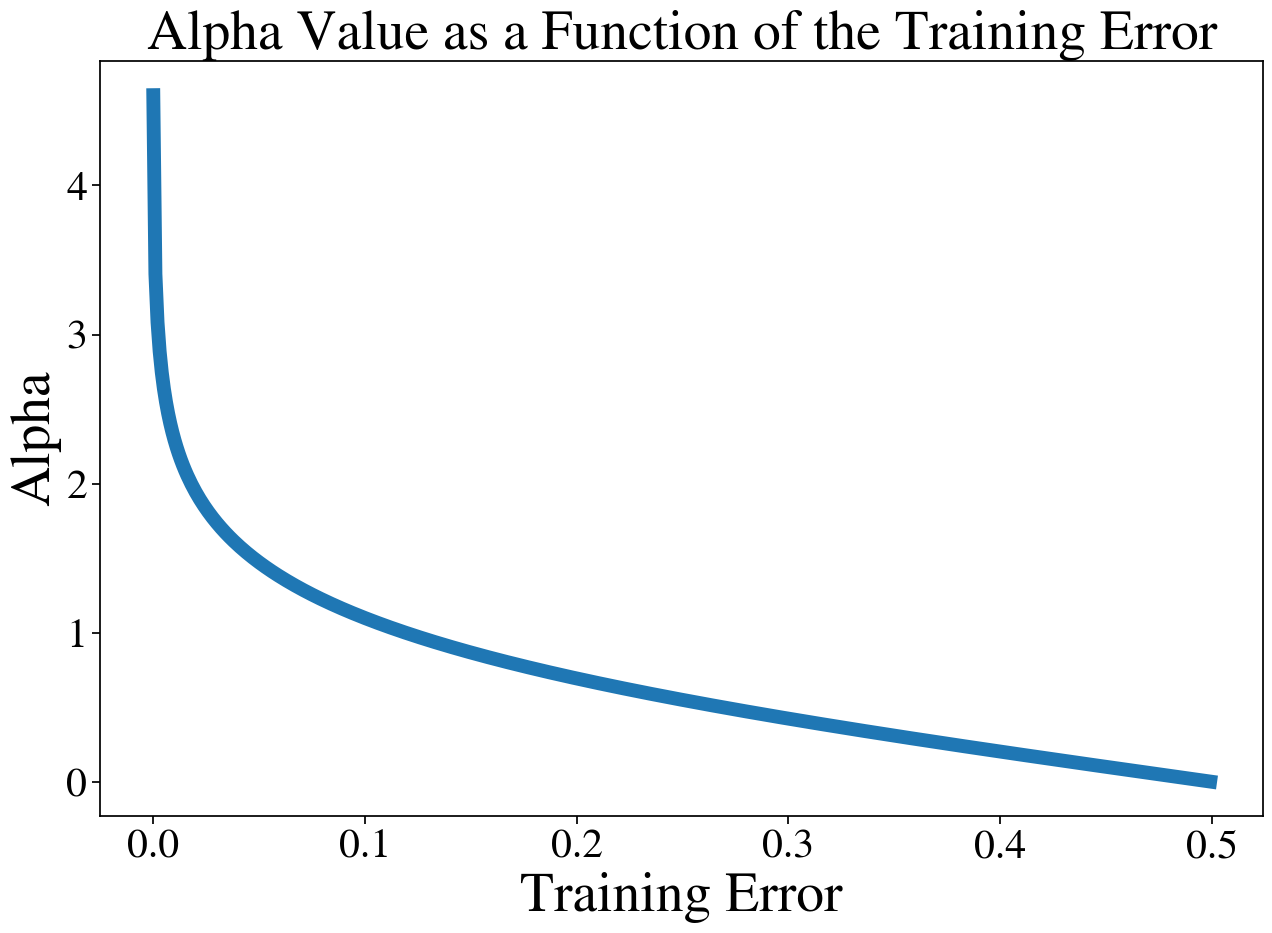

In [76]:
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 100
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

errors = np.arange(0.0001, 0.5, 0.001)
alpha_function = lambda x : 0.5 * np.log( (1.0-x) / x)
alpha_function_vec = np.vectorize(alpha_function)
alpha_values = alpha_function_vec(errors)
plt.plot(errors, alpha_values, linewidth=10)
plt.title('Alpha Value as a Function of the Training Error', size =40)
plt.xlabel('Training Error', size=40)
plt.ylabel('Alpha', size=40)
plt.xticks(size=30)
_ = plt.yticks(size=30)

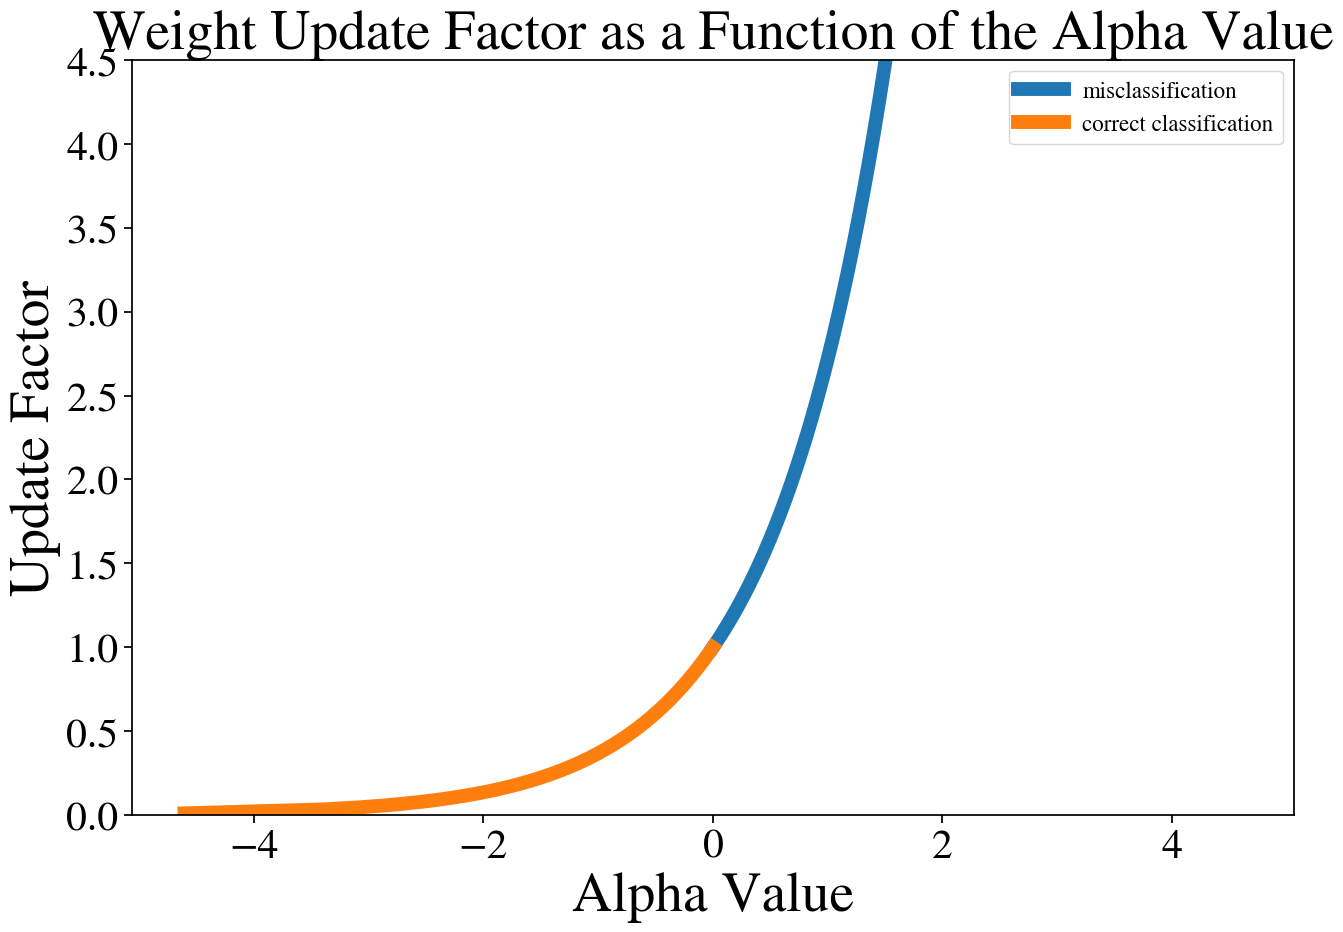

In [77]:
#sns.set(style="whitegrid")
plt.rc('grid', linestyle="-", color='black')
plt.plot(alpha_values, np.exp(alpha_values), linewidth=10, label='misclassification')
plt.plot(-1.0*alpha_values, np.exp(-1.0*alpha_values), linewidth=10, label='correct classification')
plt.ylim([0,4.5])
plt.title('Weight Update Factor as a Function of the Alpha Value', size =40)
plt.xlabel('Alpha Value', size=40)
plt.ylabel('Update Factor', size=40)
plt.xticks(size=30)
plt.legend(['misclassification', 'correct classification'])
plt.yticks(size=30)
plt.show()

AdaBoost constructs an ensemble initially with a uniform distribution of weights over all instances. On each distribution $D_t$, a weak classifier $h_t$ is induced and added to the ensemble. A weighted error $\varepsilon_t$ over $D_t$ is then calculated and verified that it is $\varepsilon_t < \frac{1}{2}$. The voting weight of $h_t$ is calculated as being inversely proportional to $\varepsilon_t$ and is assigned to $h_t$ as its estimated predictive competence. Subsequently, the distribution $D_{t+1}$ is updated whereby the weight of each misclassified sample is increased in proportion with the accuracy of $h_t$. The weights are normalized with the effect that the weight of the correctly classified samples is decreased. With this mechanism, the learning for each distribution $t + 1$, greater learning emphasis is placed on more difficult samples by compensating for previous mistakes. 

At classification time, an instance $x_i$ is evaluated by every weak classifier $h_t$. Each evaluation $h_t(x_i)$ returns a value for one of the class labels $\{-1, 1\}$, that is multiplied by the confidence coefficient $\alpha_t$. The sum of all terms results in either a positive or a negative value. The \textit{sign} of this sum signifies the class label that the ensemble has voted on. 

The repeated distribution updates result in the weak classifiers sequentially minimizing the exponential bound on the error rate. Provided that $\varepsilon_t < \frac{1}{2}$ for each $h_t$, the upper bound on the weighted training error is guaranteed to decrease monotonically with each additional $h_{t+1}$.

Subsequent research in the last decade has witnessed a plethora of AdaBoost variants: RealBoost extends the classification outputs into confidence-rated predictions; Gentle AdaBoost enables more resilience to outliers; Asymmetric AdaBoost modifies the re-weighting scheme to favour positive samples; Float Boost aims to reduce ensemble redundancy through pruning; Local boosting  reports higher accuracy and robustness to noise through boosting-by-resampling; instance-based on-line boosting ; Buehlmann 2010 propose Twin Boost which reportedly has an improved feature selection mechanism that yields both simpler and more accurate ensembles. 

## Decision Stump

A decision stump is a machine learning classifier consisting of a single-level decision tree. It is a decision tree with one root node which is immediately connected to the terminal nodes (its leaves). A decision stump makes a prediction based on the value of just a single input feature. 

When working with continuous features, usually a single threshold feature value is selected thus resulting in two leaves. Each leaf representing values below and above the threshold. It is also possible to have multiple thresholds and the resulting stump then contains three or more leaves.

Decision stumps are most often used as "weak learners" in ensemble-based machine learning algorithms like bagging and boosting. 

## AdaBoost Implementation with an Artificial Dataset Example

In [78]:
rcParams['figure.figsize'] = 12, 12
rcParams['font.size'] = 15

rcParams['figure.dpi'] = 100
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'


## Step 1 - create a dataset 

Let's first generate some random data points.

In [79]:
dim = 2 # specify thhe number of features
N = 200 # specify the number of data points
x = np.random.randn(N, dim)  # generate a multidimensional array with N samples and dim features

In [80]:
x[:10]

array([[ 0.13009261,  0.3637515 ],
       [-1.79585005,  1.13755335],
       [ 0.30763223, -1.2364343 ],
       [ 0.33807824, -0.11569516],
       [ 0.22850567,  0.47677051],
       [-0.34923296,  1.67273076],
       [ 0.83305701, -0.5663441 ],
       [-0.5814934 ,  0.70234058],
       [ 0.83365218, -0.55558638],
       [-0.17177044, -1.82242909]])

Text(0.5, 1.0, 'Demo Data')

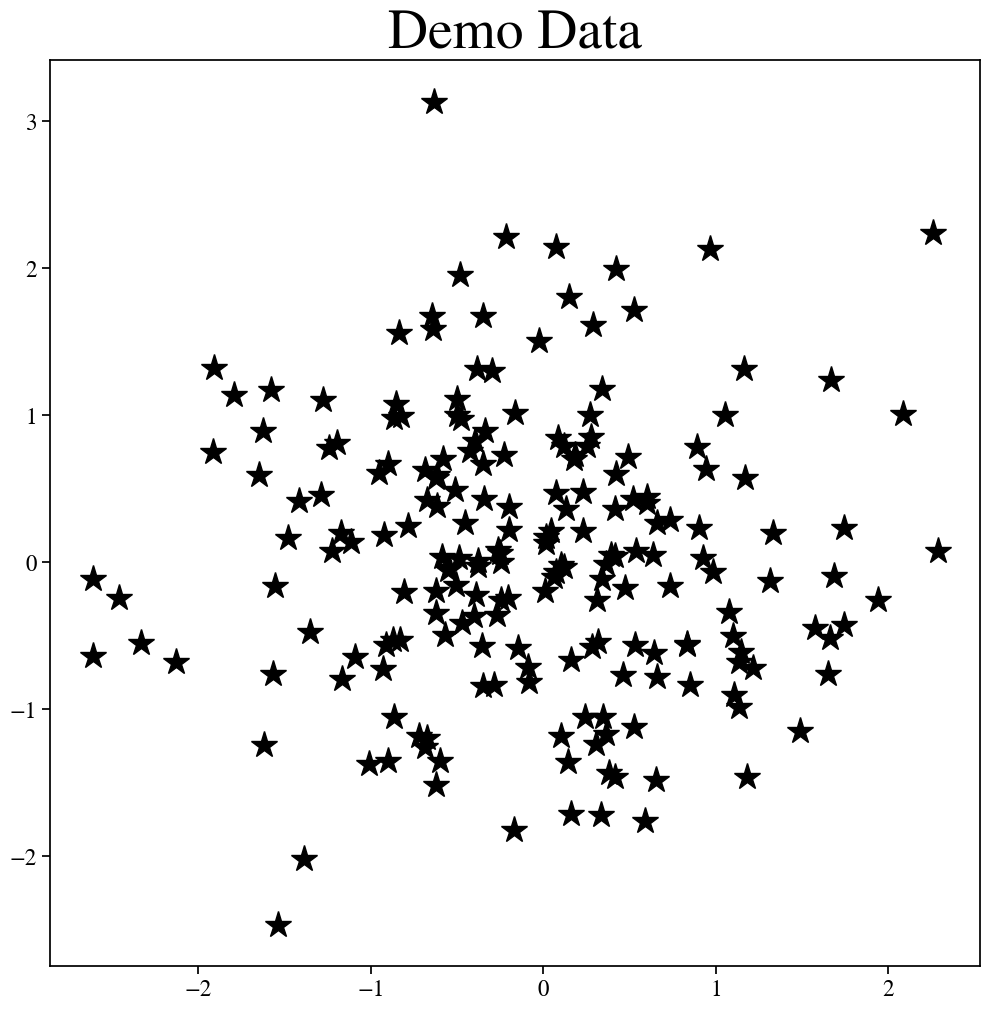

In [81]:
plt.plot(x[:,0], x[:,1], 'k*', markersize=20)
#plt.axis([-4.1, 4.1, -4.1, 4.1])
plt.title("Demo Data", size=40)

Let's assign random class labels to these data points, -1 for negative class and 1 for positive class

In [82]:
label = np.zeros(N, dtype=np.int64)

#label = x[:,0] < x[:,1]               #linear separation example
label = (x[:, 0]**2 + x[:, 1]**2) < 1  # nonlinear separation example
label = label * 1.0
label[:10]

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0.])

In [83]:
pos1 = np.nonzero(label == 1)
pos2 = np.where(label == 0)
label[pos2] = -1
label[:10]

array([ 1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.])

In [84]:
# spamDF = pd.read_csv("spambase.data", header = None,index_col=False)
# x = spamDF[list(range(len(spamDF.columns)-1))].values
# label = spamDF[len(spamDF.columns)-1].apply(lambda a: 1 if a==1 else -1).values

# dim = x.shape[1]
# T = 30
# N =  x.shape[0]



Text(0.5, 1.0, 'Demo Data')

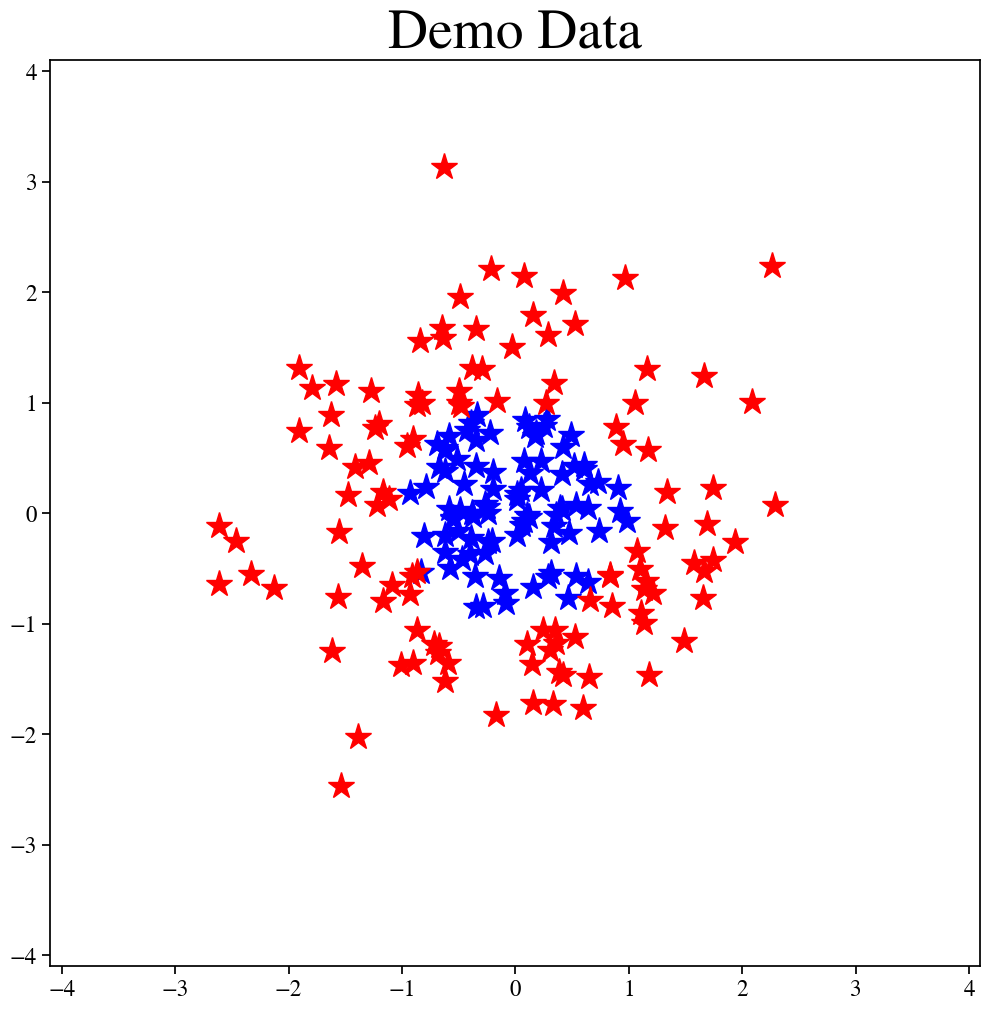

In [85]:
# Plot the data
plt.figure()
plt.plot(x[pos1, 0], x[pos1, 1], 'b*', markersize=20)
plt.plot(x[pos2, 0], x[pos2, 1], 'r*', markersize=20)
plt.axis([-4.1, 4.1, -4.1, 4.1])
plt.title("Demo Data", size=40)

## Step 4 - specify boosting rounds, define weak classifier structure and alpha  



In [86]:
T = 30    #number of boosting iterations

In [87]:
# h is our weak classifier
# it consists of three dimesions and there will be T number of these:
#                # threshold i
#                # dimension j
#                # sign/direction of where the positive samples are in respect to the threshold
h = np.zeros([T, 3], dtype=np.float64)
  

There are two kinds of weights in the AdaBoost algorithm. One type of weight (alpha) is assigned to each weak classifier of a given boosting round t. This weight is proportional to the strength (accuracy) of the weak classifier. Larger alpha values are associated with more accurate weak classifiers that have the lower weighted error.

The second type of weight is associated with the data points and will be discussed below.

In [88]:
#lastly, we will need the alpha, which together with h fully specifies the final strong classifier
alpha = np.zeros(T, dtype=np.float64)

In [89]:
h[:10]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [90]:
alpha[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

The final classifier will be the weighted sum  of the weak classifiers h using alpha.

## Step 2 - initialise uniform weights to each data point 

Without any additional mechanisms, the algorithm would generate the same weak classifier for each boosting iteration t. This would yield a useless classifier.

In order to force the algorithm to select a different weak classifier, we force it to calculate the error of each weak classifier based on the weight of each data point. This weight, will change (be updated depending on the alpha value and the classification of each data point) for every sample from one boosting iteration to the next, thereby creating a 'different' dataset for the algorithm.

We therefore need to have an array of weights to represent each data point.


**Exercise:** Generate an array of size N, where each value represents the initial weight for every data point. Make the initial weights uniform and that they all sum to 1. You can use np.ones to help create this array. Call the variable 'weight'


In [91]:
weight = np.ones(N, dtype=np.float64) / N
weight[:10]

array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005])

We will also keep track of the weighted error of each weak classifier for every boosting iteration t.

In [92]:
err = np.ones(T, dtype=np.float64) * np.inf

In [93]:
err[:10]

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

## Step 3 - define a decision stump classifier

A weak classifier is just a threshold and a sign/direction to specify if the positive samples are above or below the given threshold. The threshold is generated based on the **weighted error** of the data points.

**Exercise:** Define a function as below, that takes in a numpy array, the feature index, an array of weights corresponding to each data point as well as label that corresponds to each data point. The function should return the best threshold, the direction of the threshold for classifying the positives and the error of the threshold. 

In [94]:
# Returns best threshold, sign/direction, weighted_error for a given feature
def calculate_decision_stump(x, w, l):
                        # data x
                        # weights w
                        # labels l
    
    min_error = np.float64(np.inf)
    best_thresh = 0
    best_dir = 0
    interval = np.abs(x.max() - x.min()) / 100.0
    threshold = np.arange(x.min()-interval*2.0, x.max()+interval*2.0, interval)
    temp_err = np.float64(0)
    
    for d in [1, -1]:
        for thresh in threshold:
            
            temp = np.zeros(len(x), dtype=np.int64)
            if(d == 1):
                temp = (x >= thresh)
            else:
                temp = (x < thresh)

            temp = np.int64(temp)
            temp[np.where(temp == 0)] = -1
            
            # Initialise actual and expected labels to a perfect match( 0 = match , 1 = not a match)
            y = np.zeros(len(x), dtype=np.int64)            
            # y will be an array where 0 indictes that the sample has been correctly classified, otherwise 1
            y = np.int64(temp != l)
            
            # Calculate error of this weak classifier on the weighted dataset
            #========================
            #YOUR CODE HERE
            #========================
            temp_err = np.sum(y * w)
            
            if temp_err < min_error:
                #========================
                #YOUR CODE HERE
                #========================
                min_error = temp_err
                best_thresh = thresh
                best_dir = d                

    return  best_thresh, best_dir, min_error

In [95]:
x2 = np.array([-0.5, 1.5, 1.0, 2.0])
weight2 = np.array([0.1, 0.1, 0.1, 0.1])
label2 = [1, 1, -1, -1]
calculate_decision_stump(x2, weight2, label2)
# should return (-0.47499999999999998, -1, 0.10000000000000001)

(-0.475, -1, 0.1)

In [96]:
x2 = np.array([-1.1, -0.8, -0.7, 0.8,  0.9, -1.3, -1.3,  1.2,  -1.5, 0.6])
weight2 = np.array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  10.1])
label2 =       [-1., -1.,  -1., -1., -1., -1., -1., -1., -1.,  1.]
calculate_decision_stump(x2, weight2, label2)
# should return (-0.69000000000000283, 1, 0.30000000000000004)

(-0.6900000000000028, 1, 0.30000000000000004)

There are different ways to implement the decision stump, here is another version that is perhaps more efficient:

In [97]:
def calculate_decision_stump_efficient(data, feature, weight, label):

    Tp=np.float64(0); #T+ total sum of positive examples weights
    Tn=np.float64(0) #T- total sum of negative examples weights
    Sp=np.float64(0) #S+ sum of positive weights below the cuurent threshold
    Sn=np.float64(0) #S- sum of negative weights below the current threshold
    error1=np.float64(0)
    error2=np.float64(0)
    min_error=np.float64(2.0) 
    min_thresh=np.float64(0) 
    direction=1
    
    y = np.zeros(N, dtype=np.int64)
    
    #get all positive weights    
    temp  = (label == 1)
    temp = np.int64(temp)
    Tp = np.sum(temp * weight)
    
    #get all negative weights  
    temp  = (label == -1)
    temp = np.int64(temp)
    Tn = np.sum(temp * weight)
    
    #sort feature values
    sorted_labels = data[:, feature].argsort()
    sorted_vector =  data[sorted_labels]

    length = len(sorted_vector)
    for i in range(length):

        #RIGHT DIRECTION THRESHOLD
        #error1 is the sum of positives up to that point + total negatives minus the sum of negatives so far
        error1 = Sp + (Tn - Sn) 
        if label[sorted_labels[i]] == -1 : 
            Sn = Sn +  weight[sorted_labels[i]]
        else :
            Sp = Sp + weight[sorted_labels[i]]
            
        #LEFT DIRECTION THRESHOLD
        error2 = Sn + (Tp - Sp) 
        
        if(min_error > error1) :
            min_error = error1
            min_thresh = sorted_vector[i, feature]
            direction = 1
        if(min_error > error2) :
            min_error = error2
            min_thresh = sorted_vector[i, feature]
            direction = -1           
    
    return min_thresh, direction, min_error
       

## Step 4 -  calculate the alpha value for a boosting round



The alpha value indicates how much confidence (weight) should be given to a particular weak classifier. ie. how reliable is it? This is determined by its weighted error. The lower the weighted error, the higher the alpha value will be and the bigger influence on the final classification the particular weak classifier will have.

**Exercise:** Define a function that takes the weighted error of a weak classifier and returns the alpha value. 

In [98]:
def calculate_alpha(weighted_error):    
        #========================
        #YOUR CODE HERE
        #========================
        
        return 0.5 * np.log( (1.0 - weighted_error) / weighted_error )

In [99]:
calculate_alpha(0.3)
# should return 0.42364893019360184

0.42364893019360184

## Step 5 - classify dataset based on the latest weak classifier

If sign/direction is +1, then the data point should be classified as +1 if it is *greater or equals to* the threshold. 

If sign/direction is -1, it will classify data as +1 if it is *smaller* than threshold.

**Exercise:** Define a function that returns an array representing the classification of each sample given the threshold and direction of a weak classifier. The array will return -1 for a sample classified as a negative, otherwise 1.

In [100]:
def classify_dataset_against_weak_classifier(x, thresh, direction):
    
    classification = np.zeros(len(x))
    
    #classifiy all samples based on the last feature
    #get actual classification
    for i in range(len(x)):
        #========================
        #YOUR CODE HERE
        #========================
        if direction == -1:
            if x[i] < thresh: classification[i] = 1
            else : classification[i] = -1
        else:
            if x[i] < thresh: classification[i] = -1
            else : classification[i] = 1            
                
    return classification 


In [101]:
x2 = np.array([-0.5, 1.5, 1.0])
thresh2 = 1.0
direction2 = -1
classify_dataset_against_weak_classifier(x2, thresh2, direction2)
# give the above, the function should return: array([ 1., -1., -1.])

array([ 1., -1., -1.])

## Step 6 - update weights for each data point

This is the heart of the algorithm and has the effect of generating a *different* dataset for each boosting round *t*.

**Exercise:** Define a function that accepts the weight array, the alpha value for a given boosting round, the classification array and the true label array, and updates the weight array for each sample accordingly.

In [102]:
def update_weights(weight, alpha, classification, label):

    for i in range(len(weight)):
        #========================
        #YOUR CODE HERE
        #========================
        weight[i] = weight[i] * np.exp( -1.0 * alpha * classification[i] * label[i] ) 

    return weight

In [103]:
weight2 = np.array([0.5, 0.5])
alpha2 = np.array([0.25])
label2 = np.array([1, -1])
classification2 = np.array([-1, -1])
update_weights(weight2, alpha2, classification2, label2)
#given the above, the function should return: array([ 0.64201271,  0.38940039])

array([0.64201271, 0.38940039])

## Step 7 - normalise weights for each data point

**Exercise:** Define a function as below, that takes an array of weights and normalises them.

In [104]:
def normalise_weights(weight):

    #========================
    #YOUR CODE HERE
    #========================
    weight = weight / np.sum(weight)
    
    return weight 

In [105]:
weight2 = np.array([0.006, 0.004])
normalise_weights(weight2)
#given the above, the function should return: array([ 0.6,  0.4])

array([0.6, 0.4])

## Step 8 - put it all together

In [106]:
def visualise(x, h, t, label, weight):
    global temp_sum
    global final_label
    global weight_prev
    
    #Visualisation
    f, axarr = plt.subplots(1, 5)
    #====================================================================
    # 1 Dataset Weighting Update and Decision Boundary
    #print h[t]
    temp = h[t][2] * np.sign(x[:, int(h[t][1]) ] - h[t][0])
    temp_sum = np.float64(temp_sum + alpha[t] * temp)
    #temp_sum = temp_sum - np.float64(0.000000000001)
    final_label = np.sign(temp_sum)
    misshits[t+1] = np.sum(np.float64(final_label != label)) / N
    time.sleep(0)
    
    
    scale_markers = [w / (np.max(weight_prev) - np.min(weight_prev)) for w in weight_prev] 
    #plot weighted samples
    for l in range(len(x)):
        #print l
        #print x[l,0],x[l,1]
        if label[l] == 1:
            axarr[0].plot([x[l,0]],[x[l,1]], 'bo', markersize=scale_markers[l] * 10.0)

        else:
            axarr[0].plot(x[l,0],x[l,1], 'ro', markersize=scale_markers[l]* 10.0)


    if h[t][1]  == 0 :
        axarr[0].plot((h[t][0], h[t][0]), (3, -3), 'k-')
        classification_boundaries.append( ((h[t][0], h[t][0]), (3, -3)) )
    else: 
        axarr[0].plot((3, -3), (h[t][0], h[t][0]), 'k-')
        classification_boundaries.append( ((3, -3), (h[t][0], h[t][0])))
        
    axarr[0].set_title("Dataset Weighting Update and Decision Boundary \n", fontsize=15, alpha=0.75)

    #====================================================================
    # 2 Dataset Classification for Weak Classifier t
    temp = h[t][2] * np.sign(x[:, int(h[t][1]) ] - h[t][0])
    temp_sum2 = np.float64(alpha[t] * temp)
    classification = np.sign(temp_sum2)
    
    for l in range(len(x)):
        if classification[l] == 1:
            axarr[1].plot([x[l,0]],[x[l,1]], 'bo')

        else:
            axarr[1].plot(x[l,0],x[l,1], 'ro')


    if h[t][1]  == 0 :
        axarr[1].plot((h[t][0], h[t][0]), (3, -3), 'k-')
    else: 
        axarr[1].plot((3, -3), (h[t][0], h[t][0]), 'k-')

    axarr[1].set_title("Dataset Classification for Weak Classifier t \n", fontsize=15, alpha=0.75)
    
    #====================================================================
    
    # 3 Final Classification of Samples from Current Strong Classifier H
    pos1 = np.where(final_label == 1)
    pos2 = np.where(final_label == -1)

    axarr[2].plot(x[pos1, 0], x[pos1, 1], 'bo')
    axarr[2].plot(x[pos2, 0], x[pos2, 1], 'ro')
    axarr[2].axis([-3.1, 3.1, -3.1, 3.1])
    
    #print len(classification_boundaries)
    for p1, p2 in classification_boundaries:
        #print 'decision: ' , p1, p2
        axarr[2].plot(p1, p2, 'k-')
    
    axarr[2].set_title("Final Classification of Samples from \n Current Strong Classifier H", fontsize=15, alpha=0.75)

    
    #====================================================================
    # 4 Missclassified Samples from Current Strong Classifier H
    correct = np.where(final_label == label)
    wrong = np.where(final_label != label)
    
    axarr[3].plot(x[correct, 0], x[correct, 1], 'ko')
    axarr[3].plot(x[wrong, 0], x[wrong, 1], 'rv')
    axarr[3].axis([-3.1, 3.1, -3.1, 3.1])
    axarr[3].set_title("Missclassified Samples from \nCurrent Strong Classifier H", fontsize=15, alpha=0.75)
    
    #====================================================================
    # 5 Convergence Rate of the Total Error
    axarr[4].plot(misshits)
    axarr[4].axis([ 0, T, 0, 1])
    axarr[4].set_title(" Convergence Rate of the Total Error", fontsize=15, alpha=0.75)
    axarr[4].set_ylabel("Error Rate", fontsize=15, alpha=0.75)
    
    weight_prev = weight
    print('BOOSTING ROUND: ' + str(t+1))
    print('WEIGHTED ERROR OF DECISION BOUNDARY: ' + str(err[t]), '--->> FEATURE, THRESHOLD, DIRECTION: ' + str( (int(h[t][1]), h[t][0], h[t][2]) ) )
    print('CURRENT ERROR: ' + str(misshits[t+1]) )
    #print("--- %s seconds ---" % (time.time() - start_time))
    plt.show()    

# Set/reset key parameters 

In [107]:
#rcParams['figure.figsize'] = 35, 6
#rcParams['font.size'] = 30

temp_sum = np.zeros(N, dtype=np.float64)
temp = np.zeros(N, dtype=np.float64)
final_label = np.zeros(N, dtype=np.float64)
misshits = np.array([None] * (T+1), dtype=float)
misshits[0] = 1.0
classification_boundaries = []
weight_prev = weight
weighted_error = np.float64(0)


**Exercise:** Complete the code below by inserting all the function calls into the correct positions.

Alpha:  0.30951960420311203
BOOSTING ROUND: 1
WEIGHTED ERROR OF DECISION BOUNDARY: 0.34999999999999987 --->> FEATURE, THRESHOLD, DIRECTION: (0, -0.6235154957967557, 1.0)
CURRENT ERROR: 0.355


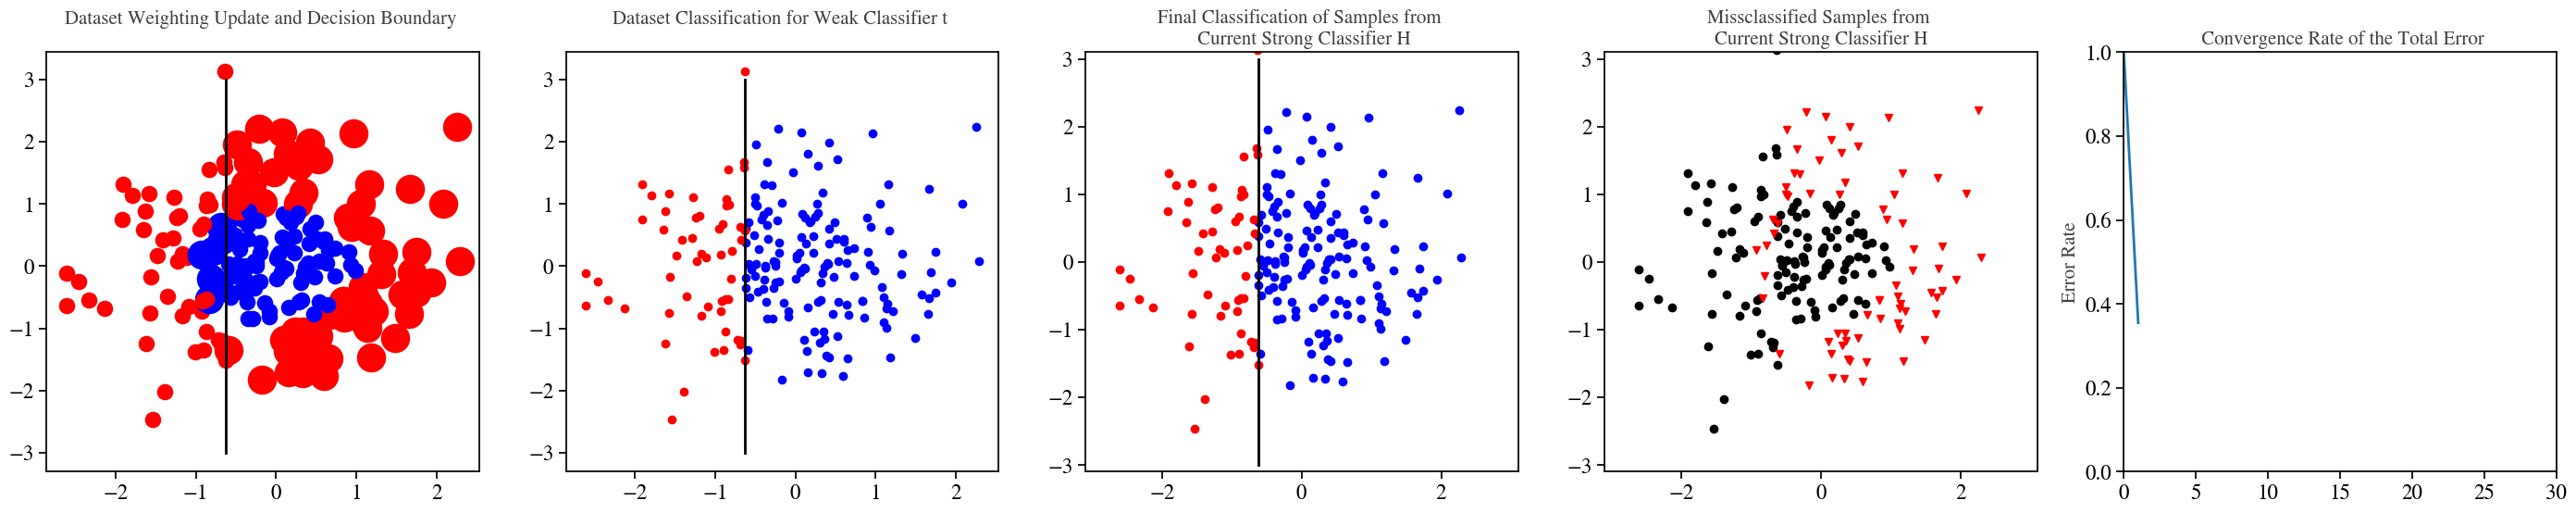

Alpha:  0.2748498882638283
BOOSTING ROUND: 2
WEIGHTED ERROR OF DECISION BOUNDARY: 0.36593406593406574 --->> FEATURE, THRESHOLD, DIRECTION: (0, -2.612484967841027, -1.0)
CURRENT ERROR: 0.355


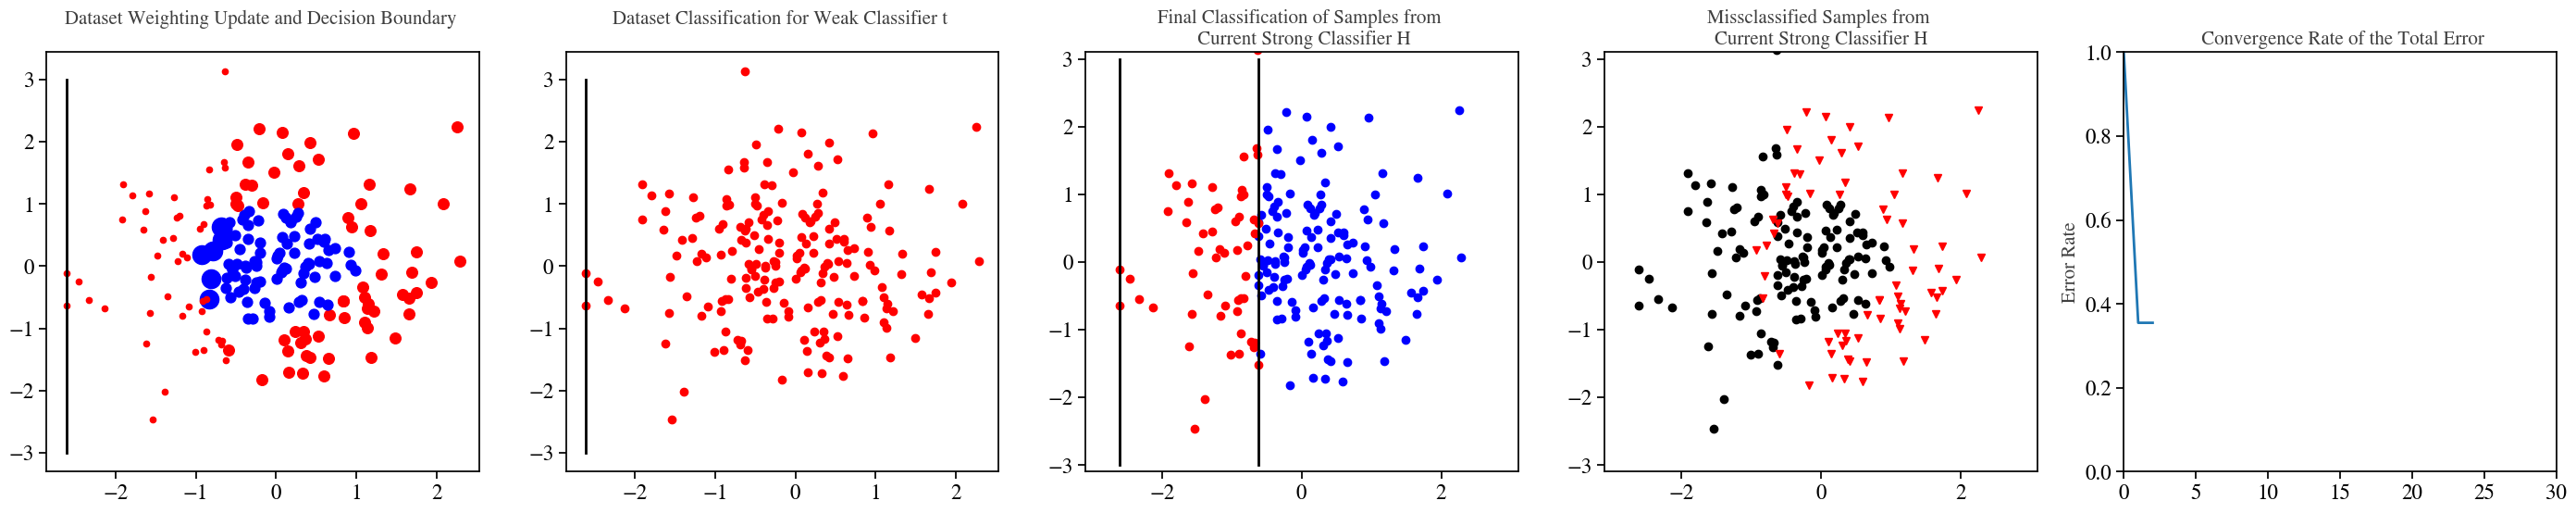

Alpha:  0.3296900856262232
BOOSTING ROUND: 3
WEIGHTED ERROR OF DECISION BOUNDARY: 0.34087886122036076 --->> FEATURE, THRESHOLD, DIRECTION: (1, 0.890642644587118, -1.0)
CURRENT ERROR: 0.24


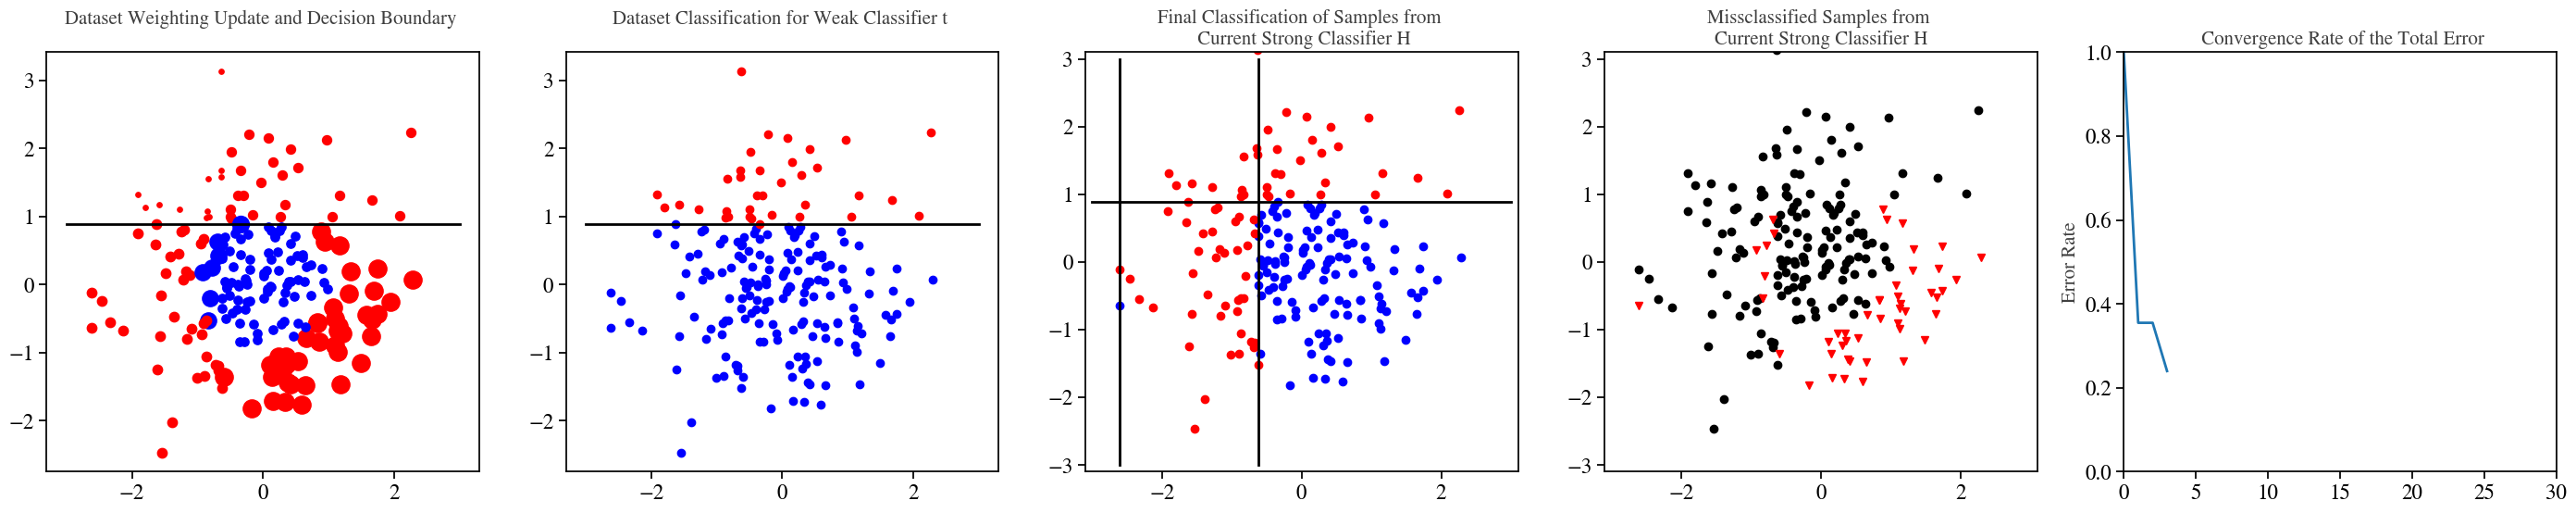

Alpha:  0.34035026955114434
BOOSTING ROUND: 4
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3361049674651925 --->> FEATURE, THRESHOLD, DIRECTION: (1, -0.41370113279342124, 1.0)
CURRENT ERROR: 0.405


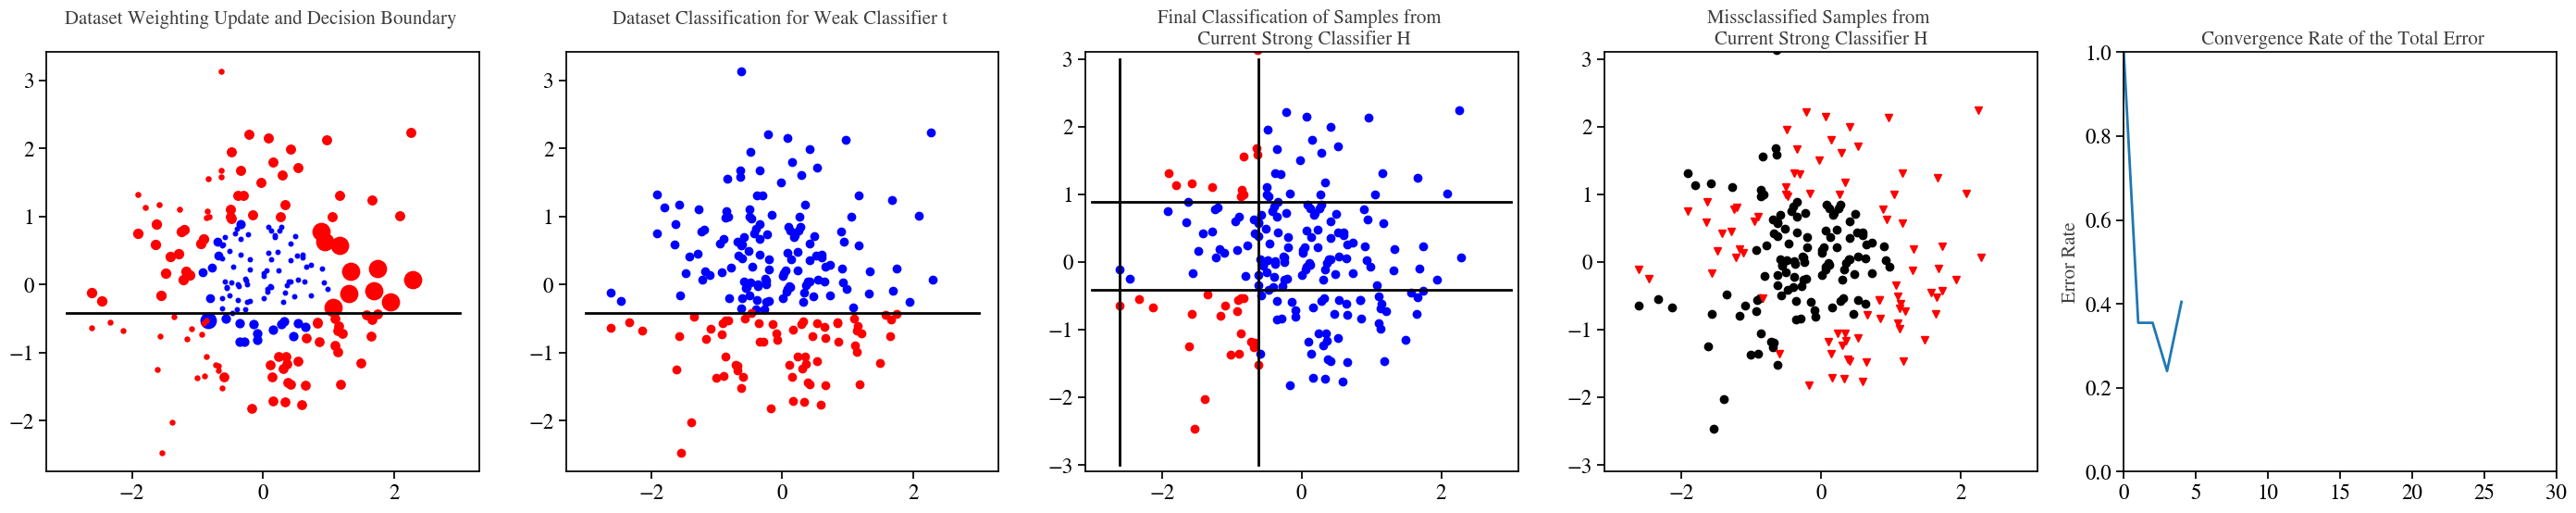

Alpha:  0.3499950089483461
BOOSTING ROUND: 5
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3318144409963554 --->> FEATURE, THRESHOLD, DIRECTION: (0, -2.612484967841027, -1.0)
CURRENT ERROR: 0.145


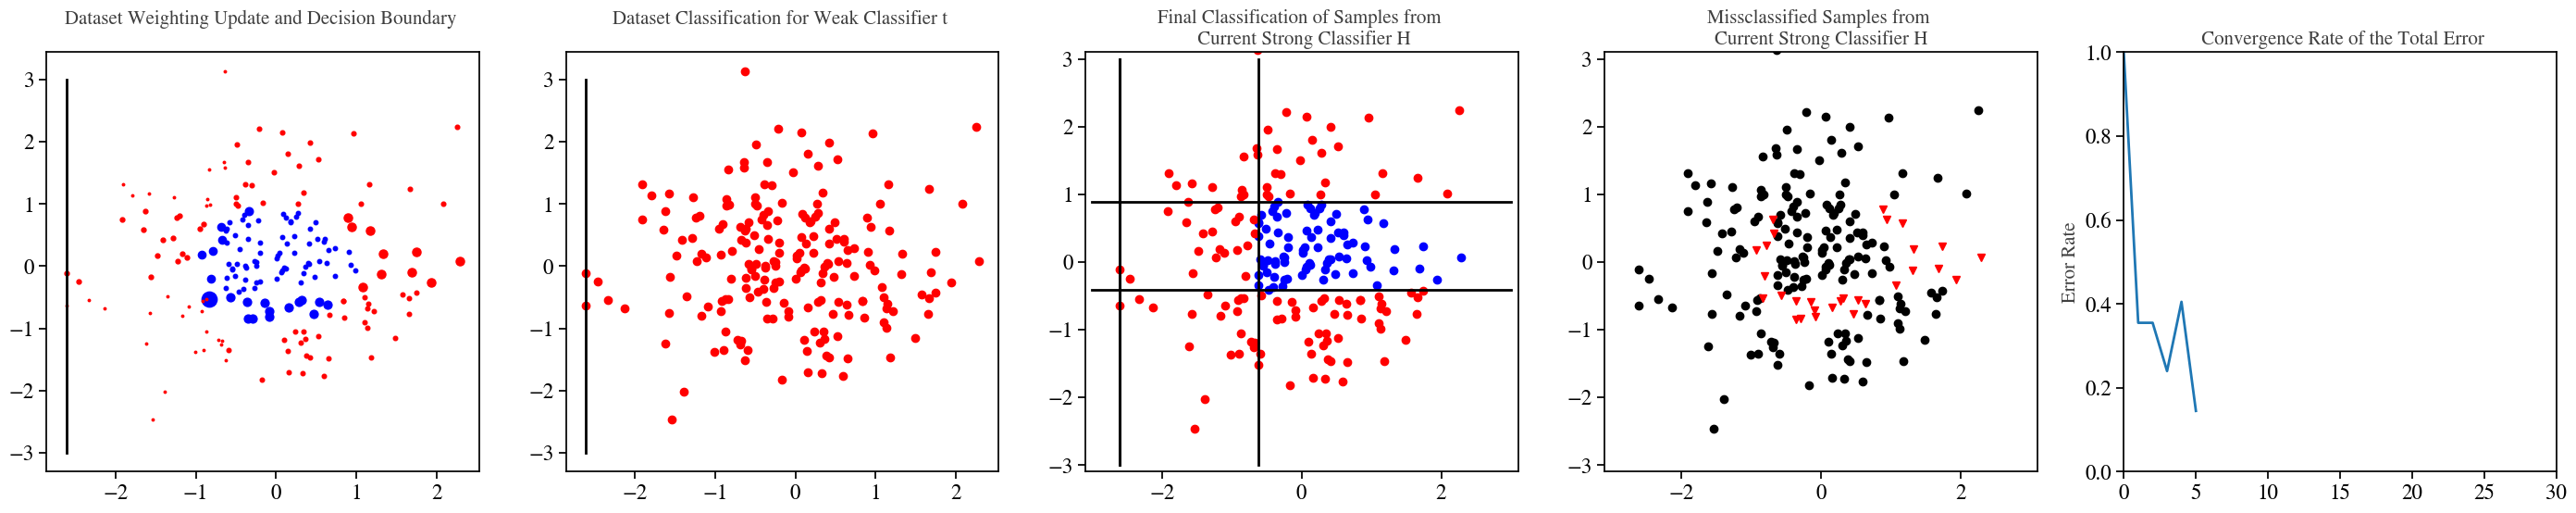

Alpha:  0.3613006008257094
BOOSTING ROUND: 6
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3268204379817944 --->> FEATURE, THRESHOLD, DIRECTION: (0, 0.7336412374640733, -1.0)
CURRENT ERROR: 0.27


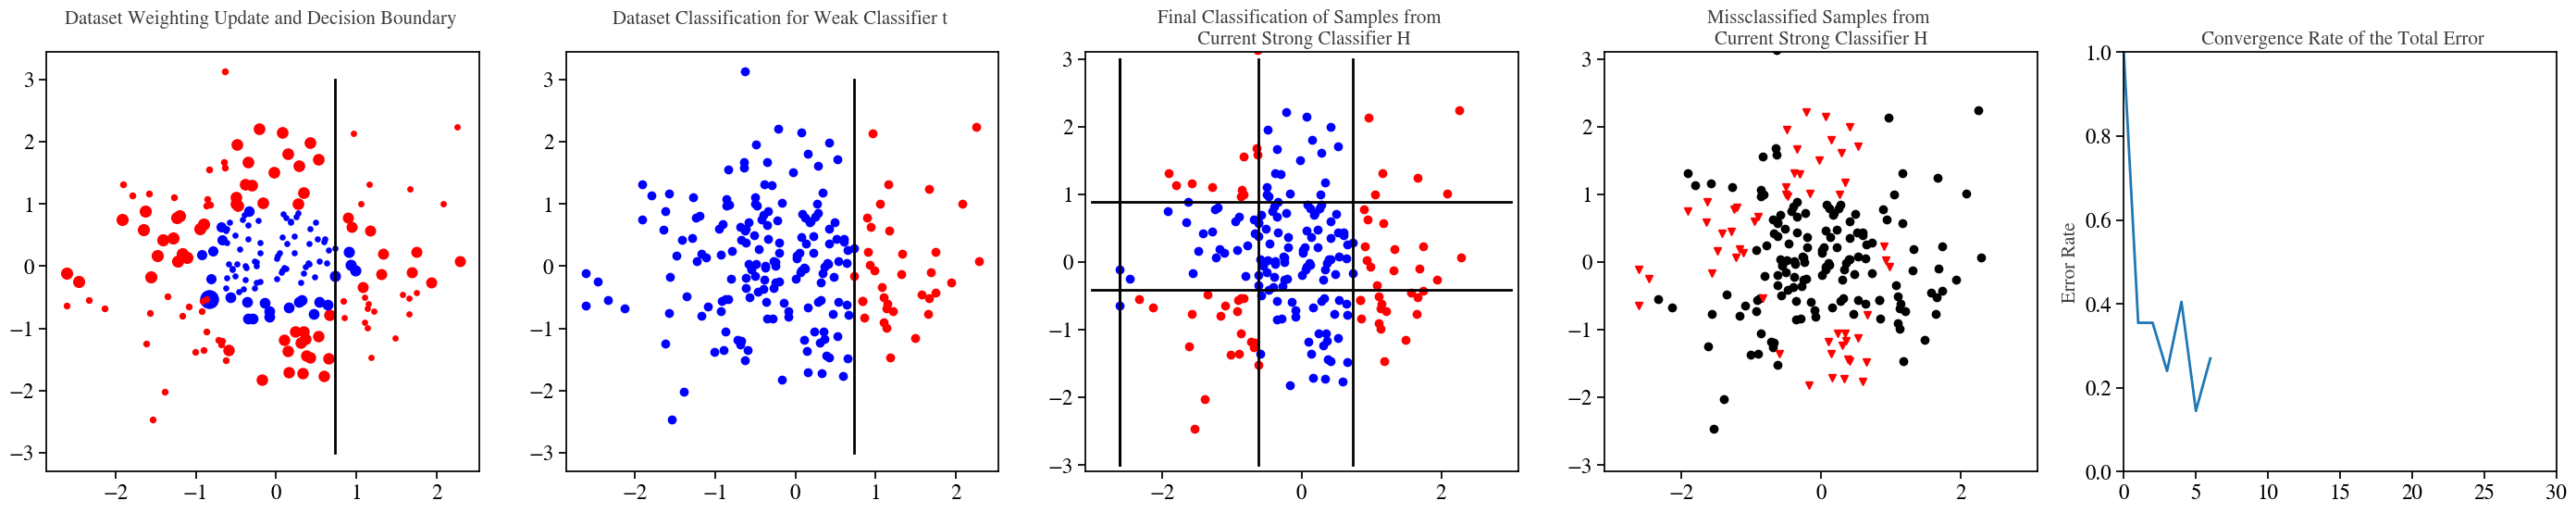

Alpha:  0.23357950663533628
BOOSTING ROUND: 7
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3852888871091196 --->> FEATURE, THRESHOLD, DIRECTION: (0, -2.612484967841027, -1.0)
CURRENT ERROR: 0.115


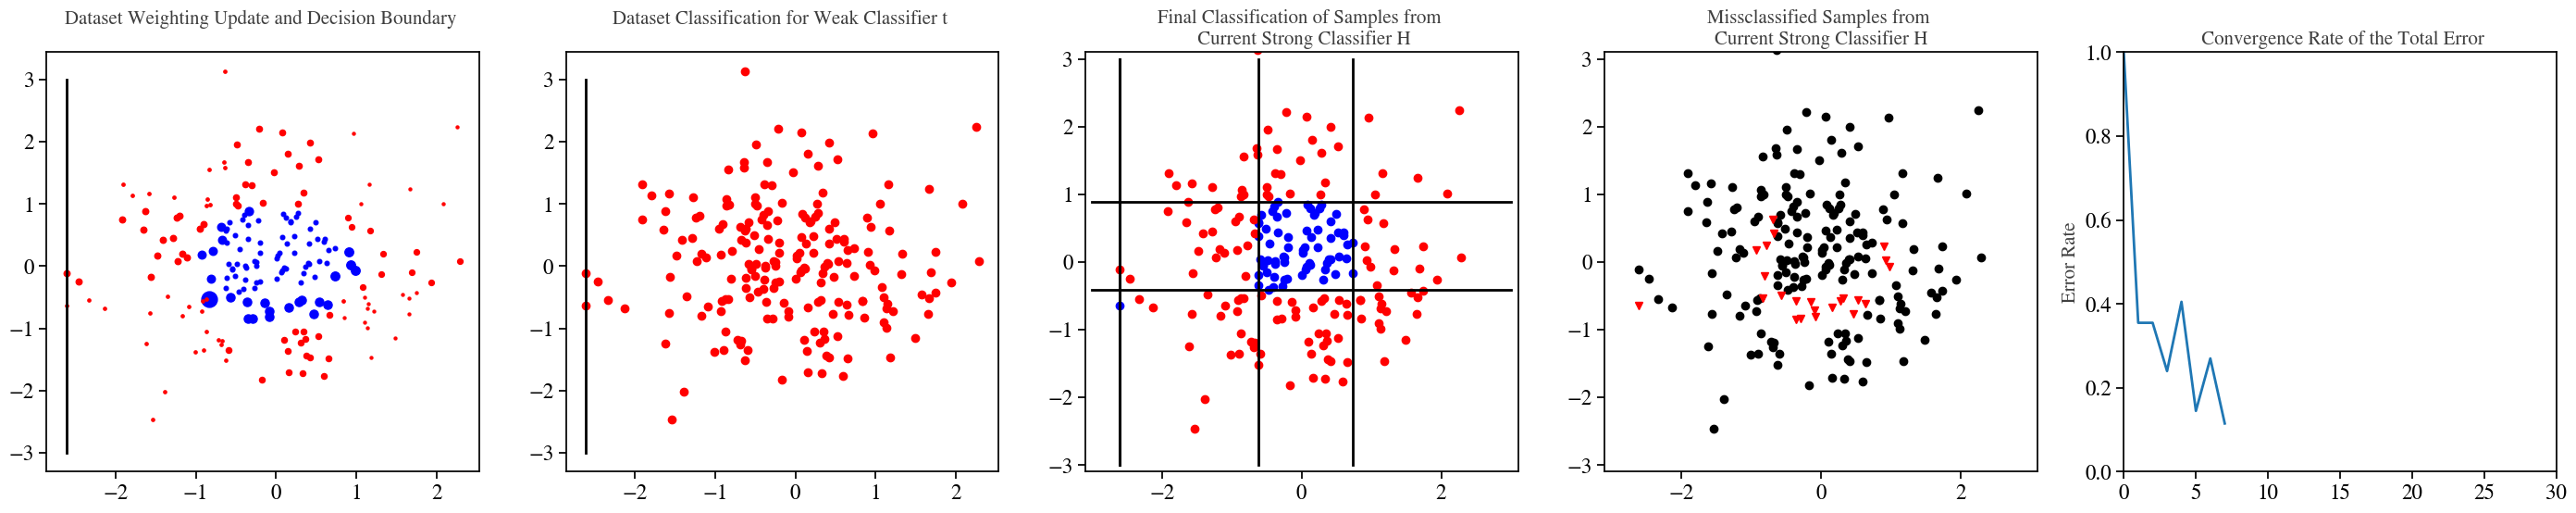

Alpha:  0.3284771085918488
BOOSTING ROUND: 8
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3414241359240442 --->> FEATURE, THRESHOLD, DIRECTION: (0, -0.8313447621732909, 1.0)
CURRENT ERROR: 0.225


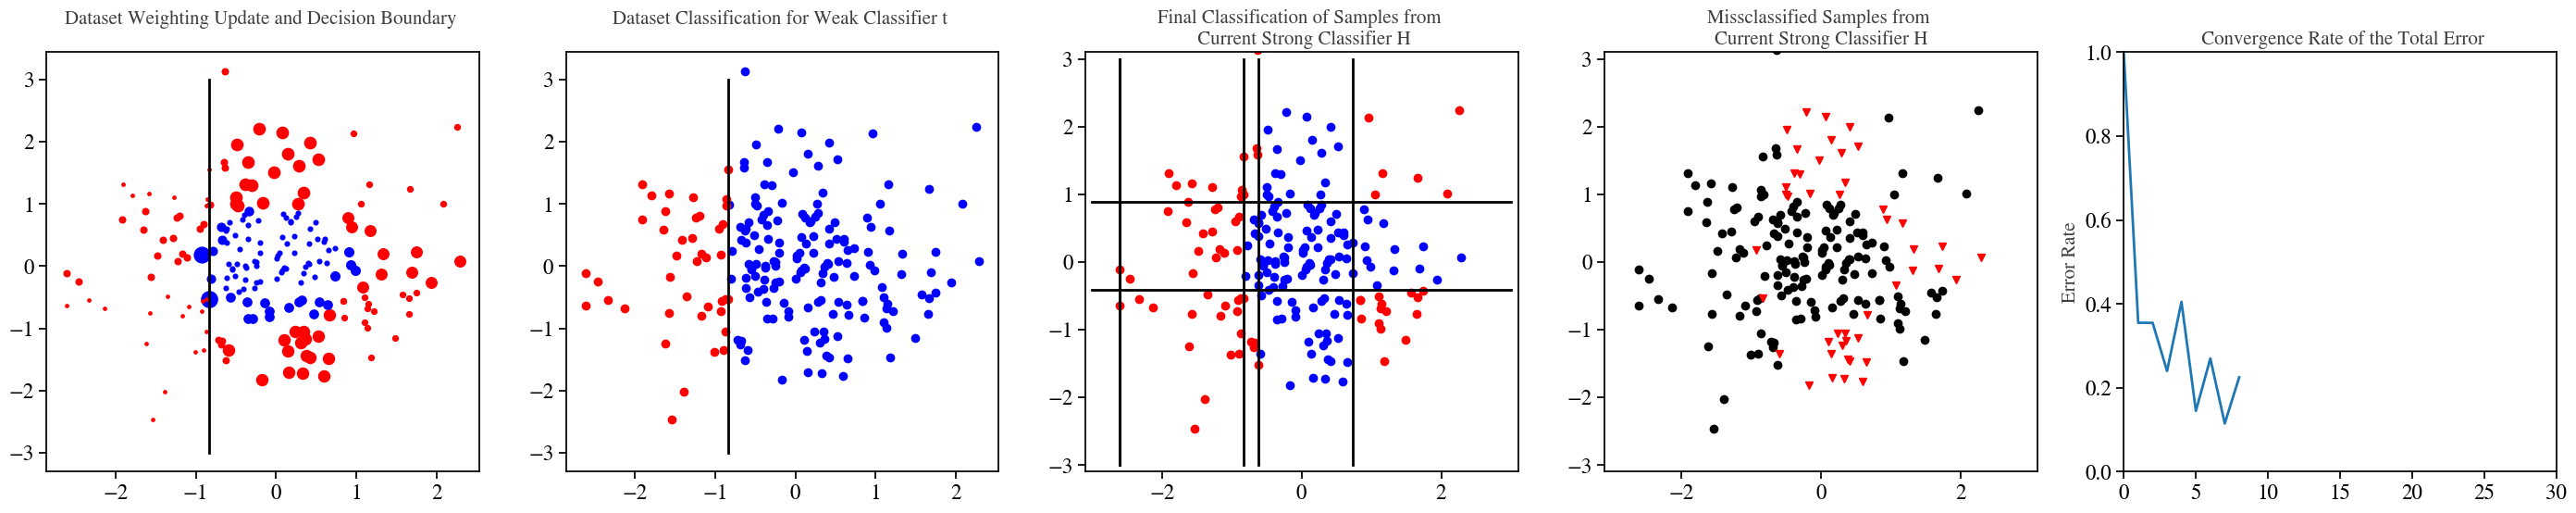

Alpha:  0.23501329321218217
BOOSTING ROUND: 9
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3846099509780316 --->> FEATURE, THRESHOLD, DIRECTION: (0, -2.612484967841027, -1.0)
CURRENT ERROR: 0.11


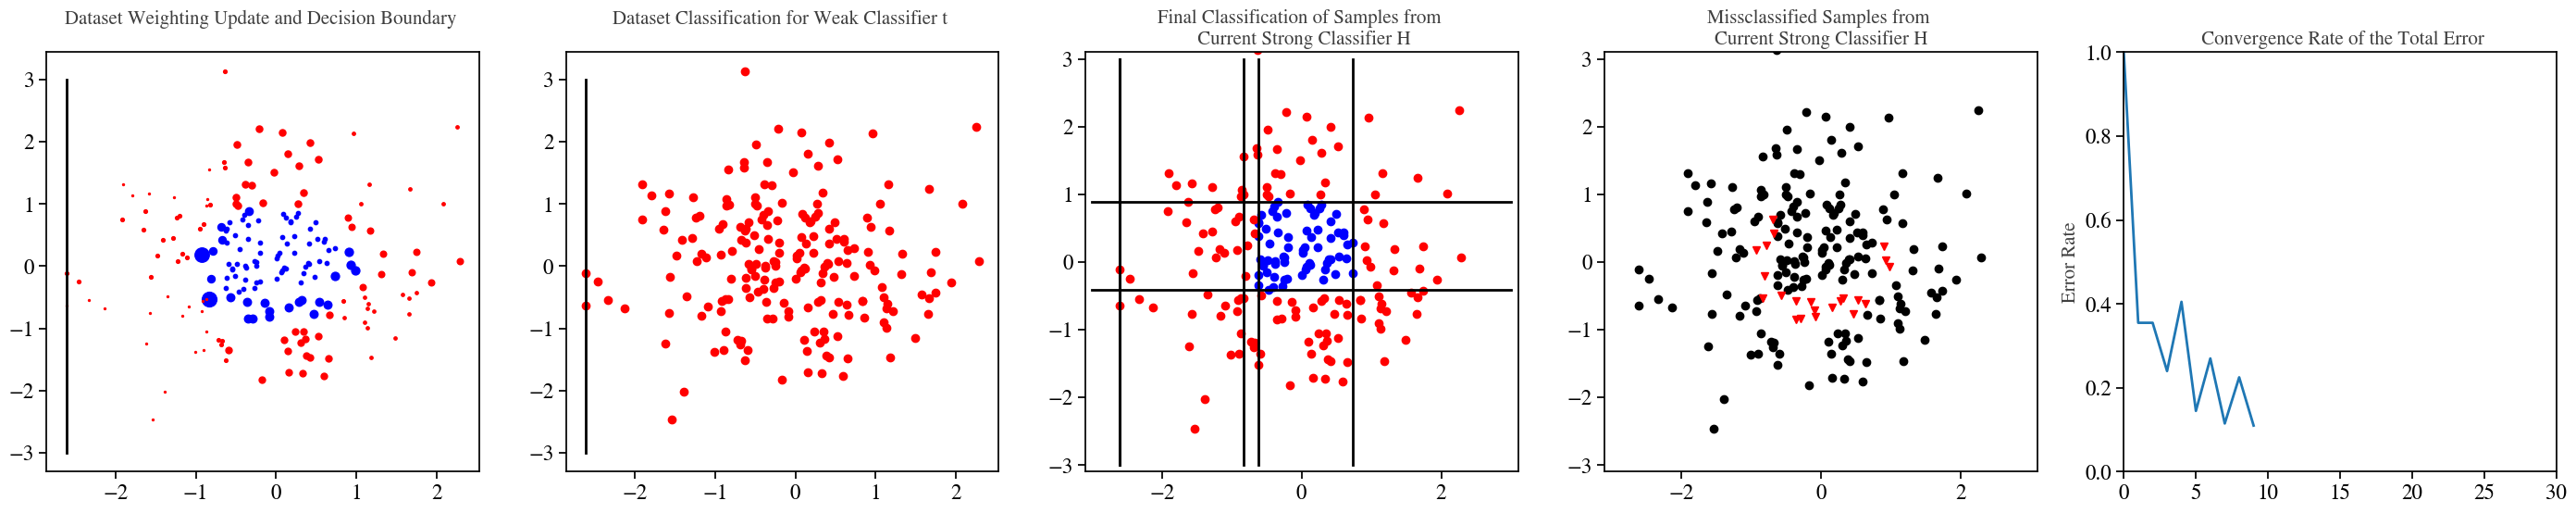

Alpha:  0.3467622285286122
BOOSTING ROUND: 10
WEIGHTED ERROR OF DECISION BOUNDARY: 0.33324949938413995 --->> FEATURE, THRESHOLD, DIRECTION: (1, 0.890642644587118, -1.0)
CURRENT ERROR: 0.145


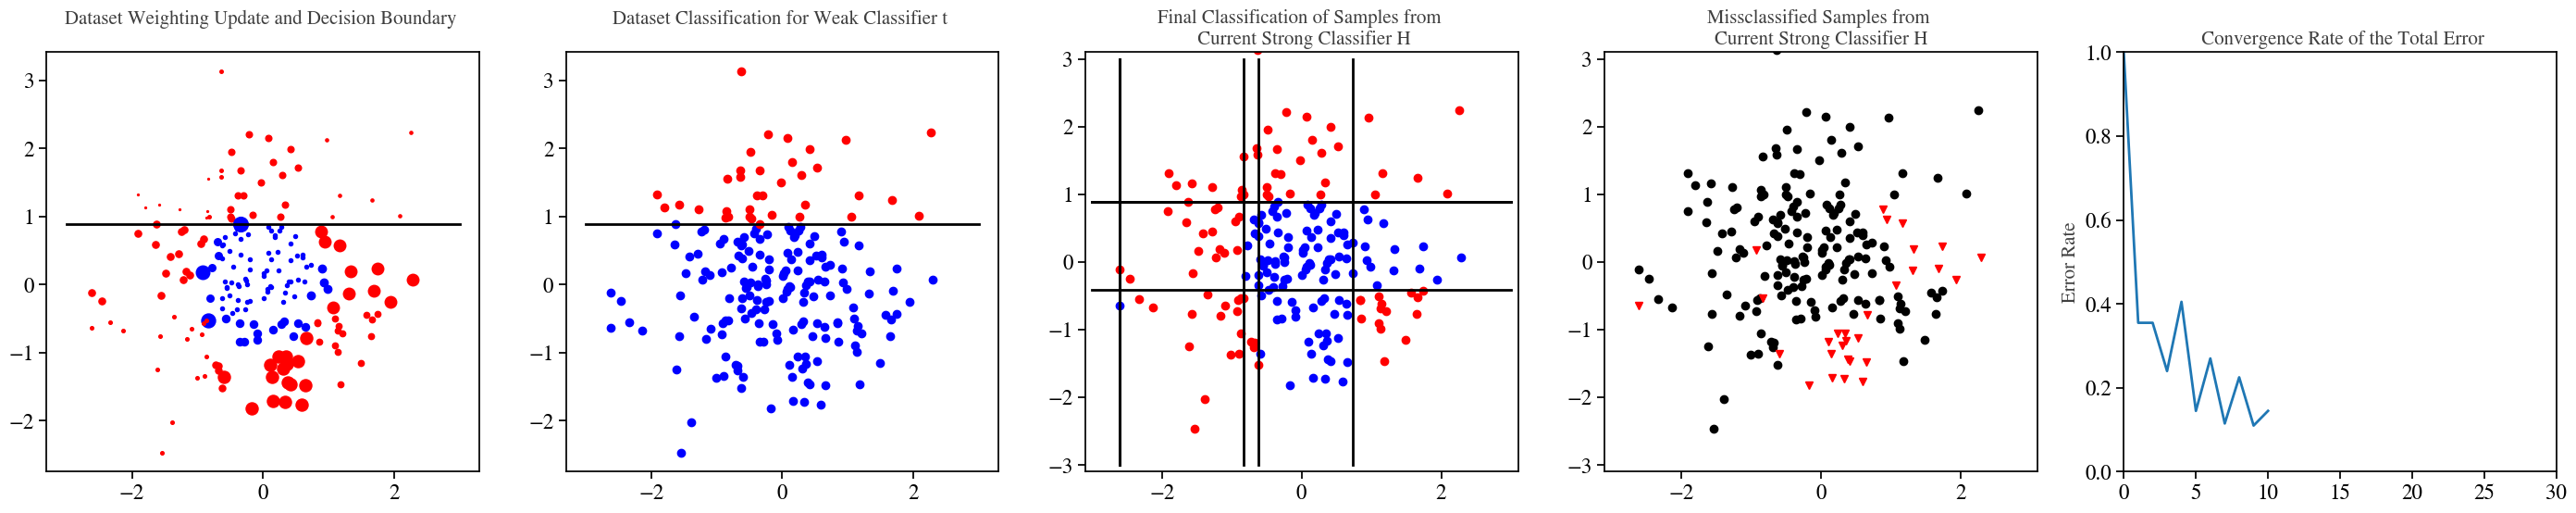

Alpha:  0.2452061773841742
BOOSTING ROUND: 11
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3797964322234008 --->> FEATURE, THRESHOLD, DIRECTION: (1, 3.132363308761428, 1.0)
CURRENT ERROR: 0.09


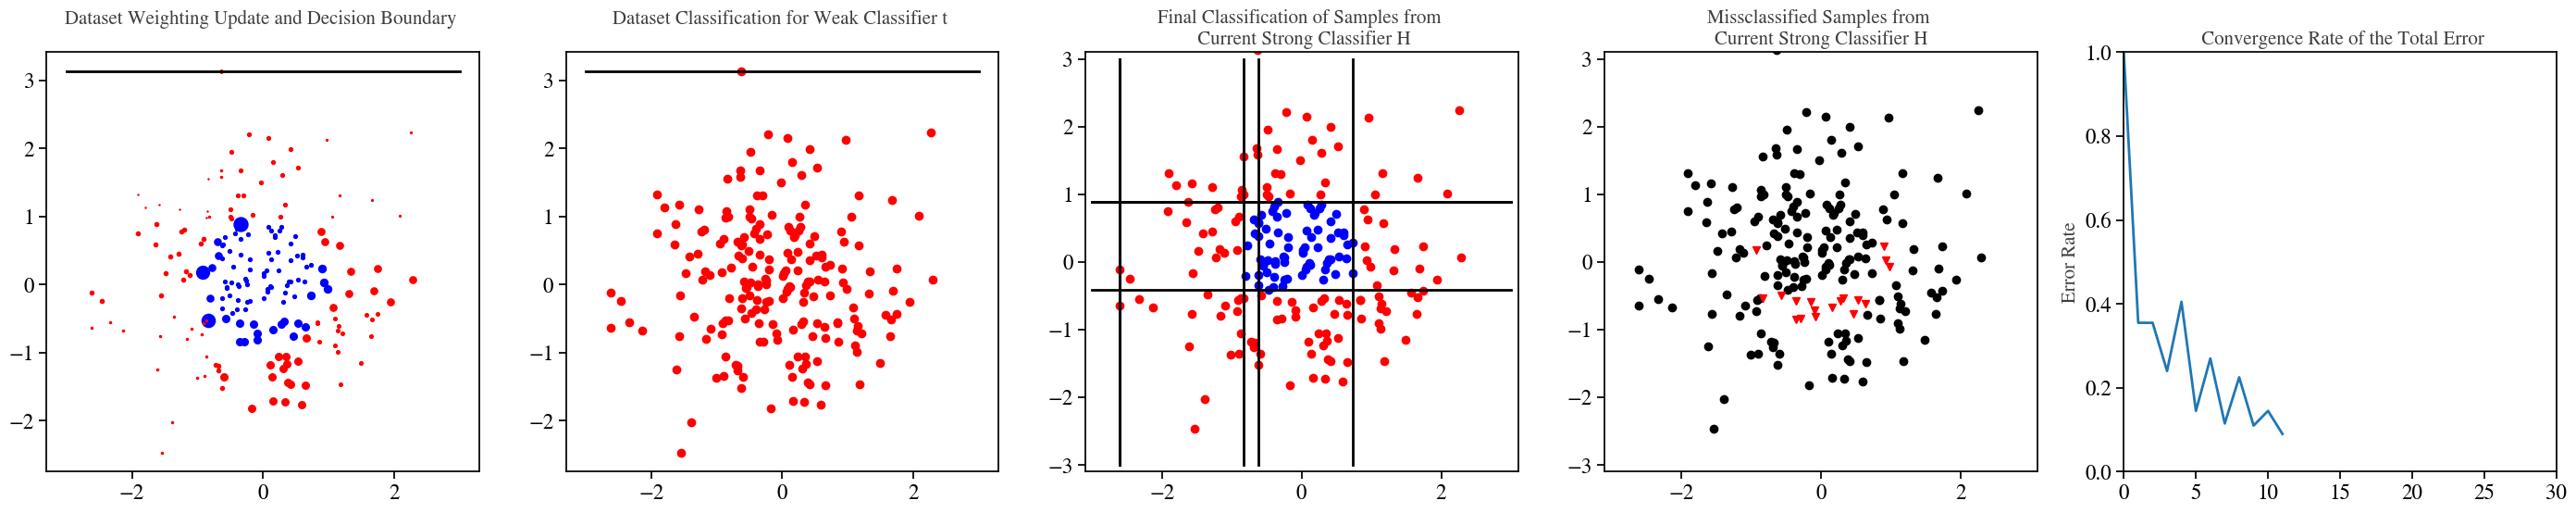

Alpha:  0.35068914648089317
BOOSTING ROUND: 12
WEIGHTED ERROR OF DECISION BOUNDARY: 0.33150671340931803 --->> FEATURE, THRESHOLD, DIRECTION: (1, -0.8457922367977413, 1.0)
CURRENT ERROR: 0.075


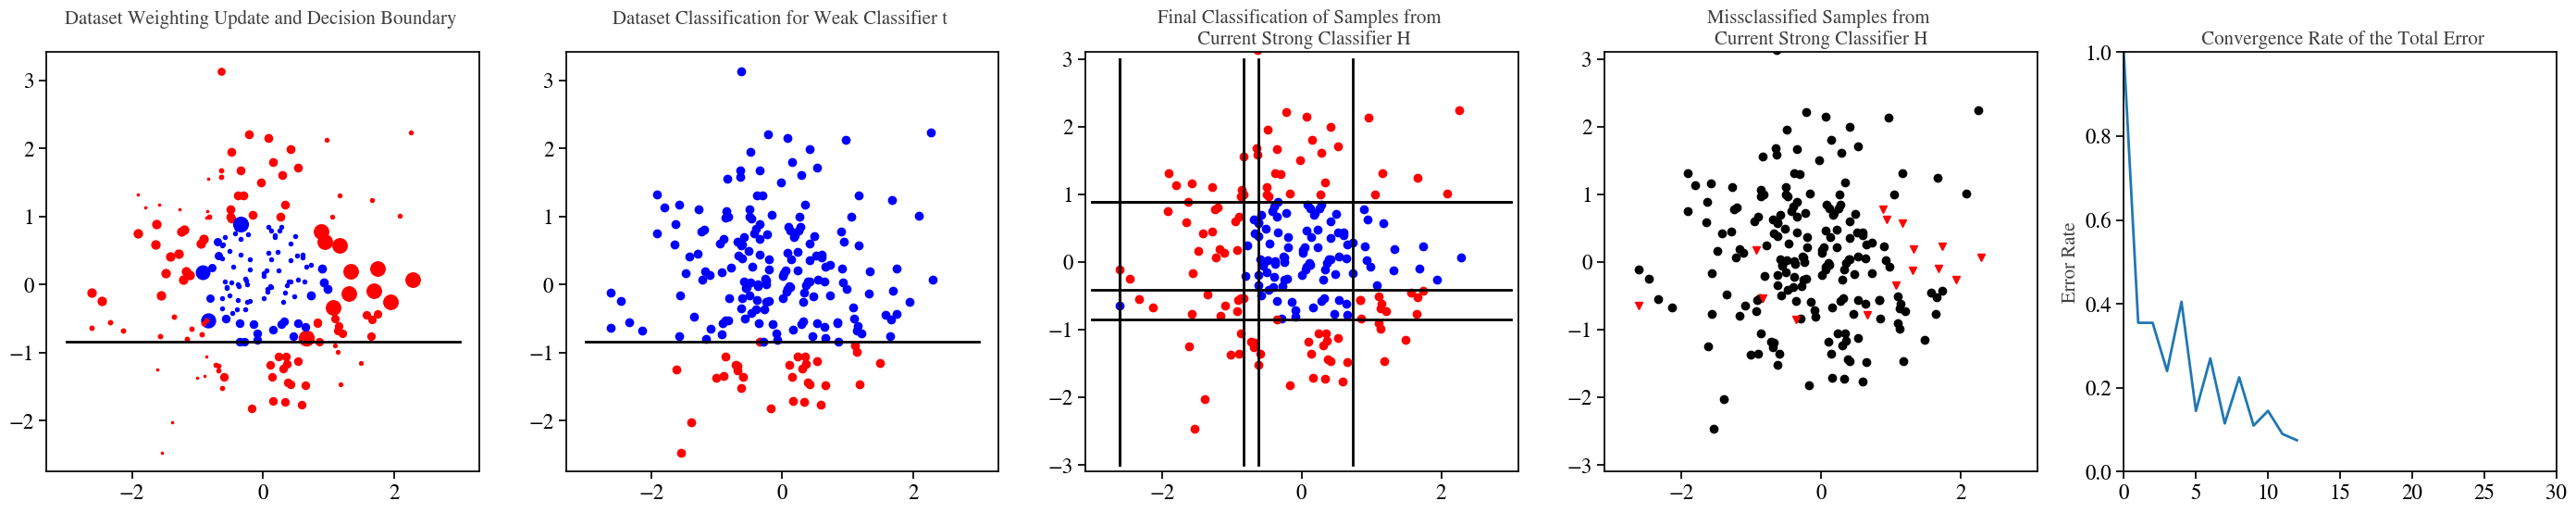

Alpha:  0.2598501602854169
BOOSTING ROUND: 13
WEIGHTED ERROR OF DECISION BOUNDARY: 0.372922311429966 --->> FEATURE, THRESHOLD, DIRECTION: (1, -2.471224830297391, -1.0)
CURRENT ERROR: 0.07


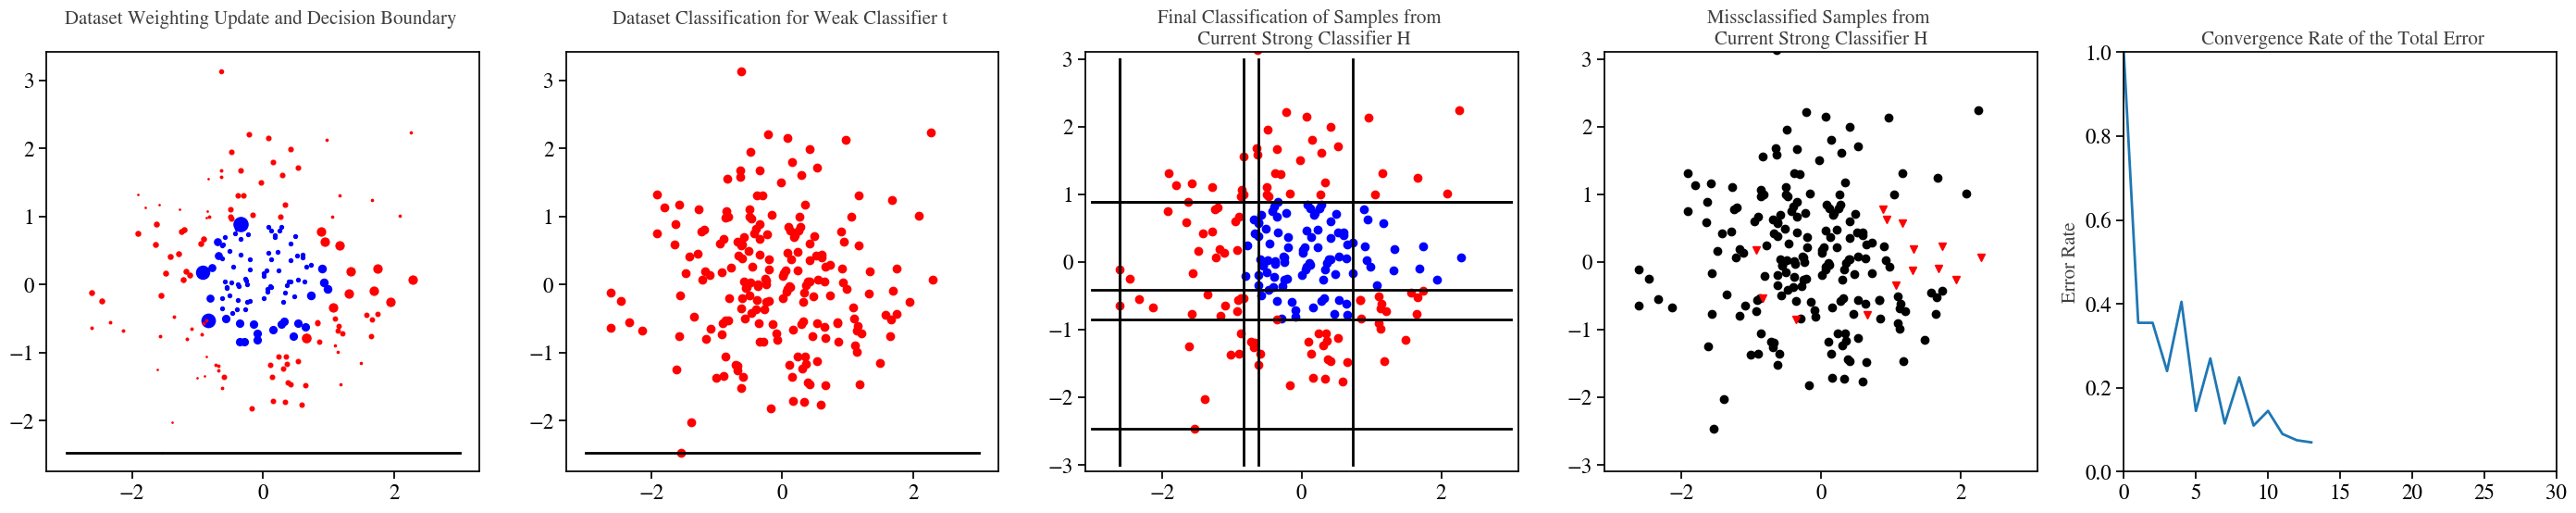

Alpha:  0.2994574388889303
BOOSTING ROUND: 14
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3545919918579628 --->> FEATURE, THRESHOLD, DIRECTION: (0, 0.7336412374640733, -1.0)
CURRENT ERROR: 0.035


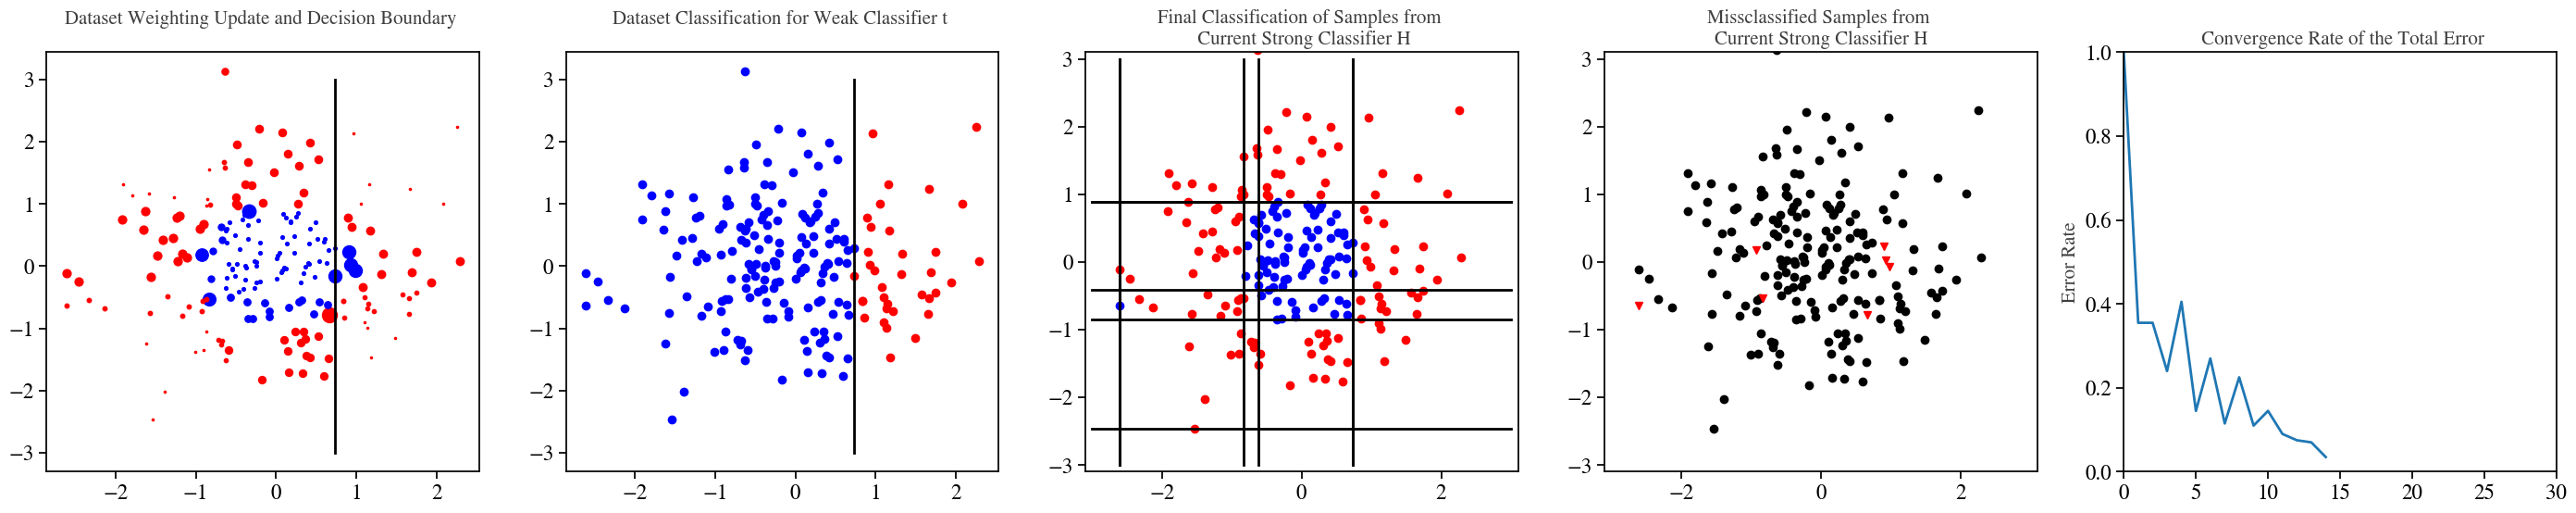

Alpha:  0.18653010372119974
BOOSTING ROUND: 15
WEIGHTED ERROR OF DECISION BOUNDARY: 0.4078017750404927 --->> FEATURE, THRESHOLD, DIRECTION: (1, -2.471224830297391, -1.0)
CURRENT ERROR: 0.04


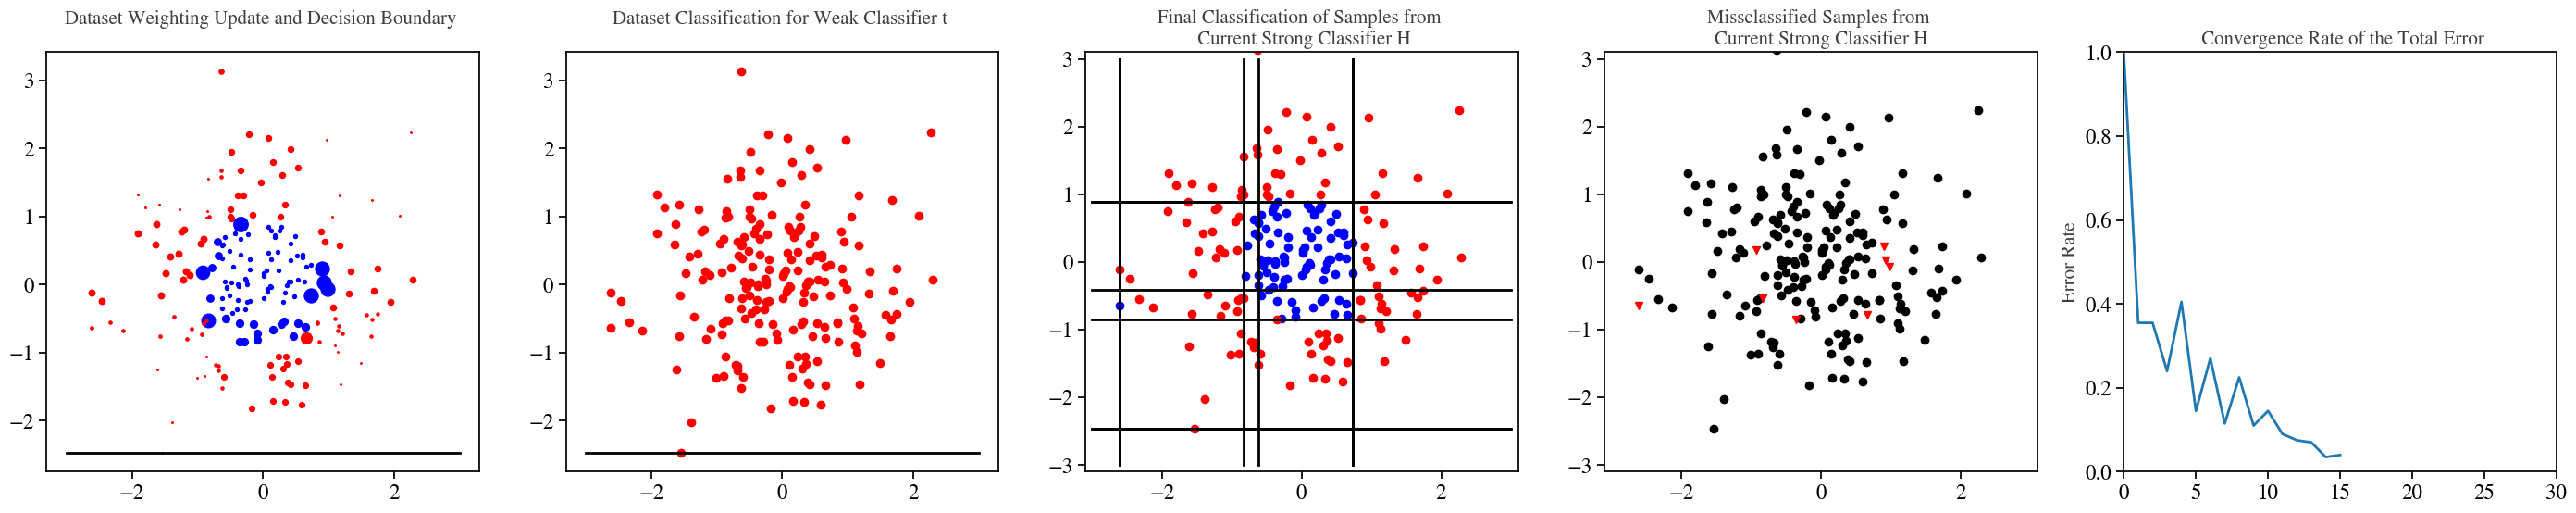

Alpha:  0.2933180724506751
BOOSTING ROUND: 16
WEIGHTED ERROR OF DECISION BOUNDARY: 0.35740705053671723 --->> FEATURE, THRESHOLD, DIRECTION: (0, -0.8313447621732909, 1.0)
CURRENT ERROR: 0.03


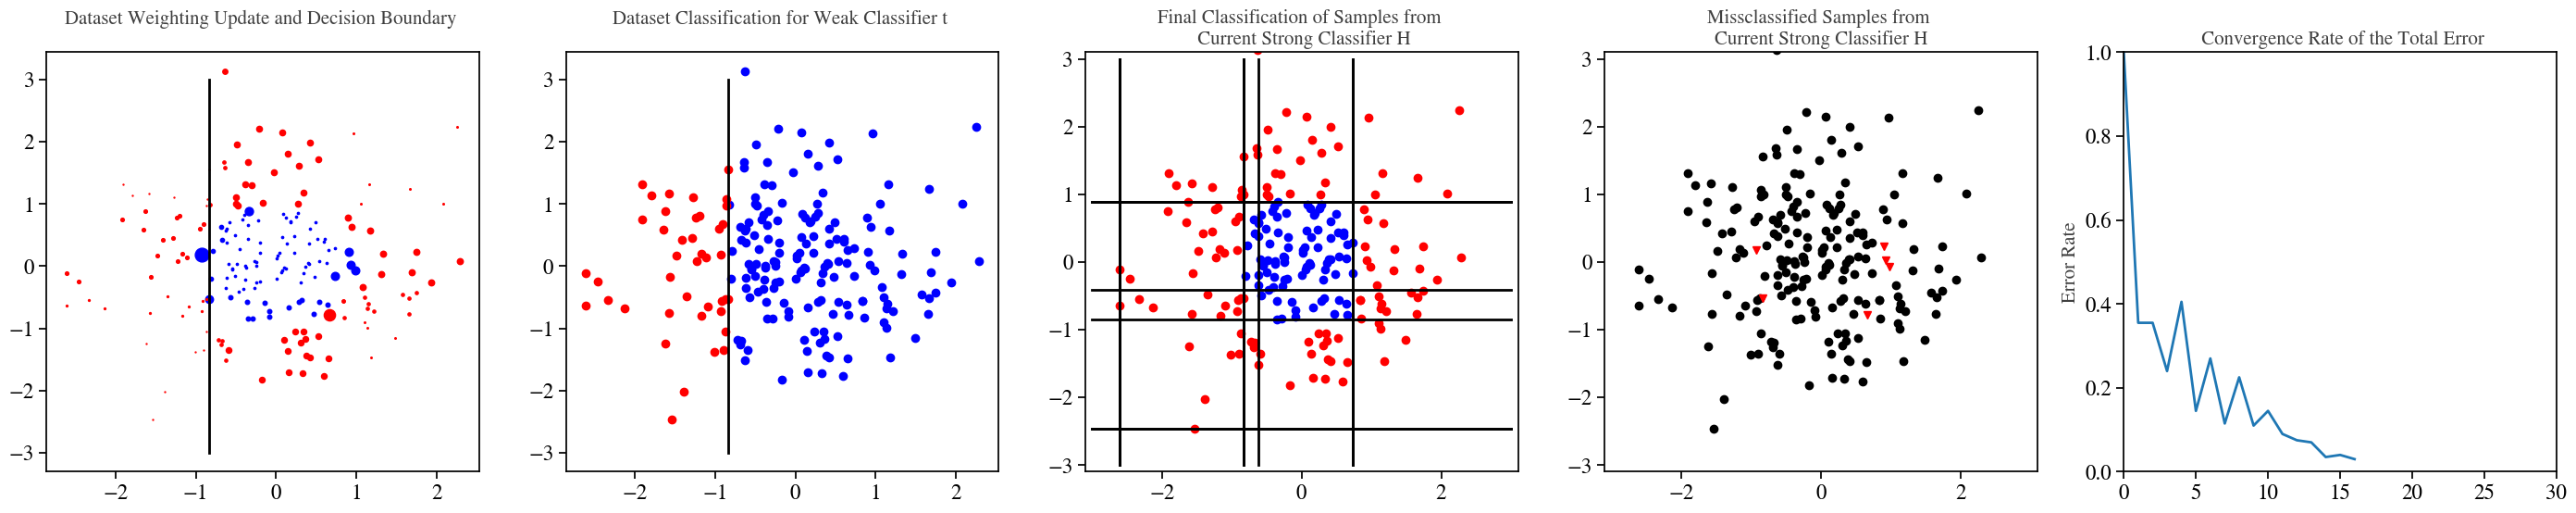

Alpha:  0.2075769388803111
BOOSTING ROUND: 17
WEIGHTED ERROR OF DECISION BOUNDARY: 0.39767696419165044 --->> FEATURE, THRESHOLD, DIRECTION: (1, -2.471224830297391, -1.0)
CURRENT ERROR: 0.035


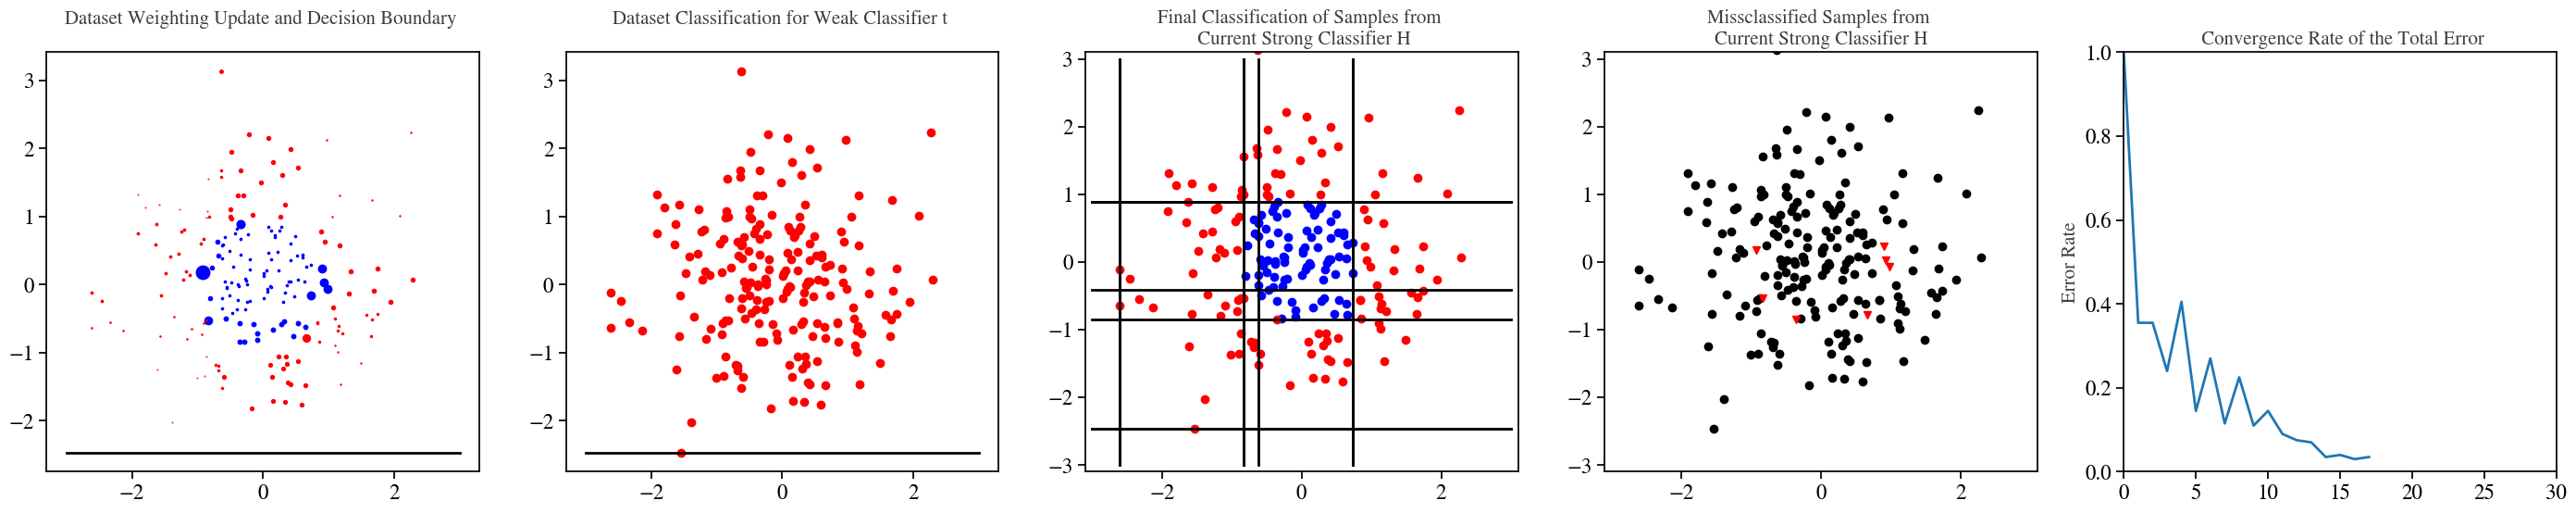

Alpha:  0.31897554321414534
BOOSTING ROUND: 18
WEIGHTED ERROR OF DECISION BOUNDARY: 0.34570984584775455 --->> FEATURE, THRESHOLD, DIRECTION: (1, 0.890642644587118, -1.0)
CURRENT ERROR: 0.03


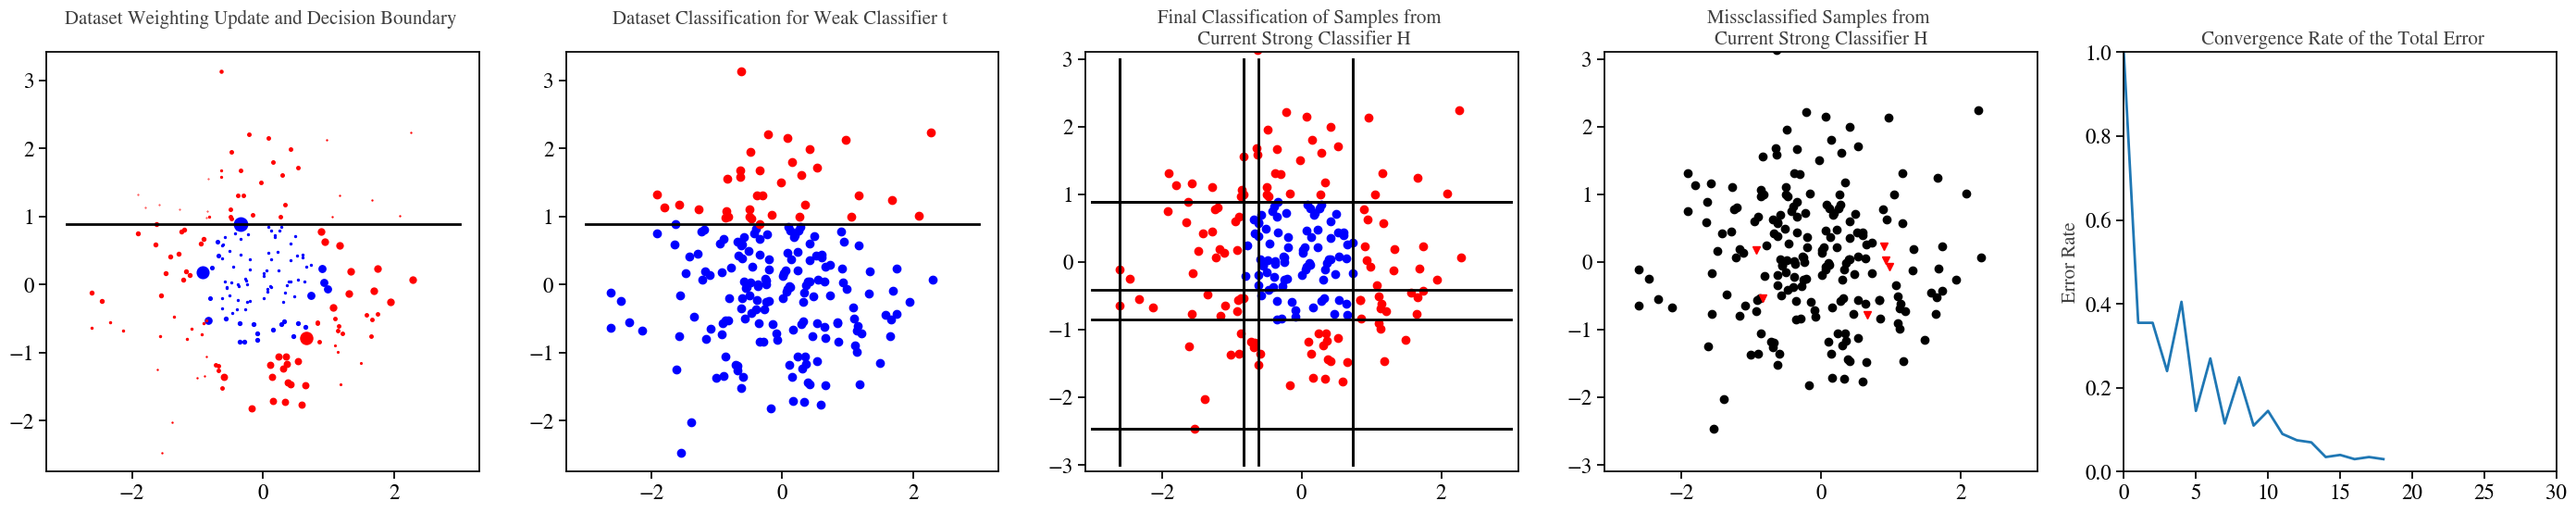

Alpha:  0.22589630036480557
BOOSTING ROUND: 19
WEIGHTED ERROR OF DECISION BOUNDARY: 0.38893464379354614 --->> FEATURE, THRESHOLD, DIRECTION: (1, -2.471224830297391, -1.0)
CURRENT ERROR: 0.03


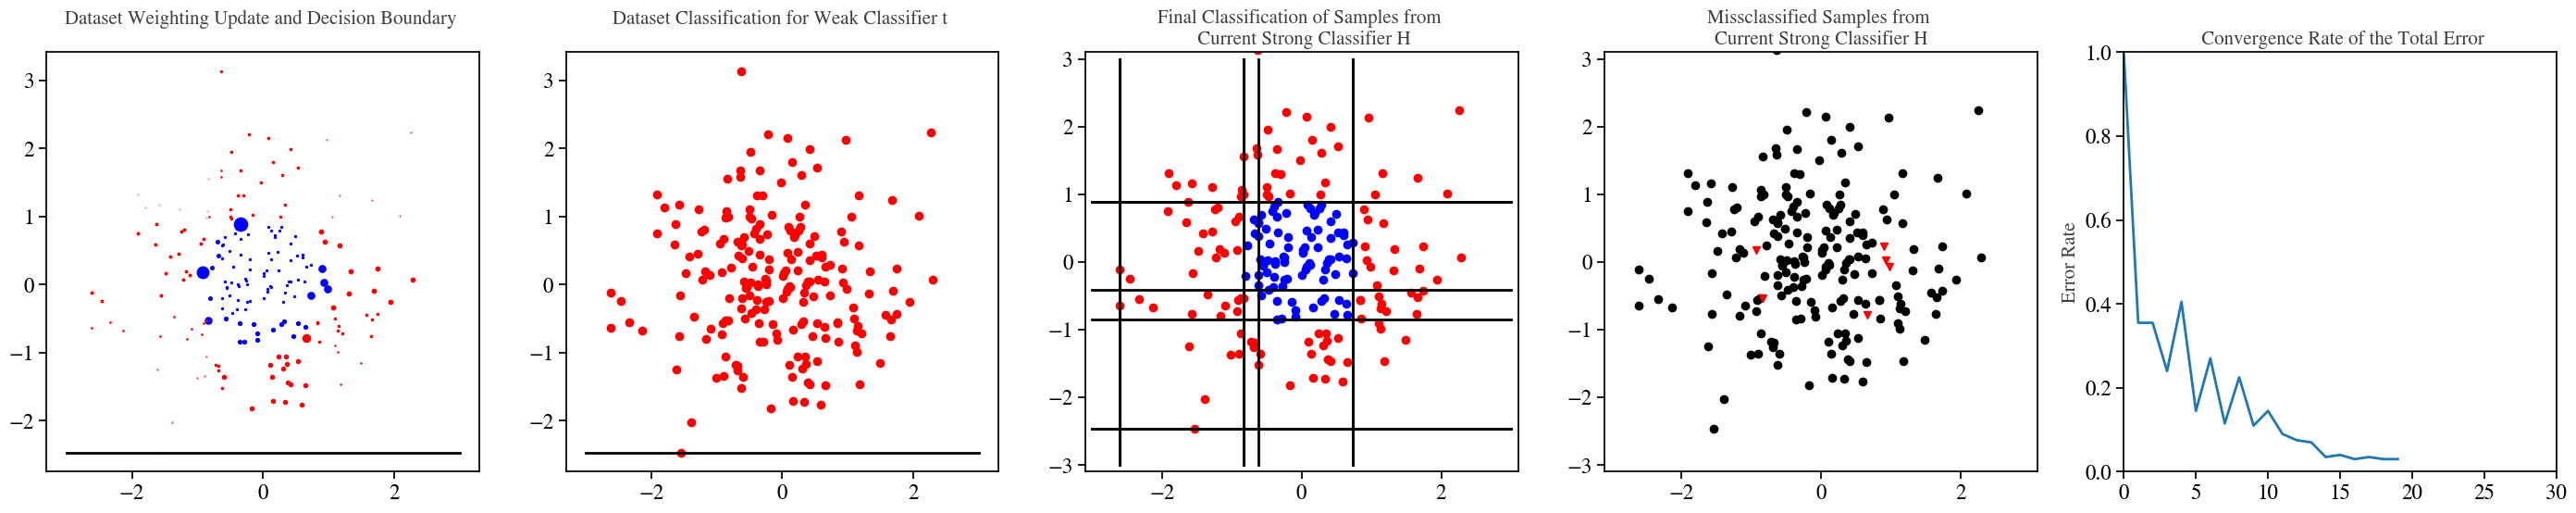

Alpha:  0.3265271028059061
BOOSTING ROUND: 20
WEIGHTED ERROR OF DECISION BOUNDARY: 0.34230160949713573 --->> FEATURE, THRESHOLD, DIRECTION: (1, -0.7174261205505921, 1.0)
CURRENT ERROR: 0.07


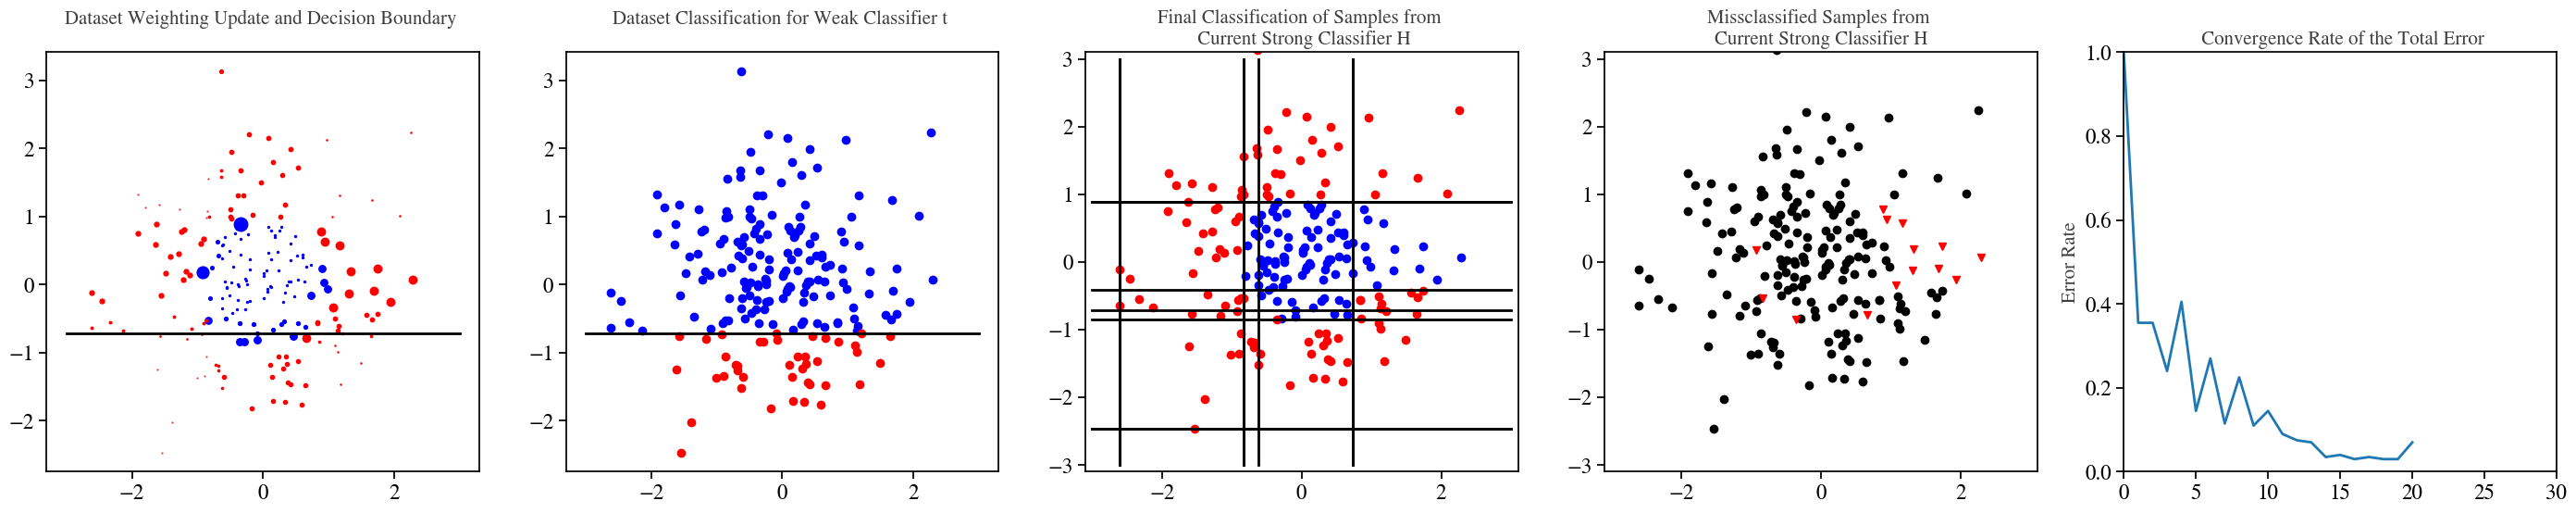

Alpha:  0.20070012364137552
BOOSTING ROUND: 21
WEIGHTED ERROR OF DECISION BOUNDARY: 0.40097596196923124 --->> FEATURE, THRESHOLD, DIRECTION: (1, -2.471224830297391, -1.0)
CURRENT ERROR: 0.045


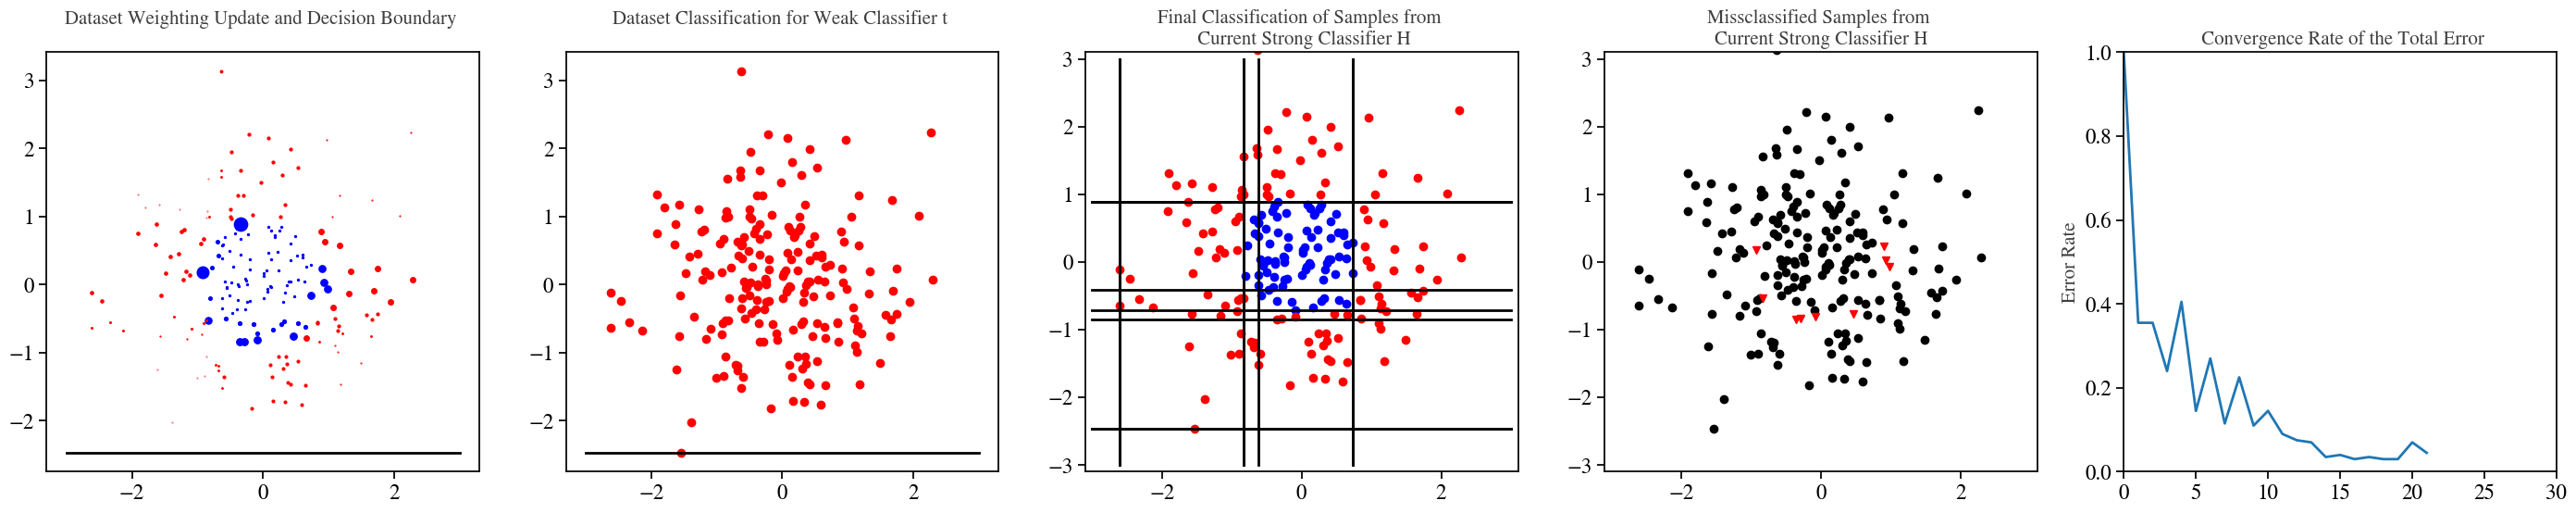

Alpha:  0.26865265918836484
BOOSTING ROUND: 22
WEIGHTED ERROR OF DECISION BOUNDARY: 0.36881465624008164 --->> FEATURE, THRESHOLD, DIRECTION: (0, 0.9833124974311018, -1.0)
CURRENT ERROR: 0.04


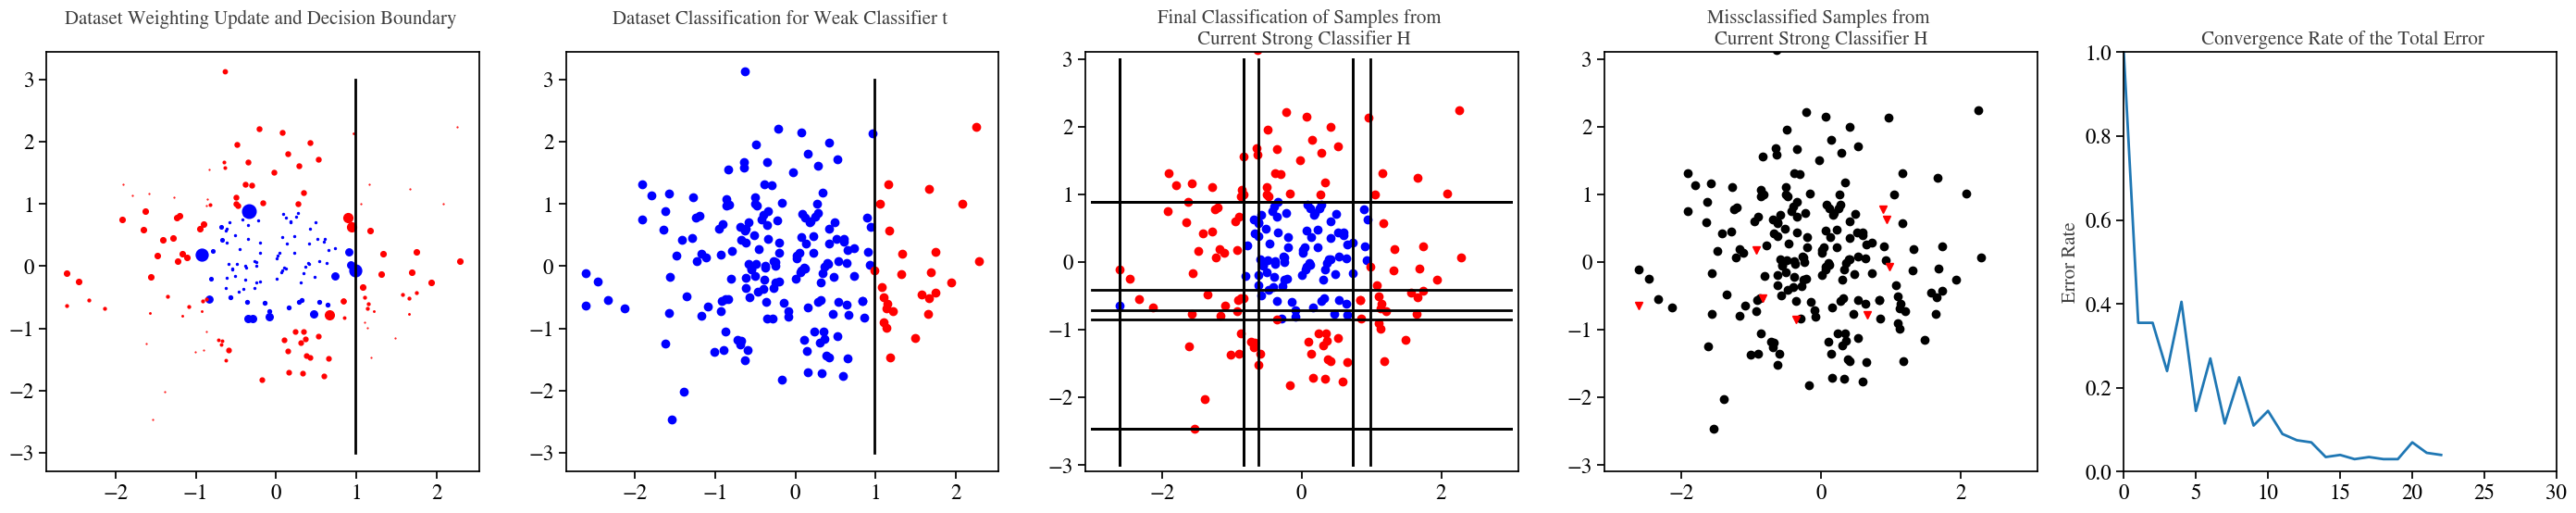

Alpha:  0.20074878359385365
BOOSTING ROUND: 23
WEIGHTED ERROR OF DECISION BOUNDARY: 0.40095258651392185 --->> FEATURE, THRESHOLD, DIRECTION: (1, -2.471224830297391, -1.0)
CURRENT ERROR: 0.045


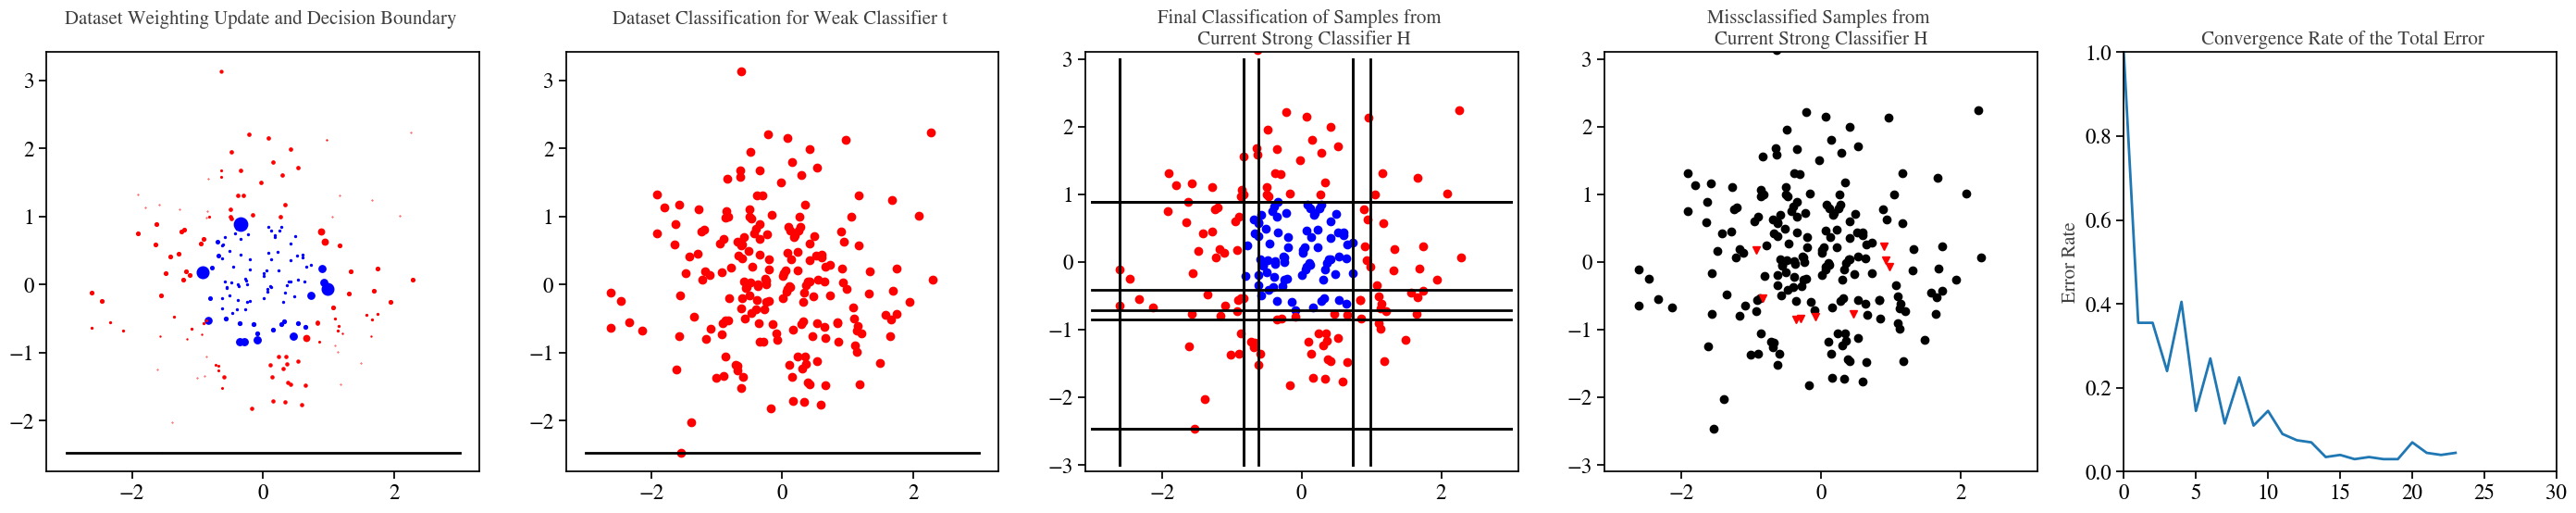

Alpha:  0.2664058408234745
BOOSTING ROUND: 24
WEIGHTED ERROR OF DECISION BOUNDARY: 0.36986134701910944 --->> FEATURE, THRESHOLD, DIRECTION: (0, -0.9258213806394652, 1.0)
CURRENT ERROR: 0.035


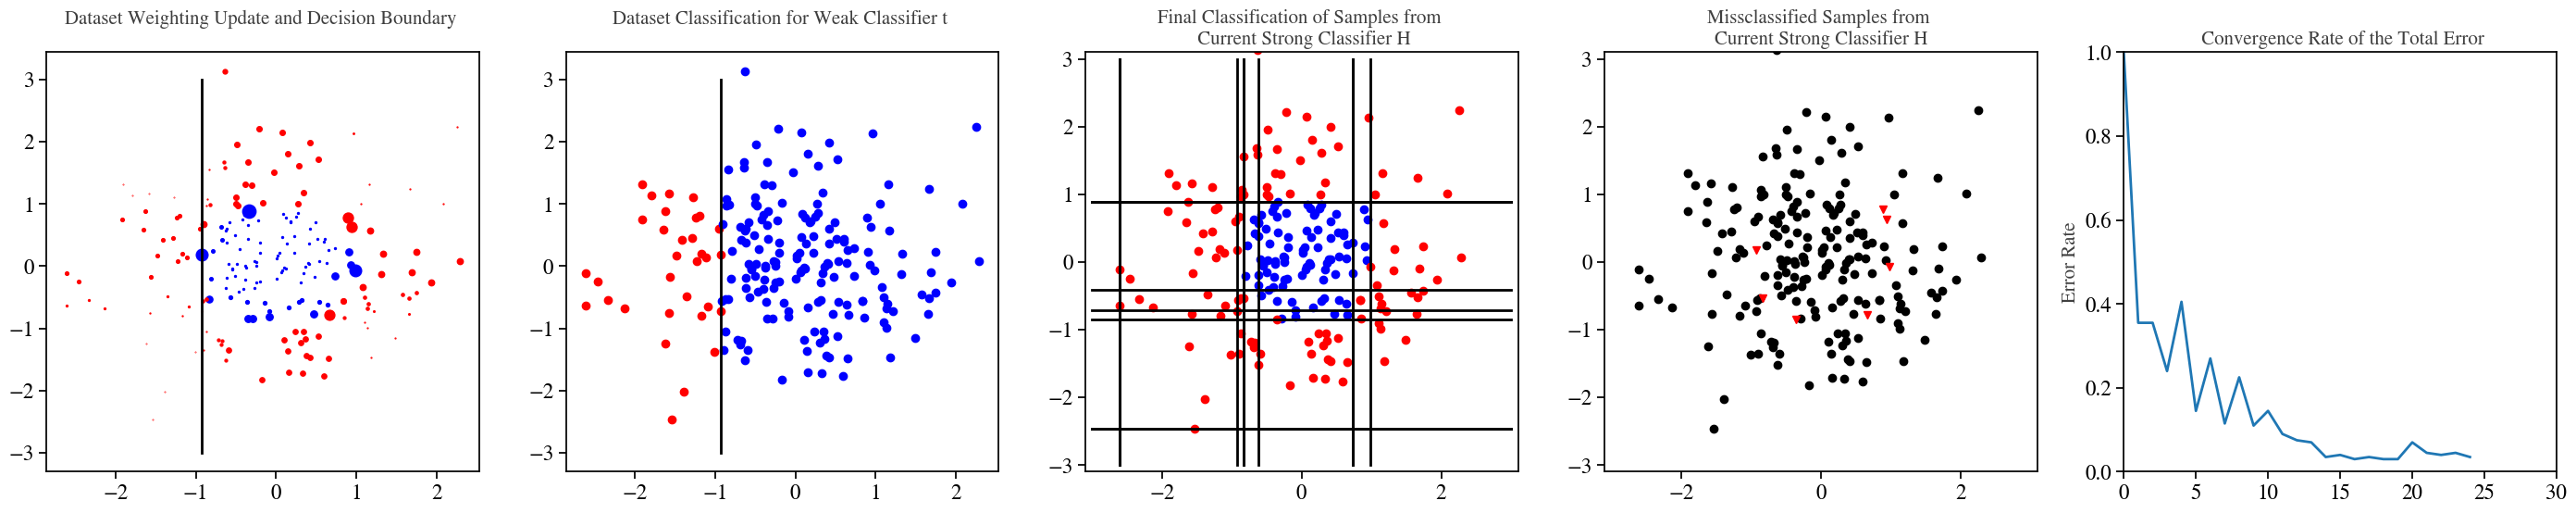

Alpha:  0.20989973729536207
BOOSTING ROUND: 25
WEIGHTED ERROR OF DECISION BOUNDARY: 0.39656473510007445 --->> FEATURE, THRESHOLD, DIRECTION: (1, -2.471224830297391, -1.0)
CURRENT ERROR: 0.045


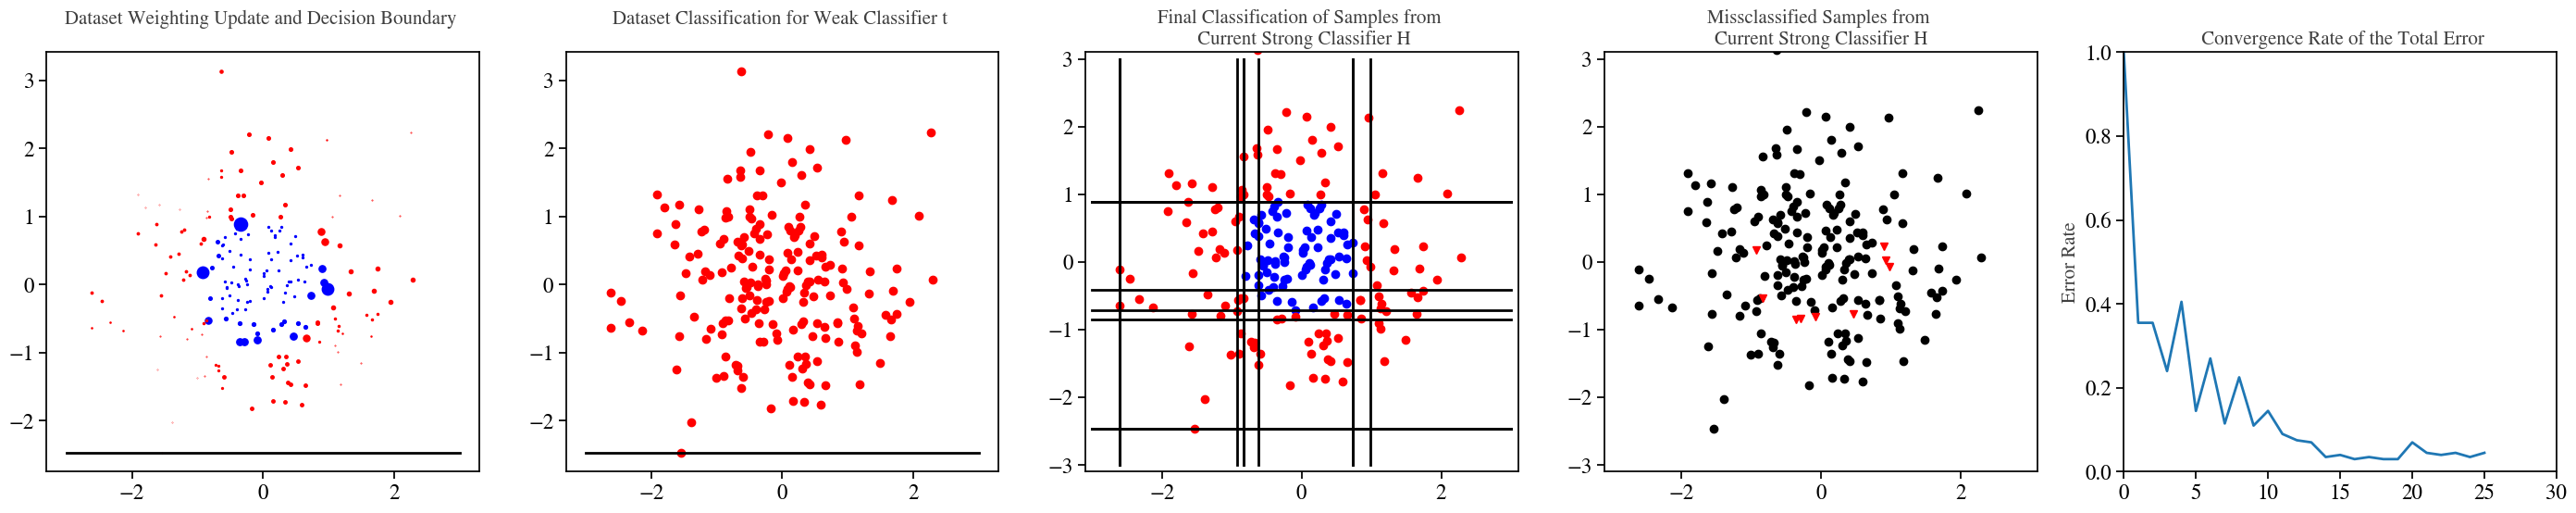

Alpha:  0.29166393579578426
BOOSTING ROUND: 26
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3581672104743899 --->> FEATURE, THRESHOLD, DIRECTION: (1, 0.890642644587118, -1.0)
CURRENT ERROR: 0.03


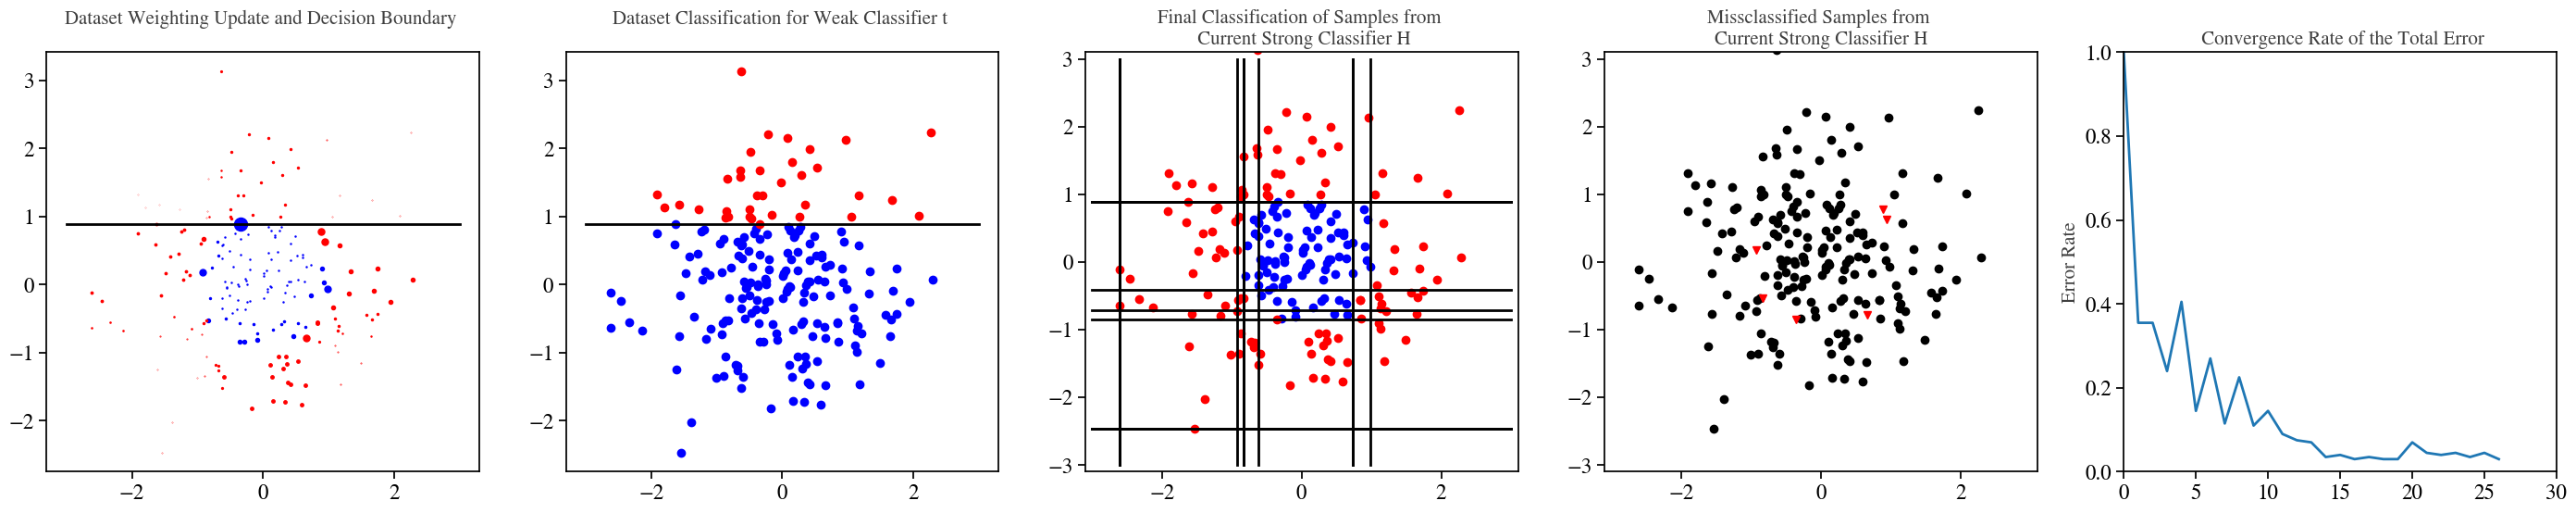

Alpha:  0.20399797774726408
BOOSTING ROUND: 27
WEIGHTED ERROR OF DECISION BOUNDARY: 0.39939275063694785 --->> FEATURE, THRESHOLD, DIRECTION: (1, -2.471224830297391, -1.0)
CURRENT ERROR: 0.035


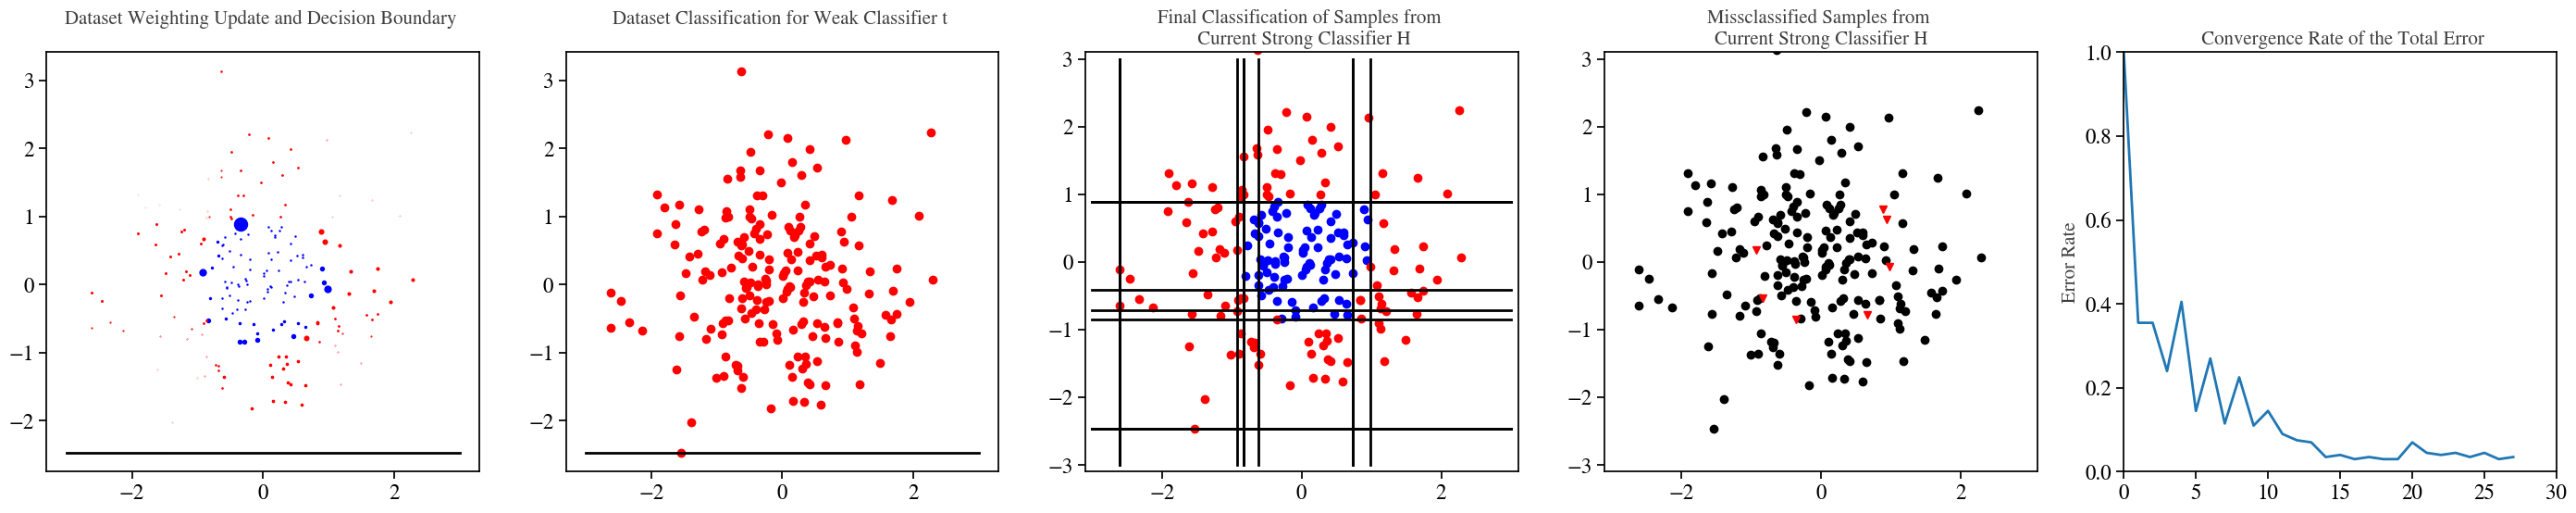

Alpha:  0.2745128322859675
BOOSTING ROUND: 28
WEIGHTED ERROR OF DECISION BOUNDARY: 0.36609049178514097 --->> FEATURE, THRESHOLD, DIRECTION: (1, -0.8457922367977413, 1.0)
CURRENT ERROR: 0.03


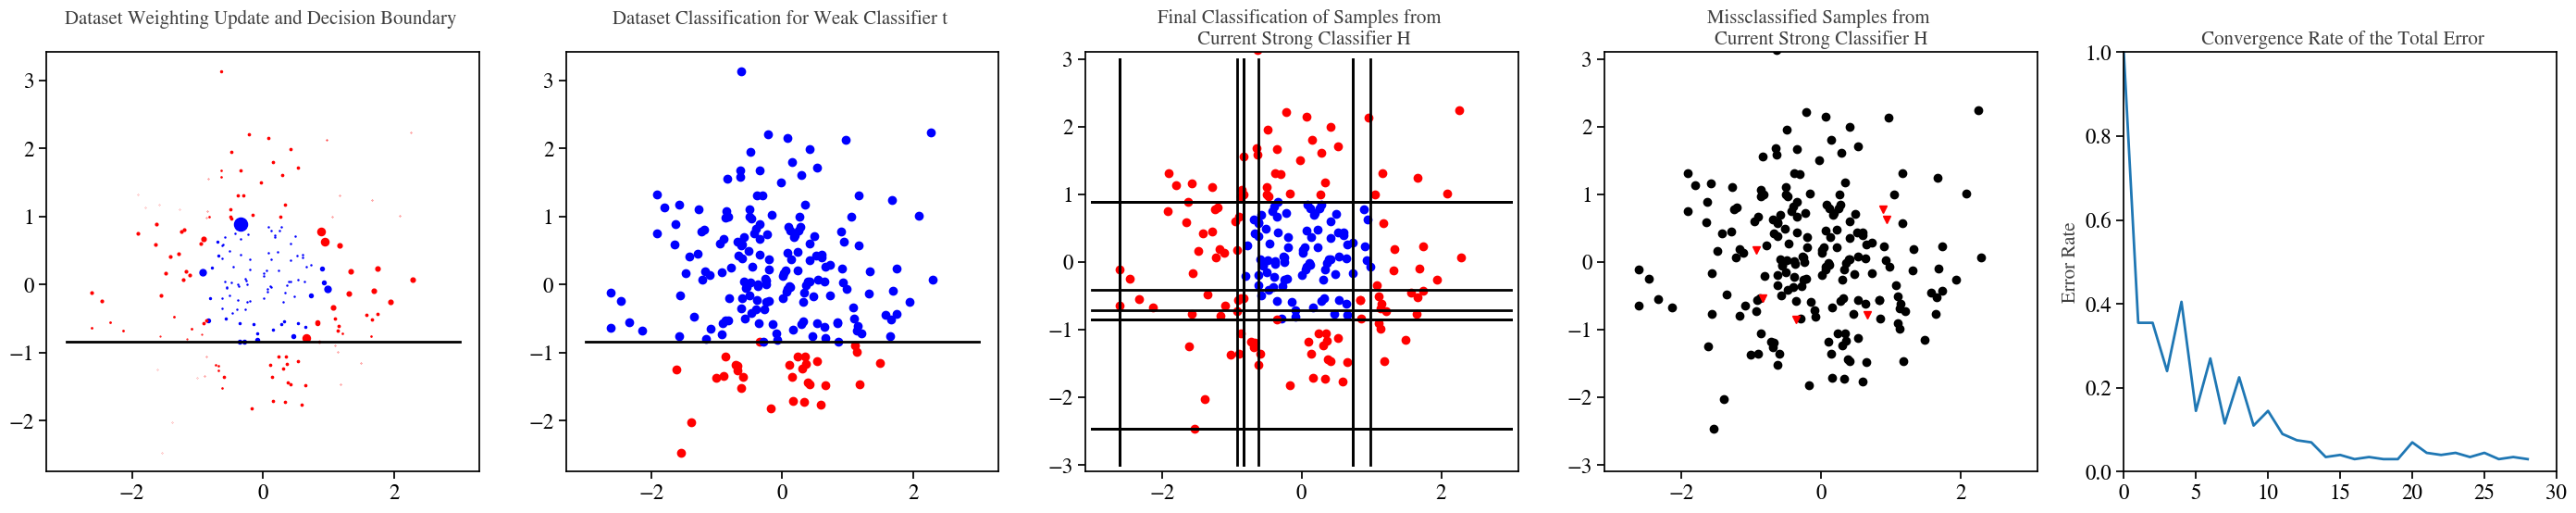

Alpha:  0.2147497843429425
BOOSTING ROUND: 29
WEIGHTED ERROR OF DECISION BOUNDARY: 0.39424583627439785 --->> FEATURE, THRESHOLD, DIRECTION: (1, -2.471224830297391, -1.0)
CURRENT ERROR: 0.035


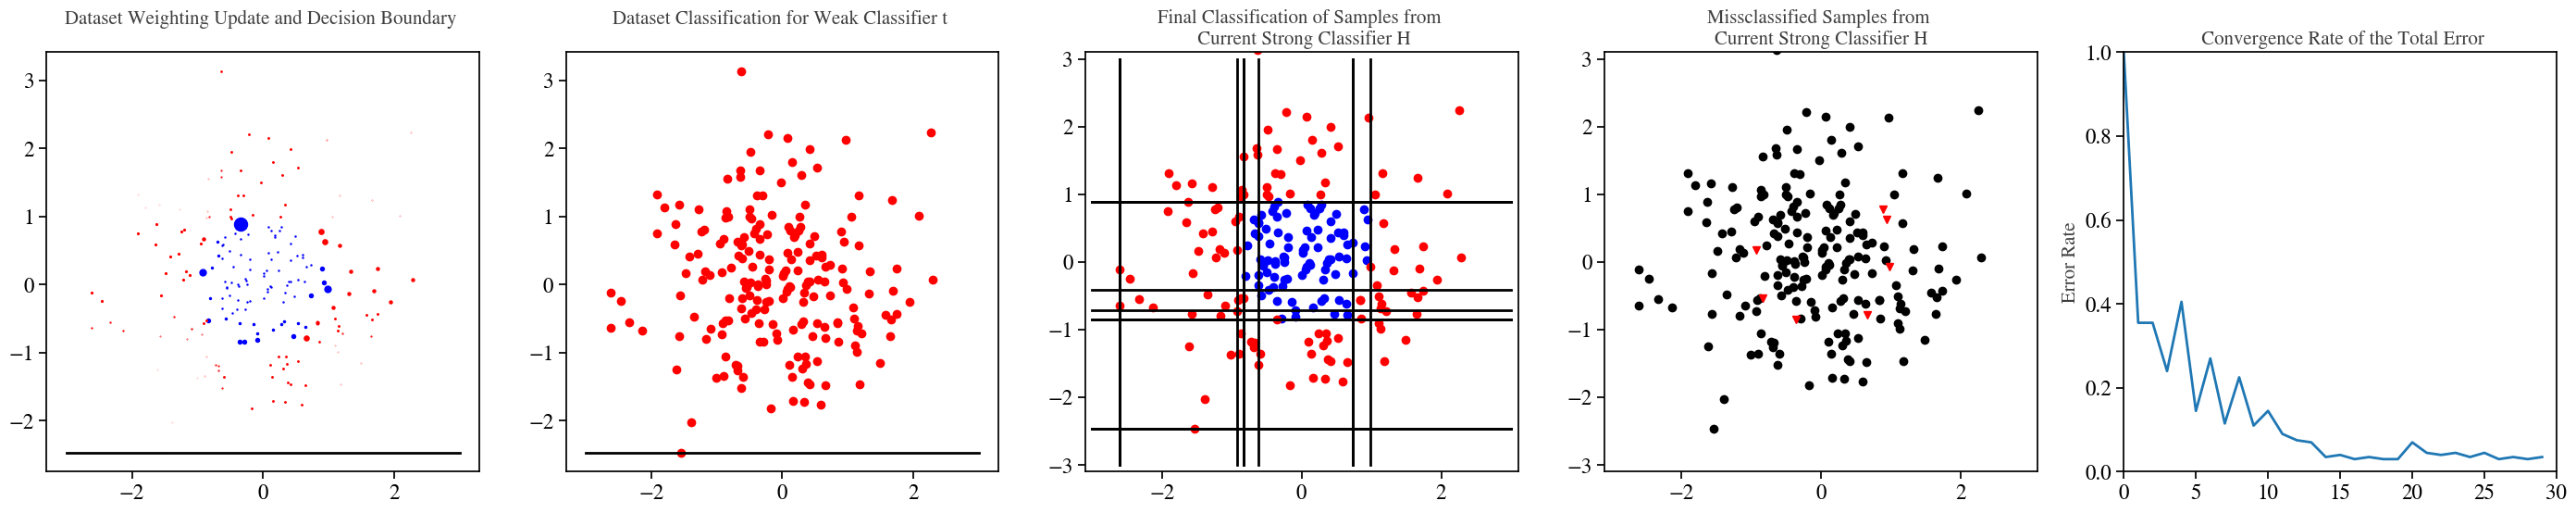

Alpha:  0.2667674735120211
BOOSTING ROUND: 30
WEIGHTED ERROR OF DECISION BOUNDARY: 0.3696927958193602 --->> FEATURE, THRESHOLD, DIRECTION: (0, 0.6413485450436057, -1.0)
CURRENT ERROR: 0.03


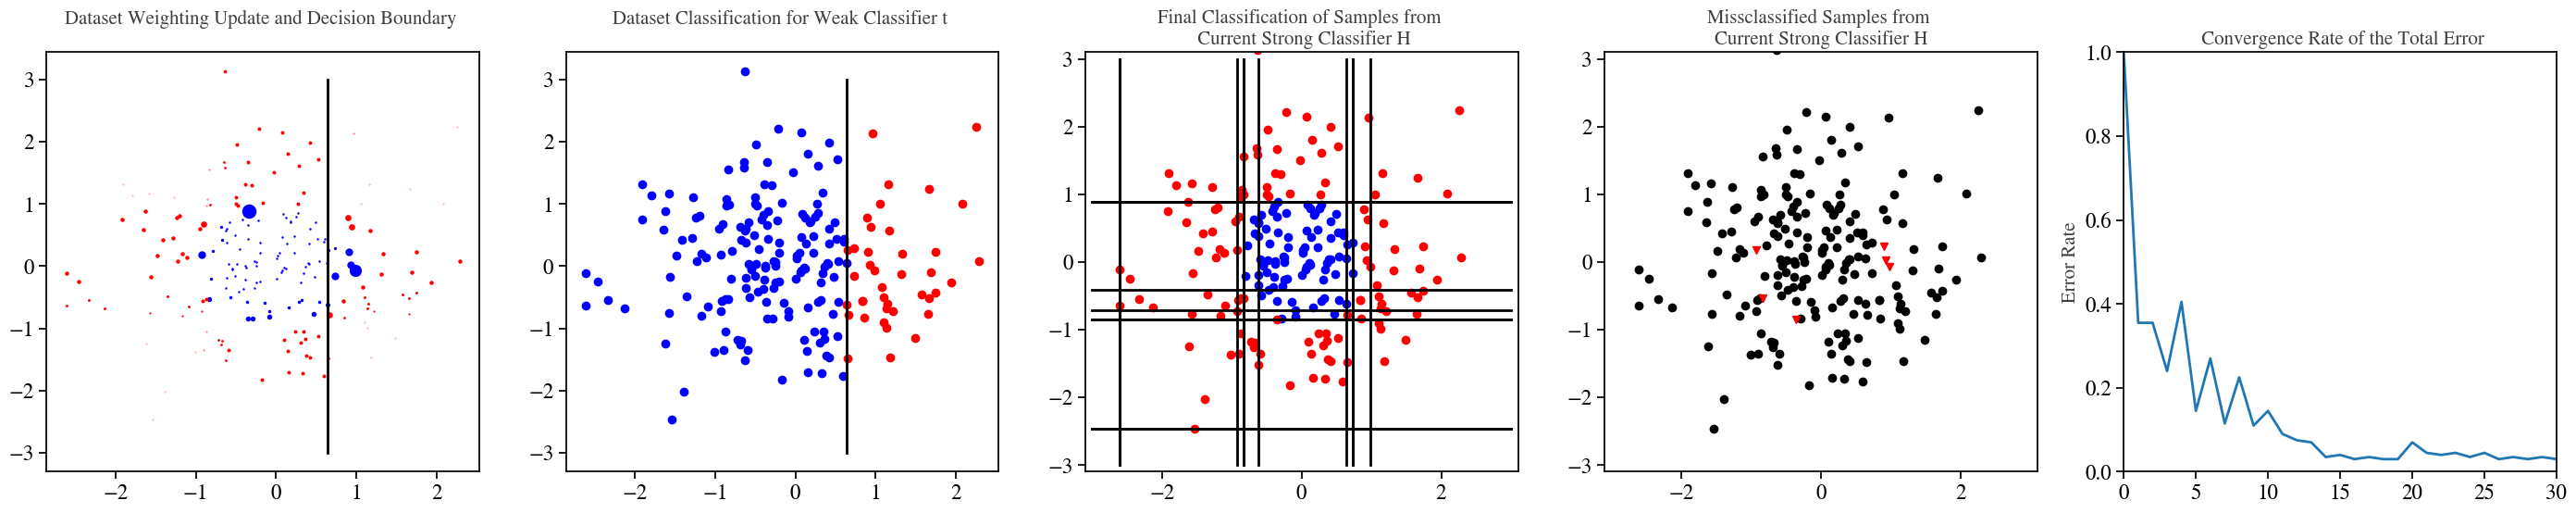

In [108]:
rcParams['figure.figsize'] = 35, 6
rcParams['font.size'] = 30

#0 - for each boosting round
for t in range(T): 

    #1 - iterate through every feature  
    for feature in range(dim):
        weighted_error = np.float64(0)
        
        #========================
        #2 - GENERATE A DECISION STUMP FOR A FEATURE
        #YOUR CODE HERE
        #========================
        #threshold, sign, weighted_error = calculate_decision_stump(x[: , feature], weight, label)
        threshold, sign, weighted_error = calculate_decision_stump_efficient(x, feature, weight, label)
        
        #========================
        #3 - KEEP TRACK OF THE FEATURE WITH THE LOWEST WEIGHTED ERROR
        #YOUR CODE HERE
        #========================        
        if weighted_error < err[t] :
            err[t] = weighted_error
            h[t][0] = threshold
            h[t][1] = feature
            h[t][2] = sign
            

    #========================
    #4 - CALCULATE ALPHA FOR BOOSTING ROUND t
    #YOUR CODE HERE
    #========================            
    alpha[t] = calculate_alpha(err[t])
    print("Alpha: ",alpha[t])
    #========================
    #5 - CLASSIFY ALL SAMPLES BASED ON THE SELECTED FEATURE FOR BOOSTING ROUND t
    #YOUR CODE HERE
    #======================== 
    #print(x[:, int(h[t][1]) ])
    classification = classify_dataset_against_weak_classifier(x[:, int(h[t][1]) ], h[t][0], h[t][2] )
    
    #========================
    #6 - UPDATE WEIGHTS BASED ON THE CORRECTNESS OF THE CLASSIFICATION
    #YOUR CODE HERE
    #========================   
    weight = update_weights(weight, alpha[t], classification, label)

    #========================
    #7 - NORMALISE REASSIGNED WEIGHTS
    #YOUR CODE HERE
    #========================  
    weight = normalise_weights(weight )
    
    #--------------------------------------------
    #BOOSTING ALGORITHM DONE
    #--------------------------------------------
    
    visualise(x, h, t, label, weight)

### reset training parameters - execute this to change the dataset

In [109]:
# T = 10
# np.random.seed(0)
# #comment out this line if you do not want to regenerate the traning set
# #x = np.random.randn(N, 2)  # dim=2
# h = np.zeros([T, 3], dtype=np.float64)
# alpha = np.zeros(T, dtype=np.float64)
# err = np.ones(T, dtype=np.float64) * np.inf
# weight = np.ones(N, dtype=np.float64) / (N)
# label = np.zeros(N, dtype=np.int64)

In [110]:
# #label = x[:,0] < x[:,1]               #linear separation example
# label = (x[:, 0]**2 + x[:, 1]**2) < 1  # nonlinear separation example
# label = label * 1.0
# pos1 = np.nonzero(label == 1)
# pos2 = np.where(label == 0)
# label[pos2] = -1

Text(0.5, 1.0, 'Training Dataset')

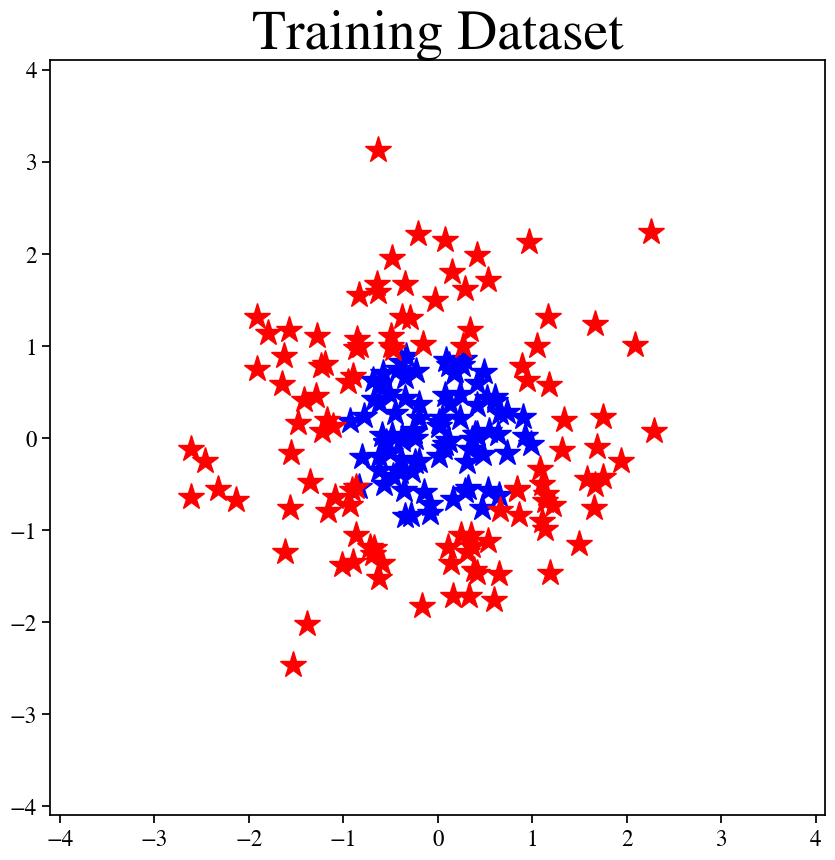

In [111]:
rcParams['figure.figsize'] = 10, 10
plt.plot(x[pos1, 0], x[pos1, 1], 'b*', markersize=20)
plt.plot(x[pos2, 0], x[pos2, 1], 'r*', markersize=20)
plt.axis([-4.1, 4.1, -4.1, 4.1])
        
plt.title("Training Dataset", size=40)

## Step 9 - save classifier

**Exercise:** create a dataframe with all the necessary columns that are needed to represent the AdaBoost classifier from above. Give the columns meaningful names. Then save the classifier to a csv file.

Result should look something like the below:

In [112]:
classifier_df = pd.DataFrame(h, columns=['threshold','feature','direction'])
classifier_df['alpha'] = alpha
classifier_df.head()

threshold  feature  direction     alpha
0  -0.623515      0.0        1.0  0.309520
1  -2.612485      0.0       -1.0  0.274850
2   0.890643      1.0       -1.0  0.329690
3  -0.413701      1.0        1.0  0.340350
4  -2.612485      0.0       -1.0  0.349995

In [113]:
classifier_df.to_csv("Adaboost_1.csv")
classifier_df.tail()


threshold  feature  direction     alpha
25   0.890643      1.0       -1.0  0.291664
26  -2.471225      1.0       -1.0  0.203998
27  -0.845792      1.0        1.0  0.274513
28  -2.471225      1.0       -1.0  0.214750
29   0.641349      0.0       -1.0  0.266767

## Step 10 - apply the AdaBoost classifier

Text(0.5, 1.0, 'Test Data')

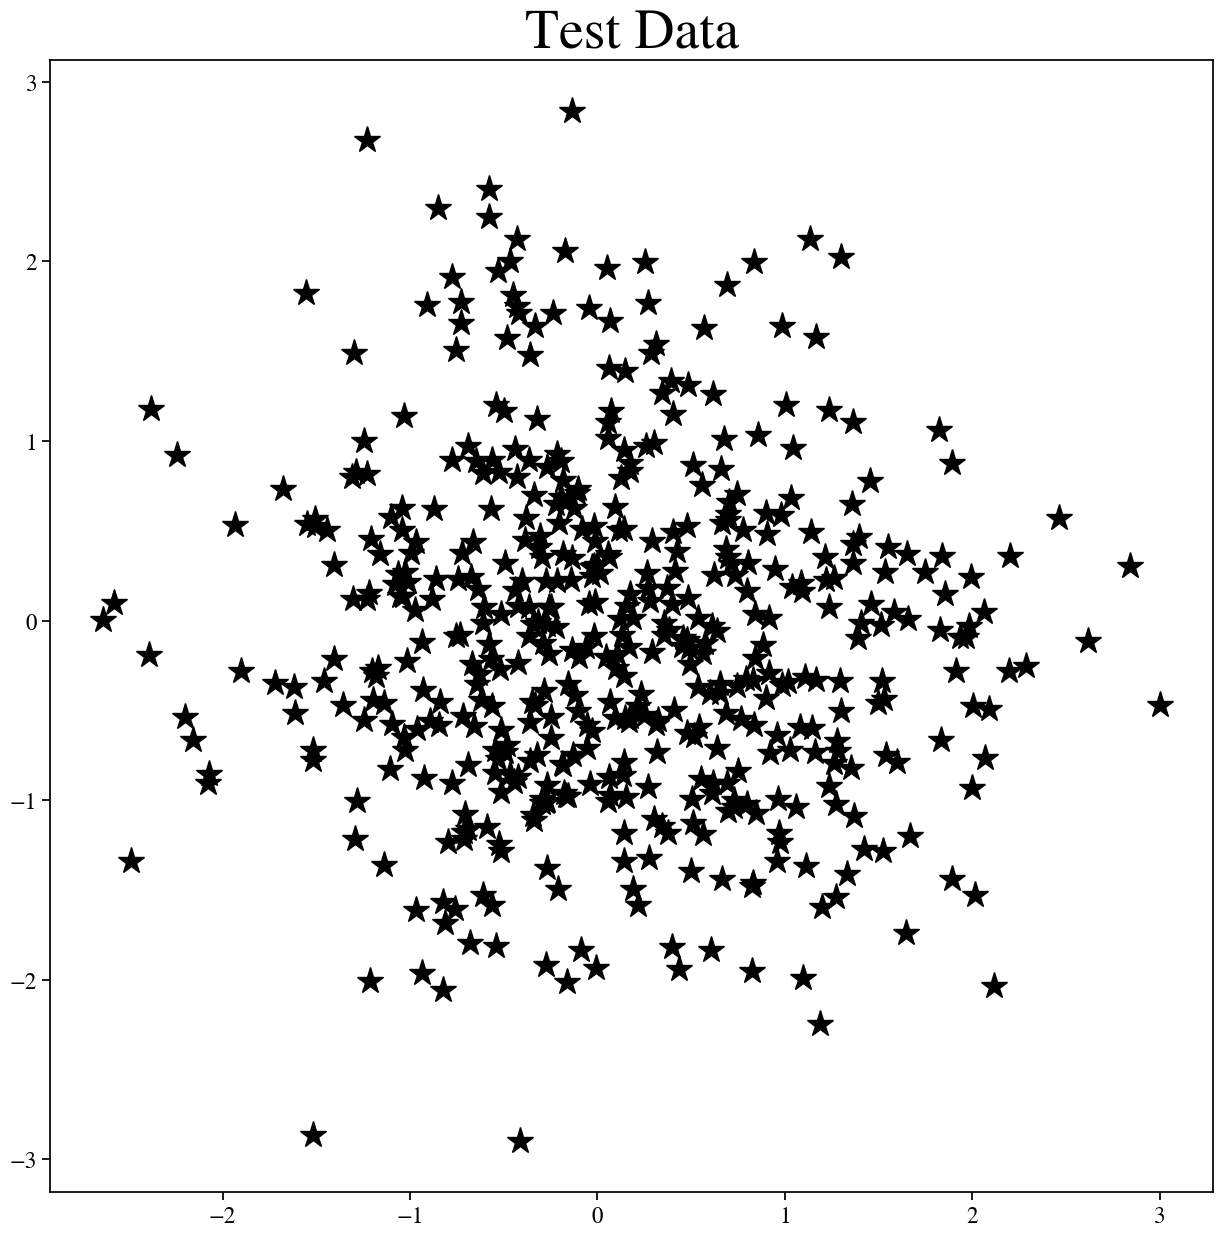

In [114]:
rcParams['figure.figsize'] = 15, 15
size = 500
test_set_x = np.random.randn(size, 2)  # dim=2
plt.plot(test_set_x[:,0], test_set_x[:,1], 'k*', markersize=20)
#plt.axis([-4.1, 4.1, -4.1, 4.1])
plt.title("Test Data", size=40)

In [115]:
booster = adabooster(True)
booster.reset_params(30, x)
booster.fit(x,label)

Round  0  Done!
Round  1  Done!
Round  2  Done!
Round  3  Done!
Round  4  Done!
Round  5  Done!
Round  6  Done!
Round  7  Done!
Round  8  Done!
Round  9  Done!
Round  10  Done!
Round  11  Done!
Round  12  Done!
Round  13  Done!
Round  14  Done!
Round  15  Done!
Round  16  Done!
Round  17  Done!
Round  18  Done!
Round  19  Done!
Round  20  Done!
Round  21  Done!
Round  22  Done!
Round  23  Done!
Round  24  Done!
Round  25  Done!
Round  26  Done!
Round  27  Done!
Round  28  Done!
Round  29  Done!


In [116]:
booster.saveClassifier("test.csv")
booster.score(x,label)

0.97

**Exercise:** given the boosted classifier that has been trained, apply it to the dataset above by first defining the function which classifies each individual sample.

In [117]:
def classify_sample(xi, boost_classif):
    boost_classif = boost_classif.values
    classification_sum = np.float64(0)
    
    #========================
    #YOUR CODE HERE
    #========================  
    for thresh, feat, sign, alpha in boost_classif:
        ht = np.sign(xi[int(feat)] - thresh) * sign
        classification_sum += alpha * ht 
        
    if classification_sum >= 0:
        return 1
    else:
        return -1

    

In [118]:
print(test_set_x[0])
classify_sample(test_set_x[0], classifier_df)
#should return 1

[-1.10259806  0.57867602]


-1

Text(0.5, 1.0, 'Classified Dataset')

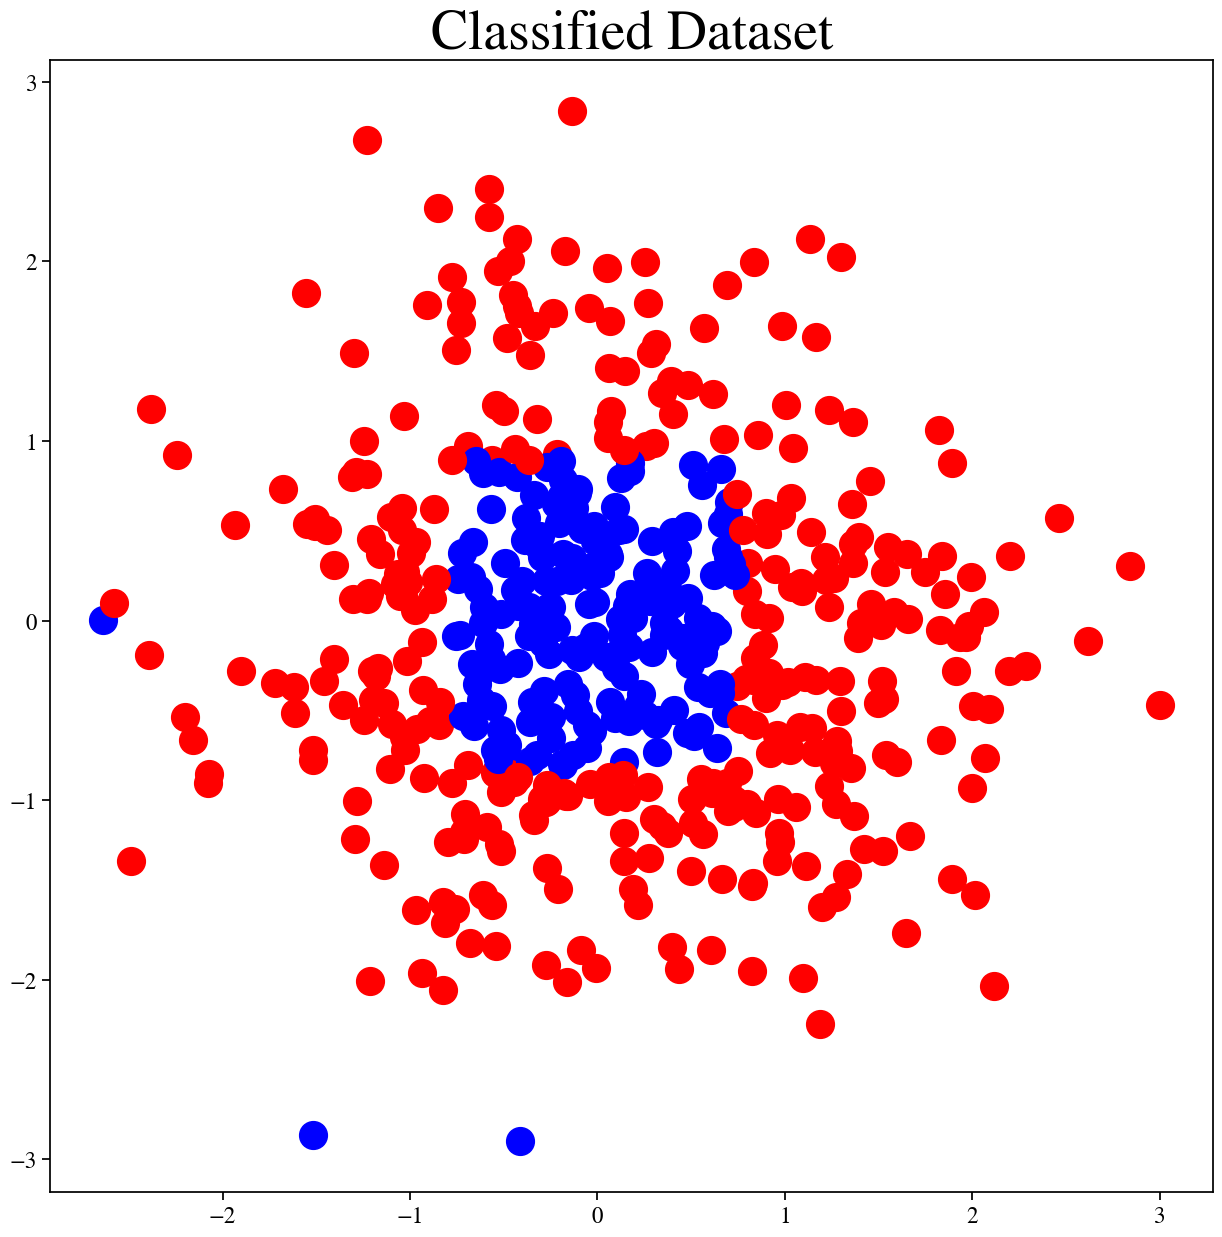

In [119]:
rcParams['figure.figsize'] = 15, 15
for i in range(len(test_set_x)):
    if classify_sample(test_set_x[i], classifier_df) == 1:
        plt.plot([test_set_x[i,0]],[test_set_x[i,1]], 'bo', markersize=20)
    else:
        plt.plot(test_set_x[i,0],test_set_x[i,1], 'ro', markersize=20)
        
plt.title("Classified Dataset", size=40)

## How confident are we in the classifier's predictions?

### The theory of margins

We can measure confidence of a boosted ensemble classifier by using a quantity called the **margin**. 

The final classifier is a weighted majority vote which represents an outcome of an *election* conducted by all the weak classifiers. 

Real-world elections outcomes are analysed in terms of the margin of victory in terms of the difference between the percentage of votes gained by various parties. The same approach of margins (and percent of the sum of weighted votes) can be used in order to calculate the the classifiers confidence.

The margin in this context is the difference between the weighted fraction of the weak classifiers predicting the correct label and the weighted fraction predicting the incorrect label. 

Intuitively, when the vote is close so that the predicted class label is based on a narrow majority, the margin will be small in magnitude and correspondingly so will our confidence in its prediction. 

Alternatively, as the majority share of the vote increases, the margin will also be proportionally large, thus increasing our confidence in the prediction. Therefore, the magnitude of the margin is a reasonable measure of confidence.


> Source: http://rob.schapire.net/papers/explaining-adaboost.pdf



**Exercise:** As the first step, let's define a function which takes a dataframe in the format below and returns for each sample its total sum of votes, as well as a sum for all the negative and a sum of all the positive votes it has received.

In [120]:
test_set_x[:5]

array([[-1.10259806,  0.57867602],
       [-0.8447801 , -0.58252104],
       [ 2.61404736, -0.11538784],
       [ 0.0556124 ,  0.37247513],
       [ 0.4137346 ,  0.2729628 ]])

In [121]:
def sum_classifier_votes_for_each_sample(dataset, df, classifier_df):
    for i in range(len(dataset)):
        classification_sum = np.float64(0)
        neg_votes = np.float64(0)
        pos_votes = np.float64(0)
        for idx, thresh, feat, sign, alpha in classifier_df.itertuples():
            #========================
            #YOUR CODE HERE
            #========================  
            ht = np.sign(dataset[i,int(feat)] - thresh) * sign
            classification_sum += alpha * ht
            if ht < 0:
                neg_votes += alpha * ht
            else:
                pos_votes += alpha * ht

        #========================
        #YOUR CODE HERE
        #========================  
        df['sum_alpha'].iloc[i] = classification_sum
        df['pos_votes'].iloc[i] = pos_votes
        df['neg_votes'].iloc[i] = neg_votes
    
    return df
    

In [122]:
test_set_x_df = pd.DataFrame(test_set_x)
test_set_x_df['sum_alpha'] = 0 
test_set_x_df['pos_votes'] = 0 
test_set_x_df['neg_votes'] = 0 

sum_classifier_votes_for_each_sample(test_set_x, test_set_x_df, classifier_df)
#should return output in a format as below

c:\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0         1  sum_alpha  pos_votes  neg_votes
0   -1.102598  0.578676  -0.670965   3.775349  -4.446314
1   -0.844780 -0.582521  -0.818854   3.701405  -4.520259
2    2.614047 -0.115388  -0.667880   3.776892  -4.444772
3    0.055612  0.372475   1.724476   4.973070  -3.248594
4    0.413735  0.272963   1.724476   4.973070  -3.248594
..        ...       ...        ...        ...        ...
495 -0.733916 -0.081950   1.105437   4.663550  -3.558113
496  1.234472  1.169160  -3.242064   2.489800  -5.731864
497  0.568243  1.626190  -0.849707   3.685978  -4.535686
498  1.839108  0.359747  -0.667880   3.776892  -4.444772
499 -0.267333 -0.026337   1.724476   4.973070  -3.248594

[500 rows x 5 columns]

**Exercise:** Before we calculate the margin, we can already get a sense of confidence that the classifier has in each classification by examining the sum of all alphas which is going to signify greater confidence as this sum moves away from zero in either direction. Visualise each sample's sum of alphas below by setting the size of each in proportion to its sum pf alpha votes. Interpret the plot.

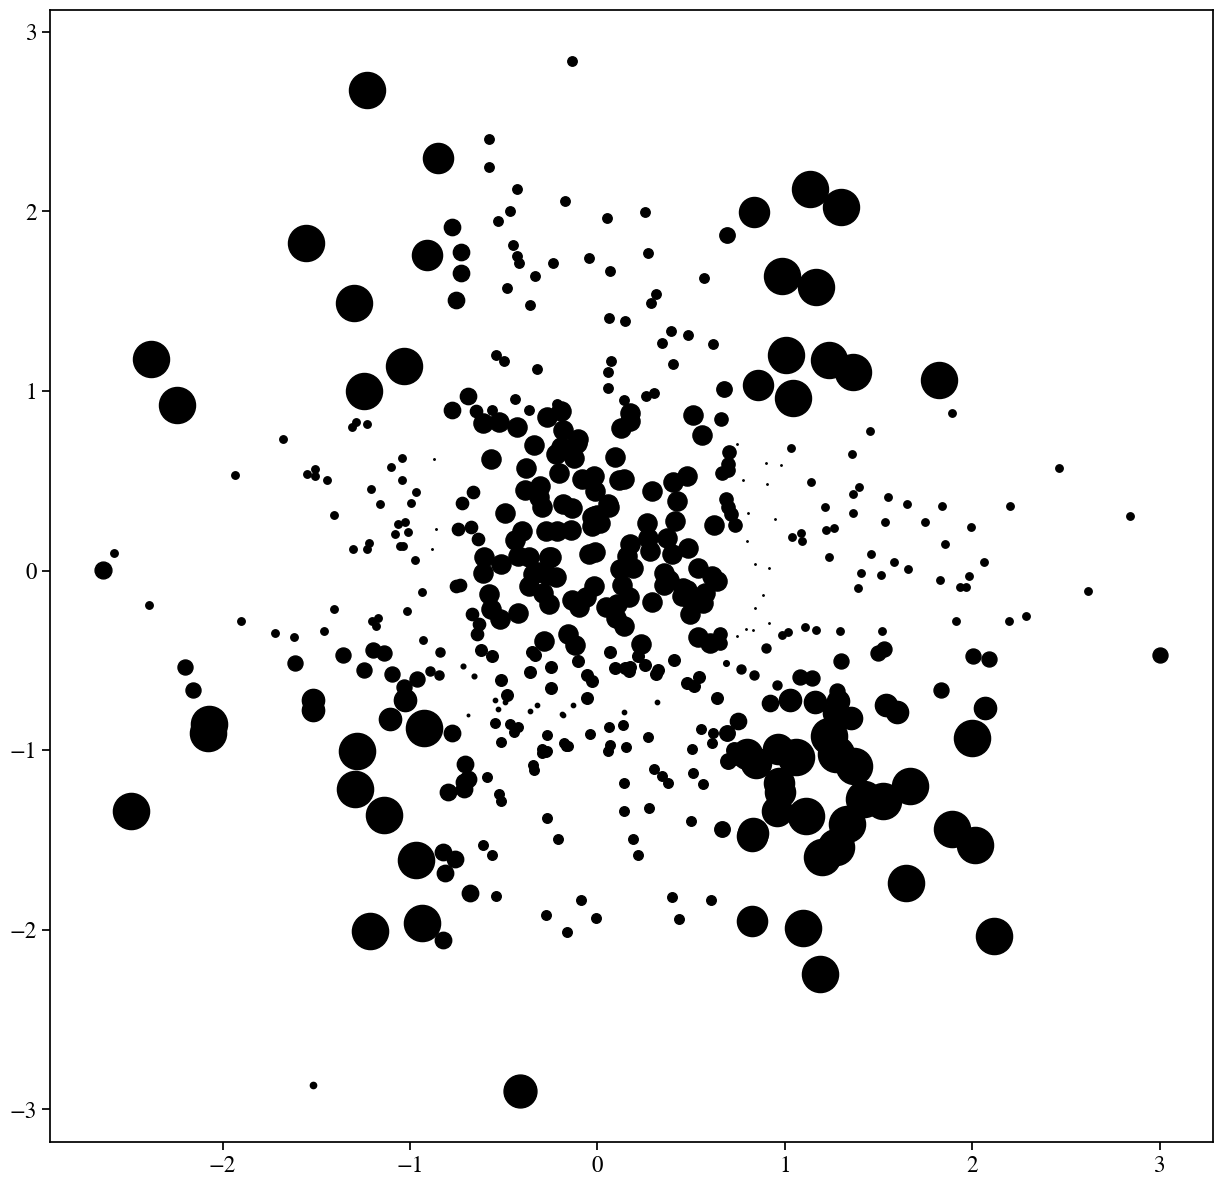

In [123]:
rcParams['figure.figsize'] = 15, 15
for i in range(len(test_set_x)):
    plt.plot([test_set_x[i,0]],[test_set_x[i,1]], 'ko', markersize=(np.abs(test_set_x_df.sum_alpha.iloc[i])*8) )

In [124]:
test_set_x_df.head()

0         1  sum_alpha  pos_votes  neg_votes
0 -1.102598  0.578676  -0.670965   3.775349  -4.446314
1 -0.844780 -0.582521  -0.818854   3.701405  -4.520259
2  2.614047 -0.115388  -0.667880   3.776892  -4.444772
3  0.055612  0.372475   1.724476   4.973070  -3.248594
4  0.413735  0.272963   1.724476   4.973070  -3.248594

**Exercise:** Let us now calculate the actual margin using the function below. Create a new column to the dataframe above called 'margin' and calculate this quantity for each sample which is going to be the absolute weighted majority vote of the winning label, divided by all the available weighted votes on offer.

In [125]:
def margin_calculation(sign, pos, neg, tot_votes):
    #========================
    #YOUR CODE HERE
    #========================     
    if np.sign(sign) < 0:
        return np.abs(neg) / tot_votes
    else:
        return pos / tot_votes

In [126]:
total_alpha_votes = np.sum(classifier_df.alpha)
total_alpha_votes

8.221663727089211

In [127]:
test_set_x_df['total_alpha_votes'] = total_alpha_votes
test_set_x_df['margin'] = test_set_x_df[['sum_alpha','pos_votes','neg_votes','total_alpha_votes']].apply(lambda x: margin_calculation(*x), axis=1)
test_set_x_df.head()

0         1  sum_alpha  pos_votes  neg_votes  total_alpha_votes  \
0 -1.102598  0.578676  -0.670965   3.775349  -4.446314           8.221664   
1 -0.844780 -0.582521  -0.818854   3.701405  -4.520259           8.221664   
2  2.614047 -0.115388  -0.667880   3.776892  -4.444772           8.221664   
3  0.055612  0.372475   1.724476   4.973070  -3.248594           8.221664   
4  0.413735  0.272963   1.724476   4.973070  -3.248594           8.221664   

     margin  
0  0.540805  
1  0.549799  
2  0.540617  
3  0.604874  
4  0.604874

## Increasing (boosting) the Margins

We can visualize the effect AdaBoost has on the margins of the training examples by plotting the cumulative distribution function. 

More specifically, we can see how AdaBoost boosts the margin of training samples as the size of the ensemble increases.

When plotting the margin, we have to change its sign to a negative if the training sample has not been trained correctly.


In [128]:
def margin_calculation_for_training_samples(sign, pos, neg, tot_votes ):  
    if np.sign(sign) < 0:
        return np.abs(neg) / tot_votes, -1
    else:
        return pos / tot_votes, 1

In [129]:
classifier_df = pd.DataFrame(h, columns=['threshold','feature','direction'])
classifier_df['alpha'] = alpha
classifier_df.head()

training_set_x_df = pd.DataFrame(x)
training_set_x_df['sum_alpha'] = 0 
training_set_x_df['pos_votes'] = 0 
training_set_x_df['neg_votes'] = 0 

training_set_x_df = sum_classifier_votes_for_each_sample(x, training_set_x_df, classifier_df)
training_set_x_df.head()

c:\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0         1  sum_alpha  pos_votes  neg_votes
0  0.130093  0.363751   1.724476   4.973070  -3.248594
1 -1.795850  1.137553  -3.245149   2.488258  -5.733406
2  0.307632 -1.236434  -0.859683   3.680991  -4.540673
3  0.338078 -0.115695   1.724476   4.973070  -3.248594
4  0.228506  0.476771   1.724476   4.973070  -3.248594

In [130]:
total_alpha_votes = np.sum(classifier_df.alpha)
total_alpha_votes

8.221663727089211

In [131]:
training_set_x_df['classification'] = 0
training_set_x_df['margin'] = 0
training_set_x_df['total_alpha_votes'] = total_alpha_votes
result = training_set_x_df[['sum_alpha','pos_votes','neg_votes','total_alpha_votes']].apply(lambda x: margin_calculation_for_training_samples(*x), axis=1)
training_set_x_df['margin'] = result.apply(lambda x: x[0])
training_set_x_df['classification'] = result.apply(lambda x: x[1])
training_set_x_df['true_class_label'] = label
training_set_x_df.head()

0         1  sum_alpha  pos_votes  neg_votes  classification  \
0  0.130093  0.363751   1.724476   4.973070  -3.248594               1   
1 -1.795850  1.137553  -3.245149   2.488258  -5.733406              -1   
2  0.307632 -1.236434  -0.859683   3.680991  -4.540673              -1   
3  0.338078 -0.115695   1.724476   4.973070  -3.248594               1   
4  0.228506  0.476771   1.724476   4.973070  -3.248594               1   

     margin  total_alpha_votes  true_class_label  
0  0.604874           8.221664               1.0  
1  0.697354           8.221664              -1.0  
2  0.552282           8.221664              -1.0  
3  0.604874           8.221664               1.0  
4  0.604874           8.221664               1.0

In [132]:
training_set_x_df.tail()

0         1  sum_alpha  pos_votes  neg_votes  classification  \
195 -0.925821  0.182360  -0.404559   3.775349  -4.179909              -1   
196 -0.456902  0.266621   1.724476   4.973070  -3.248594               1   
197 -2.330587 -0.549562  -1.351666   3.434999  -4.786665              -1   
198 -1.568829 -0.760881  -2.004720   3.108472  -5.113192              -1   
199 -1.275979  1.105380  -3.245149   2.488258  -5.733406              -1   

       margin  total_alpha_votes  true_class_label  
195  0.508402           8.221664               1.0  
196  0.604874           8.221664               1.0  
197  0.582201           8.221664              -1.0  
198  0.621917           8.221664              -1.0  
199  0.697354           8.221664              -1.0

**Exercise:** Examine the dataframe above. Create a function which returns the margin as a negative if the training sample has not been correctly learned.

In [133]:
def sign_of_margin(margin, classification, true_class_label):
    #========================
    #YOUR CODE HERE
    #========================      
    return margin * classification * true_class_label
    

In [134]:
training_set_x_df['sign_of_margin'] = training_set_x_df[['margin', 'classification', 'true_class_label']].apply(lambda x: sign_of_margin(*x), axis=1)
training_set_x_df

0         1  sum_alpha  pos_votes  neg_votes  classification  \
0    0.130093  0.363751   1.724476   4.973070  -3.248594               1   
1   -1.795850  1.137553  -3.245149   2.488258  -5.733406              -1   
2    0.307632 -1.236434  -0.859683   3.680991  -4.540673              -1   
3    0.338078 -0.115695   1.724476   4.973070  -3.248594               1   
4    0.228506  0.476771   1.724476   4.973070  -3.248594               1   
..        ...       ...        ...        ...        ...             ...   
195 -0.925821  0.182360  -0.404559   3.775349  -4.179909              -1   
196 -0.456902  0.266621   1.724476   4.973070  -3.248594               1   
197 -2.330587 -0.549562  -1.351666   3.434999  -4.786665              -1   
198 -1.568829 -0.760881  -2.004720   3.108472  -5.113192              -1   
199 -1.275979  1.105380  -3.245149   2.488258  -5.733406              -1   

       margin  total_alpha_votes  true_class_label  sign_of_margin  
0    0.604874           8.221664               1.0        0.604874  
1    0.697354           8.221664              -1.0        0.697354  
2    0.552282           8.221664              -1.0        0.552282  
3    0.604874           8.221664               1.0        0.604874  
4    0.604874           8.221664               1.0        0.604874  
..        ...                ...               ...             ...  
195  0.508402           8.221664               1.0       -0.508402  
196  0.604874           8.221664               1.0        0.604874  
197  0.582201           8.221664              -1.0        0.582201  
198  0.621917           8.221664              -1.0        0.621917  
199  0.697354           8.221664              -1.0        0.697354  

[200 rows x 10 columns]

**Exercise:** Create a CDF plot using sns.kdeplot on the sign_of_margin column from the classifier of size 30. Interpret it.

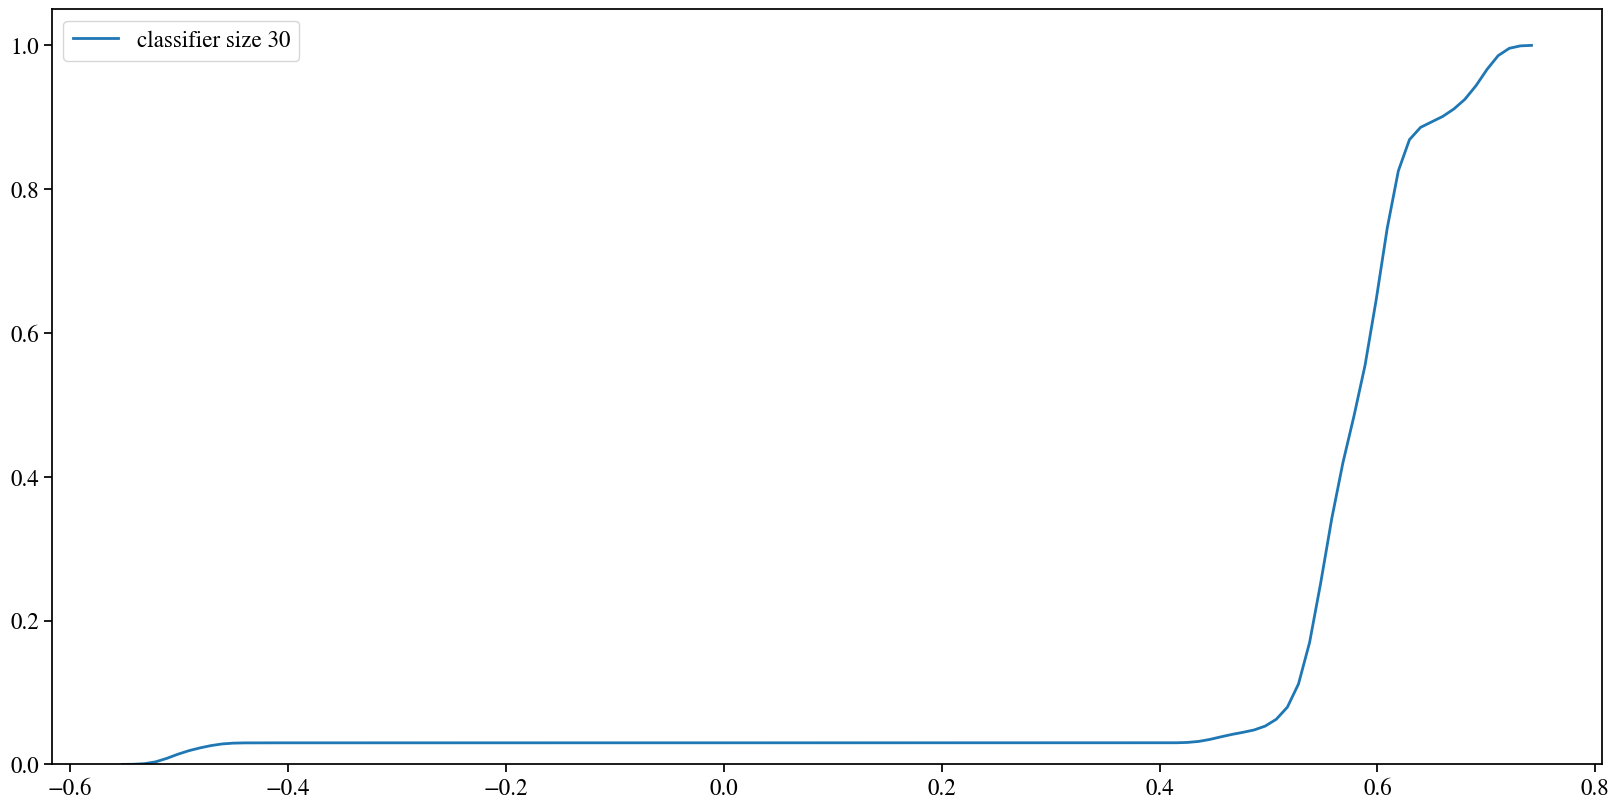

In [135]:
rcParams['figure.figsize'] = 20, 10
margin_30 = training_set_x_df[['sign_of_margin']].copy()
sns.kdeplot(margin_30.sign_of_margin, cumulative=True, label='classifier size 30')

**Exercise:** Repeat the AdaBoost training, but this time create a classifier using 50 weak classifiers. Repeat the process of calculating the margins and then plot the CDF below for both the AdaBoost classifier with ensemble size 30 and 50. Interpret the graph.


c:\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


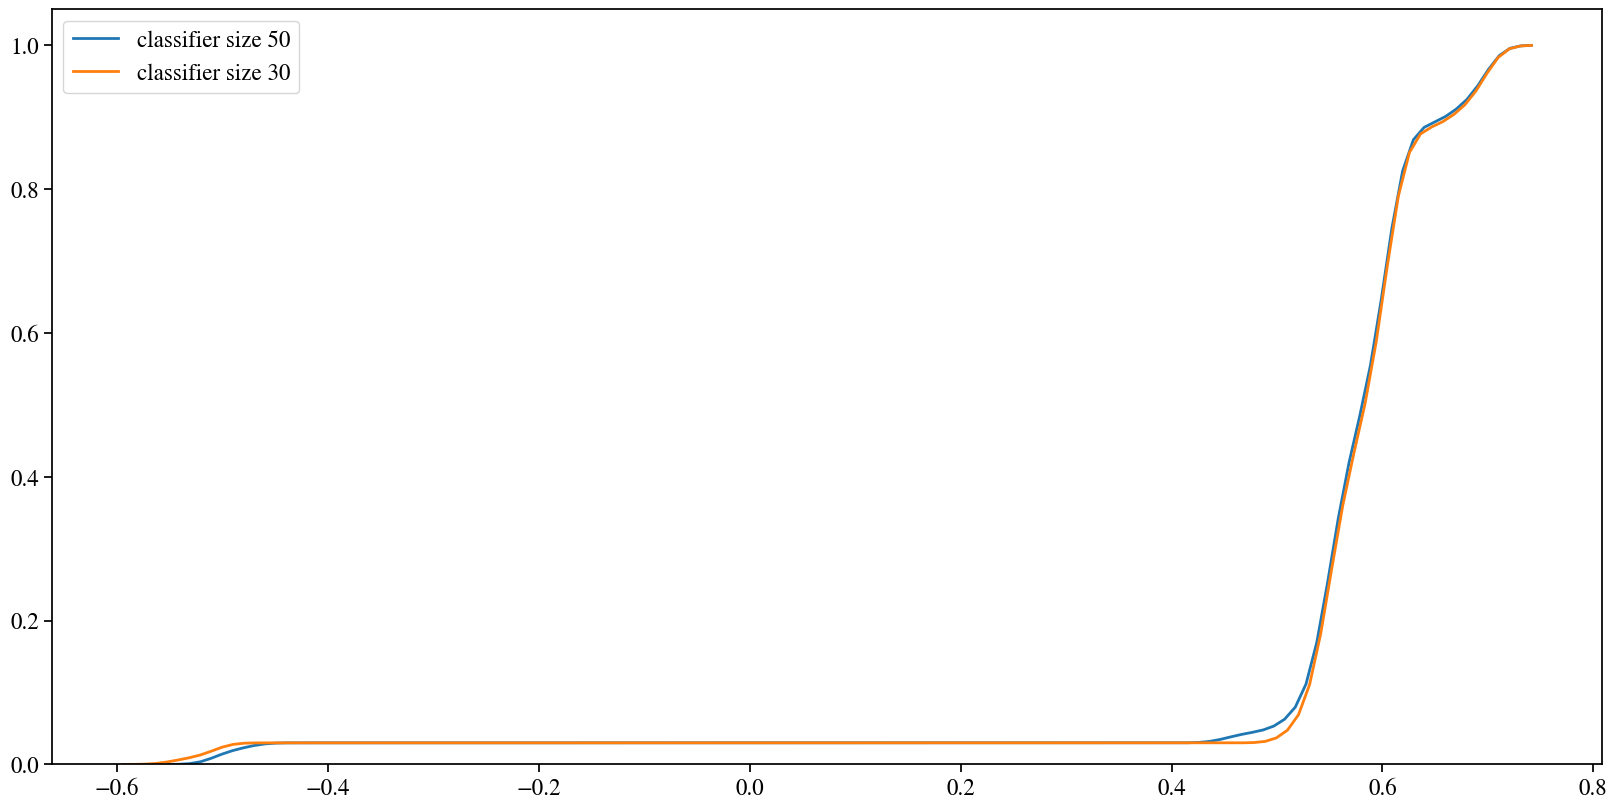

In [136]:
rcParams['figure.figsize'] = 20, 10
margin_50 = training_set_x_df[['sign_of_margin']].copy()
sns.kdeplot(margin_50.sign_of_margin, cumulative=True, label='classifier size 50')
booster.calculate_margins(x,label)
booster.plotMargins()

**Exercise:** Repeat the AdaBoost training, and now create classifier 5, 10 and 100 weak classifiers and plot them all together on the same graph. Interpret the graph.


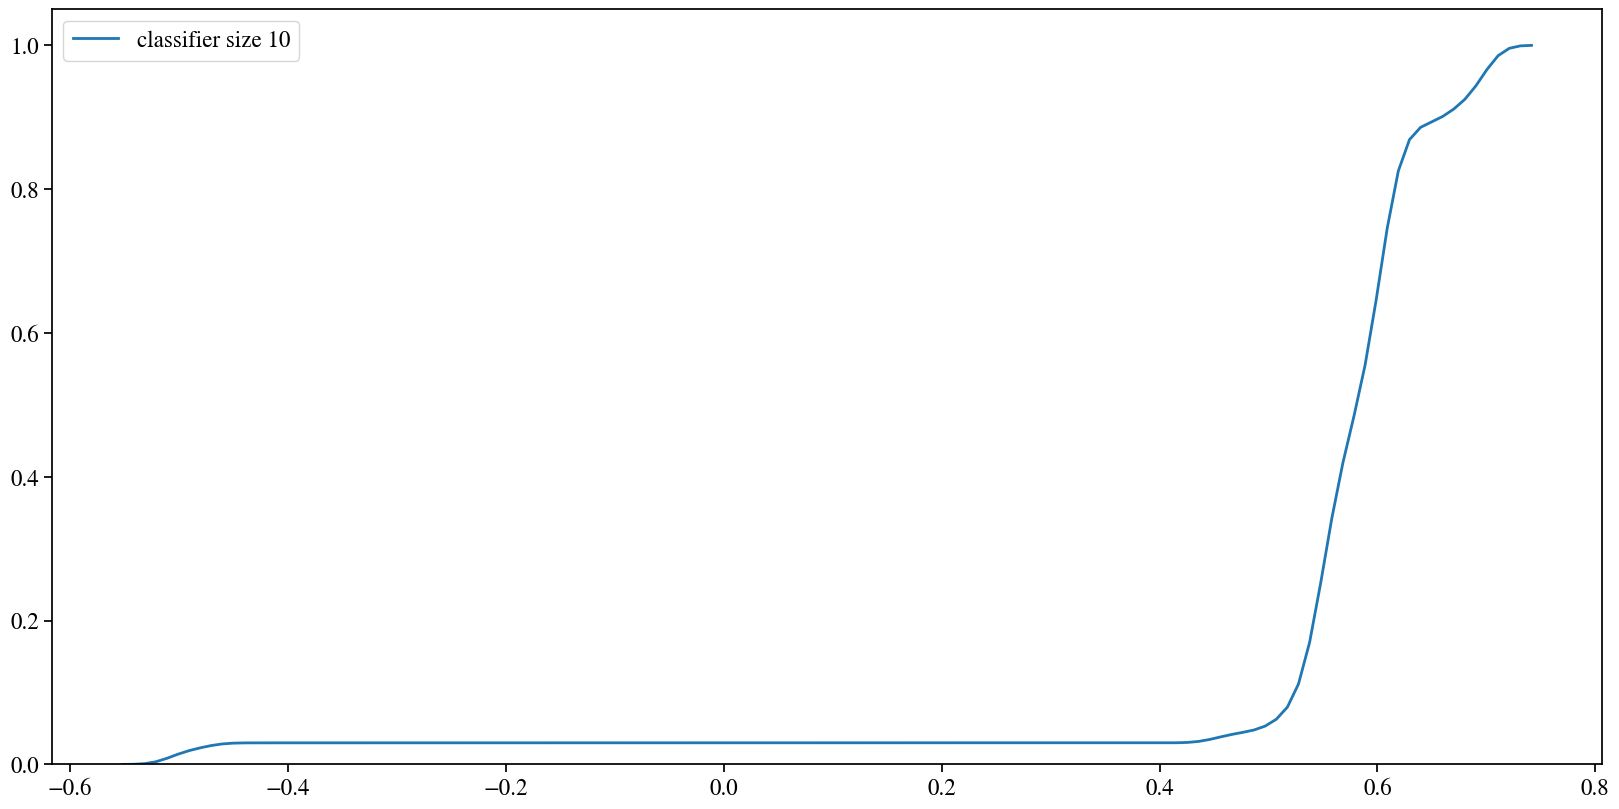

In [137]:
rcParams['figure.figsize'] = 20, 10
margin_10 = training_set_x_df[['sign_of_margin']].copy()
sns.kdeplot(margin_10.sign_of_margin, cumulative=True, label='classifier size 10')

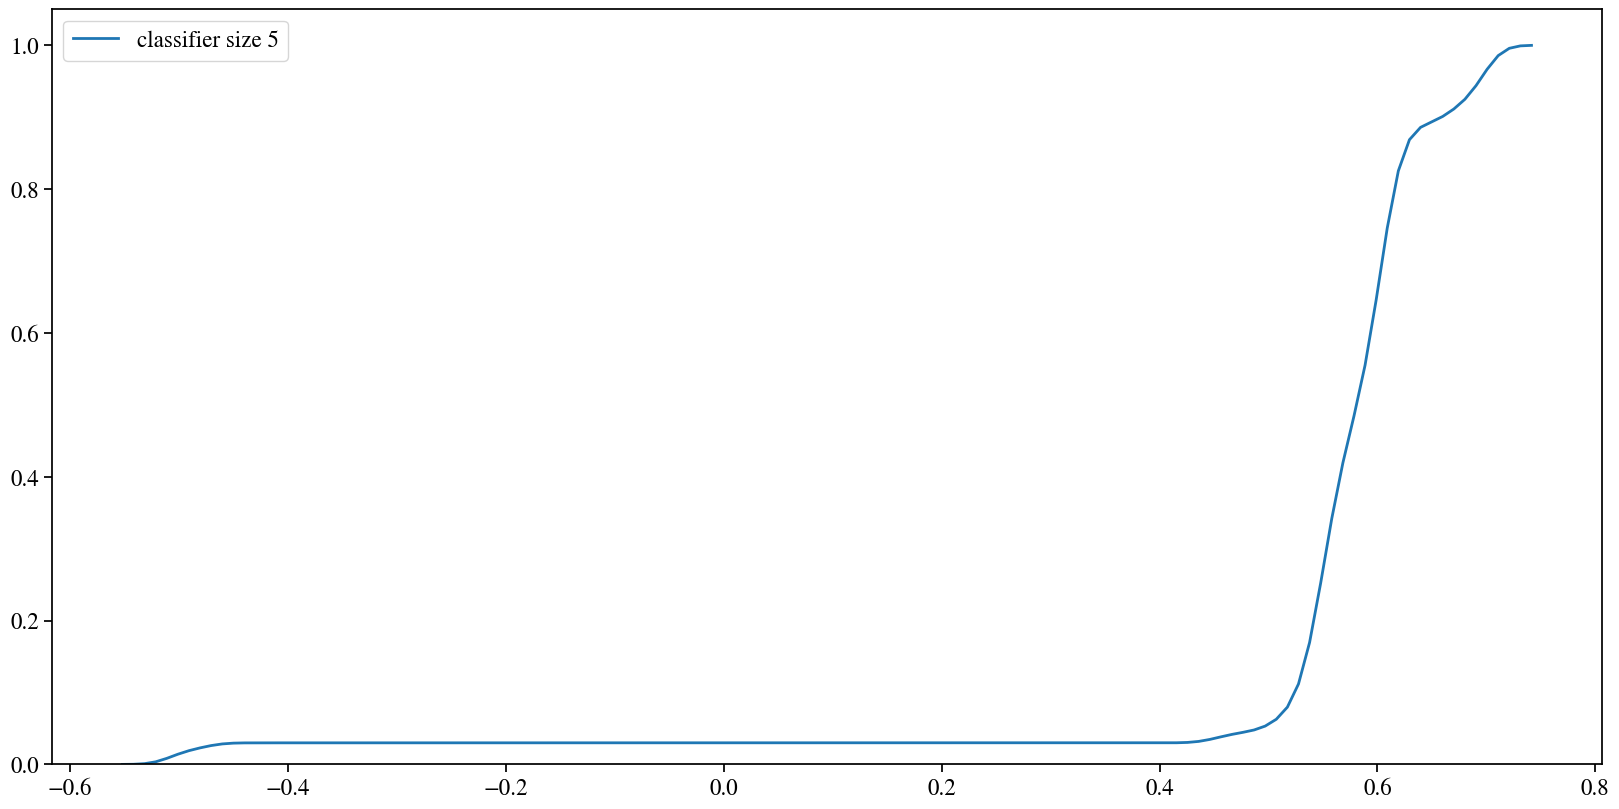

In [138]:
rcParams['figure.figsize'] = 20, 10
margin_5 = training_set_x_df[['sign_of_margin']].copy()
sns.kdeplot(margin_5.sign_of_margin, cumulative=True, label='classifier size 5')

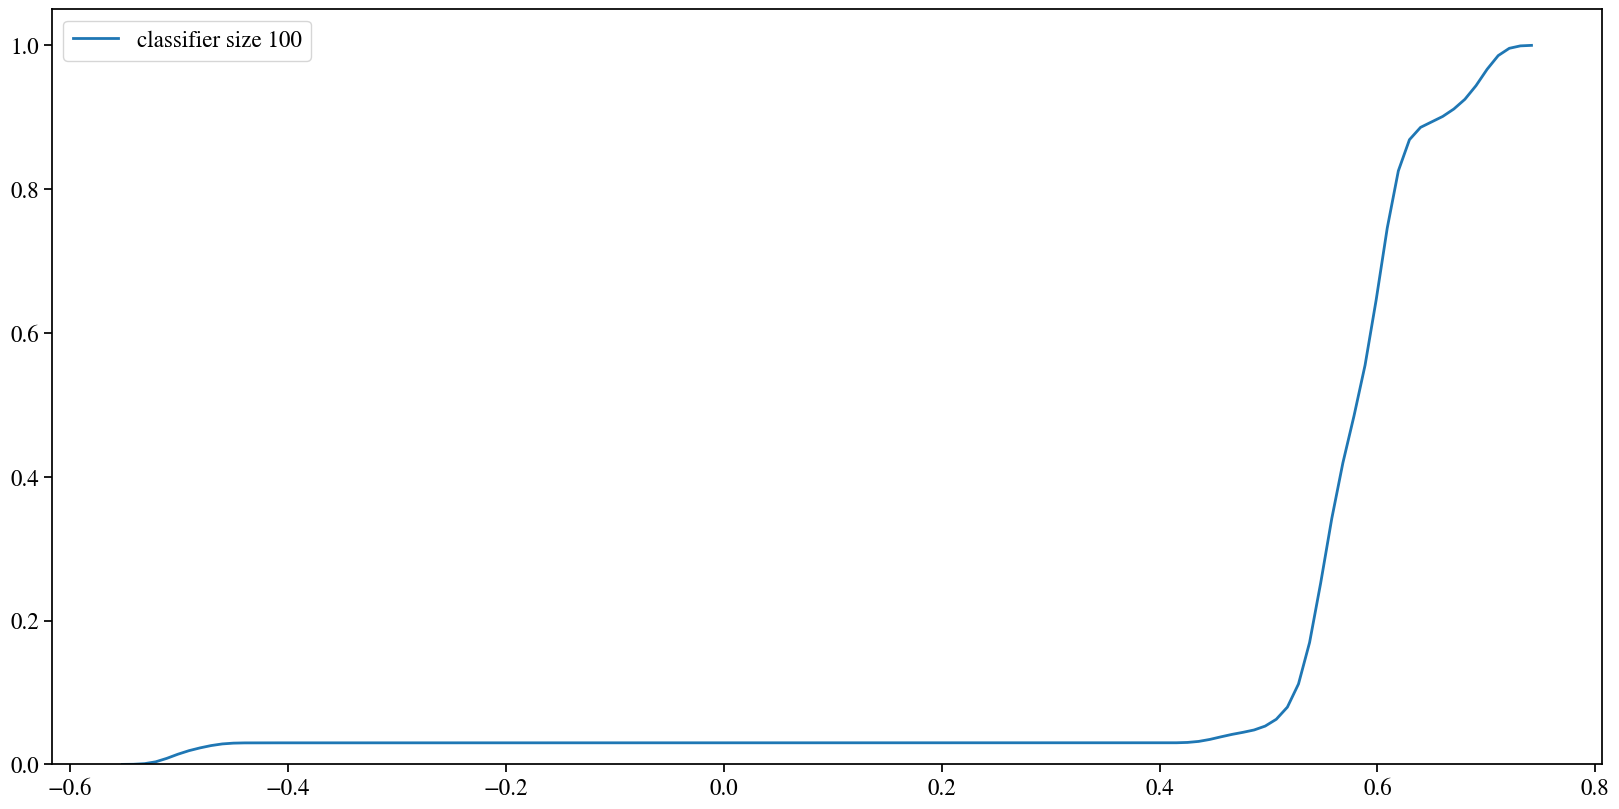

In [139]:
rcParams['figure.figsize'] = 20, 10
margin_100 = training_set_x_df[['sign_of_margin']].copy()
sns.kdeplot(margin_100.sign_of_margin, cumulative=True, label='classifier size 100')

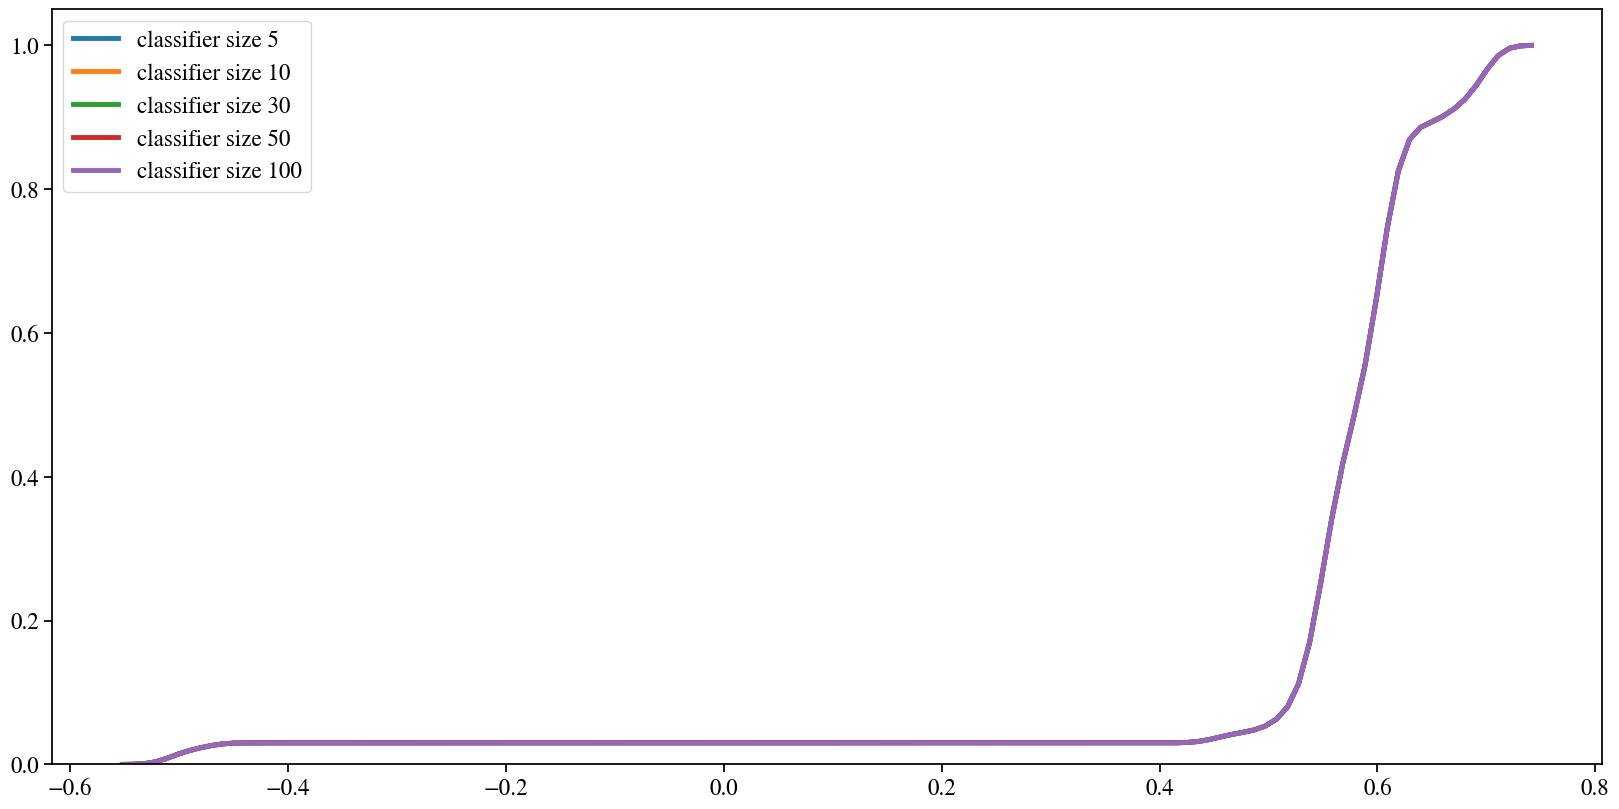

In [140]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})
rcParams['figure.figsize'] = 20, 10
sns.kdeplot(margin_5.sign_of_margin, cumulative=True, label='classifier size 5')
sns.kdeplot(margin_10.sign_of_margin, cumulative=True, label='classifier size 10')
sns.kdeplot(margin_30.sign_of_margin, cumulative=True, label='classifier size 30')
sns.kdeplot(margin_50.sign_of_margin, cumulative=True, label='classifier size 50')
sns.kdeplot(margin_100.sign_of_margin, cumulative=True, label='classifier size 100')

**Exercise:** Import the Wine dataset which has 3 class labels. Train class 1 against classes 2 and 3 using AdaBoost, by making the last two classes a single class. Once you have done this, repeat the process 2 more times for other combinations of class labels so that you complete one-vs-all training.

Given what we have learned about margins and confidence levels, how would you combine the classifications from the 3 classifiers in order to make a final decision on a sample's classification? 

# Ensembles of machine learning methods

Keep in mind that finding a best performing machine learning algorithms for a particular dataset can be very time consuming due to much of this process coming down to trial and error.

Once a machine learning algorithm has been selected and fine-tuned, remembers that the "No Free Lunch Theorem" states that there is no 'best' machine learning algorithm that will outperform all others across all possible domains and datasets. Therefore, in order to mitigate this to some degree, instead of striving to find a 'best algorithm', with best tunable parameters across all problems, we can strive to find a set of algorithms whose collective accuracy is not optimal, but is likely to outperform any one algorithm across all possible datasets and domains. This is the idea of behind ensembles of machine learning algorithms and is sometimes referred to as Voting Ensembles or the more sophisticated Stacking algorithm.

Voting Ensembles train a classifier on several different machine learning algorithms, and during prediction the predictions from all classifiers are combined in some fashion. The simplest form is majority voting, or weighted voting.

Stacking is a meta-learning algorithm that takes the predictions of each classifier and trains another classifier on this input in order to come up with the final classification. Any machine learning algorithm can be co-opted as a meta-learning algorithm for Stacking.